# Prédiction des prix du riz, du maïs, de l'arachide et du mil au Sénégal grace au méthodes des Machine Learning

Ce notenook présente les différentes étapes dans le procéssus de modèlisation du prix des principales spéculations agricoles au Sénégal. Le projet a pour objectif de développer un modèle prédictif des prix des principales spéculations agricoles — riz, maïs, arachide et mil — cultivées sur le territoire sénégalais. Selon la disponibilité et le niveau de désagrégation des données (région, département, point de collecte, etc.), des prédictions localisées seront réalisées. Les prix au consommateur constituent les variables d’intérêt, représentant les prix effectifs observés sur les marchés.

Il sera question en premier lieu de tester les modèles statistiques simples (AR, MA, ARIMA, SARIMA, etc.) au niveau national puis en second lieu de développer des méthodes ML et voire les performances

## Traitement des données

In [387]:
# pip install pathlib
# pip install odfpy

In [388]:
#ip install scikit-learn

In [389]:
#pandas numpy matplotlib pathlib loguru sys pandas_ods_reader missingno ipywidgets 

In [390]:
#pip install xgboost 

In [391]:
#Importation des librairies necessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from loguru import logger
import sys
from pandas_ods_reader import read_ods
import missingno as msno
import ipywidgets as widgets
from ipywidgets import interact, Dropdown, IntSlider
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBRegressor

#### Initialisation du répertoire de travail

In [392]:
# Répertoire du dossier contenant notre projet
HOME_DIR = Path.cwd().parent

# Définition du dossier ou se trouve la base de données
DATA_DIR = Path(HOME_DIR, "data")

#Crée le dossier si elle n'existe pas
DATA_DIR.mkdir(parents=True, exist_ok=True)

# Générer le dossier pour les éléments de rapport
REPORT_DIR = Path(HOME_DIR, "report")

#Crée le dossier lorsqu'elle n'existe pas
REPORT_DIR.mkdir(parents=True, exist_ok=True)

logger.info(f"\nWork directory: {HOME_DIR} \nData directory: {DATA_DIR}")
sys.path.append("../")

2025-10-28 00:53:04.726 | INFO     | __main__:<module>:16 - 
Work directory: C:\Users\ombaye\Documents\Formation en Data Science\Module 2 Machine Learning\projet_ml_prediction_des_prix_agricoles 
Data directory: C:\Users\ombaye\Documents\Formation en Data Science\Module 2 Machine Learning\projet_ml_prediction_des_prix_agricoles\data


#### Importation de la base de données

In [393]:
# Importation de la base de données
# Base contenant le Riz, le mil et maïs
data_rmm = read_ods(Path(DATA_DIR, "bases_donneees_mil_mais_riz_arachide.ods"))
data_rmm.head()

,REGION,DEPARTEMENT,MARCHE,DATE,DATE.1,mois_num,jour,annee,mois_carac,MIL_QUANT,...,MAÏS_IMP,MAÏS_IMP 1/2G,RIZ_IMP_QT ORD.,RIZ_IMP_BR ORD.,RIZ_IMP_BR ORD. 1/2 G.,RIZ_IMP_QT ORD. PARF.,RIZ_IMP_BR PARF.,RIZ_IMP_BR PARF. 1/2 G.,RIZ_LOC_QT,RIZ_LOC DECORT.
0,FK,FOUNDIOUGNE,PASSY,1988-01-02T00:00:00,1988-01-02T00:00:00,1.0,2.0,1988.0,janvier,NaN,...,NaN,NaN,None,None,NaN,NaN,None,NaN,NaN,NaN
1,TC,KOUMPENTOUM,KOUTHIABA,1988-01-02T00:00:00,1988-01-02T00:00:00,1.0,2.0,1988.0,janvier,NaN,...,NaN,NaN,None,None,NaN,NaN,None,NaN,NaN,NaN
2,DL,DIOURBEL,NDINDY,1988-01-03T00:00:00,1988-01-03T00:00:00,1.0,3.0,1988.0,janvier,25.0,...,NaN,NaN,None,None,NaN,NaN,None,NaN,NaN,NaN
3,DL,BAMBEY,BAMBEY,1988-01-04T00:00:00,1988-01-04T00:00:00,1.0,4.0,1988.0,janvier,4.0,...,NaN,NaN,None,None,NaN,NaN,None,NaN,NaN,NaN
4,TH,TIVAOUANE,THILMAKHA,1988-01-04T00:00:00,1988-01-04T00:00:00,1.0,4.0,1988.0,janvier,5.0,...,NaN,NaN,None,None,NaN,NaN,None,NaN,NaN,NaN


In [394]:
#Information sur le type des variables
data_rmm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55146 entries, 0 to 55145
Data columns (total 36 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   REGION                   55146 non-null  object 
 1   DEPARTEMENT              55146 non-null  object 
 2   MARCHE                   55146 non-null  object 
 3   DATE                     55146 non-null  object 
 4   DATE.1                   55146 non-null  object 
 5   mois_num                 55146 non-null  float64
 6   jour                     55146 non-null  float64
 7   annee                    55146 non-null  float64
 8   mois_carac               55146 non-null  object 
 9   MIL_QUANT                53041 non-null  float64
 10  MIL_PROD                 17286 non-null  object 
 11  MIL_DETAIL               51678 non-null  float64
 12  MIL 1/2 G.               8310 non-null   float64
 13  SANIO_QT                 846 non-null    float64
 14  MIL SANIO             

In [395]:
#Importation de la base de données contenant les informations sur l'arachide
data_ara = read_ods(Path(DATA_DIR, "bases_donneees_mil_mais_riz_arachide.ods"), sheet="arachide")
data_ara.head()

,REGION,DEPARTEMENT,MARCHE,DATE,DATE.1,mois_num,annee,mois_carac,NIEBE_QUANT,NIEBE_PROD,NIEBE_DET,NIEBE 1/2 G.,COQUE_QTE,COQUE_PROD,COQUE_DET,DECORT_QTE,DECORT_PROD,DECORT_DET
0,KL,NIORO,NDRAME ESCALE,1990-01-01T00:00:00,1.0,1.0,1990.0,janvier,0.07,NaN,125.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,LG,LOUGA,GOUILLE MBEUTH,1990-01-01T00:00:00,1.0,1.0,1990.0,janvier,0.50,55.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,TH,TIVAOUANE,THILMAKHA,1990-01-01T00:00:00,1.0,1.0,1990.0,janvier,13.00,NaN,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,DL,DIOURBEL,DIOURBEL,1990-01-02T00:00:00,1.0,2.0,1990.0,janvier,2.00,NaN,90.0,NaN,0.5,NaN,90.0,2.0,NaN,150.0
4,SL,DAGANA,DAGANA,1990-01-02T00:00:00,1.0,2.0,1990.0,janvier,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [396]:
#Information sur le type des variables
data_ara.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48180 entries, 0 to 48179
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   REGION        48180 non-null  object 
 1   DEPARTEMENT   48180 non-null  object 
 2   MARCHE        48180 non-null  object 
 3   DATE          48180 non-null  object 
 4   DATE.1        48180 non-null  float64
 5   mois_num      48180 non-null  float64
 6   annee         48180 non-null  float64
 7   mois_carac    48180 non-null  object 
 8   NIEBE_QUANT   40361 non-null  float64
 9   NIEBE_PROD    7037 non-null   float64
 10  NIEBE_DET     39960 non-null  float64
 11  NIEBE 1/2 G.  9817 non-null   float64
 12  COQUE_QTE     24096 non-null  float64
 13  COQUE_PROD    9487 non-null   float64
 14  COQUE_DET     23065 non-null  float64
 15  DECORT_QTE    18747 non-null  float64
 16  DECORT_PROD   12779 non-null  float64
 17  DECORT_DET    43669 non-null  float64
dtypes: float64(13), object(5)


#### Description sommaire des données

In [397]:
#Statistiques descritpives sommaires des différentes variables
data_rmm.describe()

,mois_num,jour,annee,MIL_QUANT,MIL_DETAIL,MIL 1/2 G.,SANIO_QT,MIL SANIO,SORGHO_LOC_QT,SORGHO_PROD,...,MAÏS_DETAIL,MAÏS 1/2 G.,MAÏS_IMP_QT,MAÏS_IMP,MAÏS_IMP 1/2G,RIZ_IMP_BR ORD. 1/2 G.,RIZ_IMP_QT ORD. PARF.,RIZ_IMP_BR PARF. 1/2 G.,RIZ_LOC_QT,RIZ_LOC DECORT.
count,55146.000000,55146.000000,55146.000000,53041.000000,51678.000000,8310.000000,846.000000,2913.000000,31320.000000,9956.000000,...,36967.000000,6334.000000,19662.000000,19282.000000,7294.000000,11494.000000,7813.000000,6126.000000,15612.000000,14375.000000
mean,6.496264,15.830232,2004.470098,18.651193,173.040452,245.214320,8.727388,126.753630,4.993110,144.061872,...,171.825764,218.509157,21.273872,199.652189,230.839320,281.542370,60.003267,404.283056,33.478947,244.397983
std,3.423476,8.617703,10.399353,31.339207,80.514738,77.549389,17.691934,130.051065,12.510703,79.569878,...,64.973857,54.732098,50.362192,65.144083,56.633057,31.626294,175.035131,52.527474,116.825983,78.553580
min,1.000000,1.000000,1988.000000,0.002000,38.000000,25.000000,0.050000,0.010000,0.000000,15.000000,...,35.000000,110.000000,0.017000,50.000000,140.000000,1.000000,0.046000,230.000000,0.005000,60.000000
25%,4.000000,8.000000,1995.000000,3.000000,115.000000,200.000000,0.600000,2.000000,0.500000,85.000000,...,125.000000,180.000000,2.500000,150.000000,190.000000,260.000000,3.000000,375.000000,3.000000,185.000000
50%,7.000000,16.000000,2004.000000,8.500000,160.000000,225.000000,2.000000,140.000000,1.500000,130.000000,...,170.000000,200.000000,10.000000,190.000000,220.000000,275.000000,15.000000,400.000000,11.000000,250.000000
75%,9.000000,23.000000,2013.000000,20.000000,215.000000,270.000000,10.000000,175.000000,5.000000,180.000000,...,200.000000,235.000000,22.000000,225.000000,250.000000,300.000000,50.000000,450.000000,30.000000,300.000000
max,12.000000,31.000000,2023.000000,1250.000000,700.000000,600.000000,200.000000,600.000000,600.000000,600.000000,...,600.000000,500.000000,1750.000000,700.000000,500.000000,450.000000,2200.000000,600.000000,2250.000000,650.000000


In [398]:
#Statistiques descritpives sommaires des différentes variables
data_ara.describe()

,DATE.1,mois_num,annee,NIEBE_QUANT,NIEBE_PROD,NIEBE_DET,NIEBE 1/2 G.,COQUE_QTE,COQUE_PROD,COQUE_DET,DECORT_QTE,DECORT_PROD,DECORT_DET
count,48180.000000,48180.000000,48180.000000,40361.000000,7037.000000,39960.000000,9817.00000,24096.000000,9487.000000,23065.000000,18747.000000,12779.000000,43669.000000
mean,6.467082,15.820195,2006.231382,6.444156,349.385463,402.570239,548.09510,17.638739,208.356066,230.168697,18.397553,383.403396,448.975864
std,3.422311,8.632307,9.589435,36.682621,211.869038,258.395180,258.56875,110.701427,106.126139,124.912354,286.126354,180.484249,201.097578
min,1.000000,1.000000,1990.000000,0.002000,25.000000,25.000000,0.20000,0.005000,45.000000,22.000000,0.003000,55.000000,60.000000
25%,3.000000,8.000000,1998.000000,0.400000,200.000000,200.000000,350.00000,1.000000,140.000000,150.000000,1.000000,250.000000,300.000000
50%,6.000000,16.000000,2007.000000,1.000000,325.000000,350.000000,500.00000,3.000000,180.000000,200.000000,3.000000,350.000000,400.000000
75%,9.000000,23.000000,2014.000000,4.500000,450.000000,500.000000,700.00000,10.000000,250.000000,260.000000,10.000000,450.000000,550.000000
max,12.000000,31.000000,2023.000000,2000.000000,1450.000000,2000.000000,2758.00000,9000.000000,750.000000,900.000000,25000.000000,1100.000000,1500.000000


#### Visualisation des données manquantes

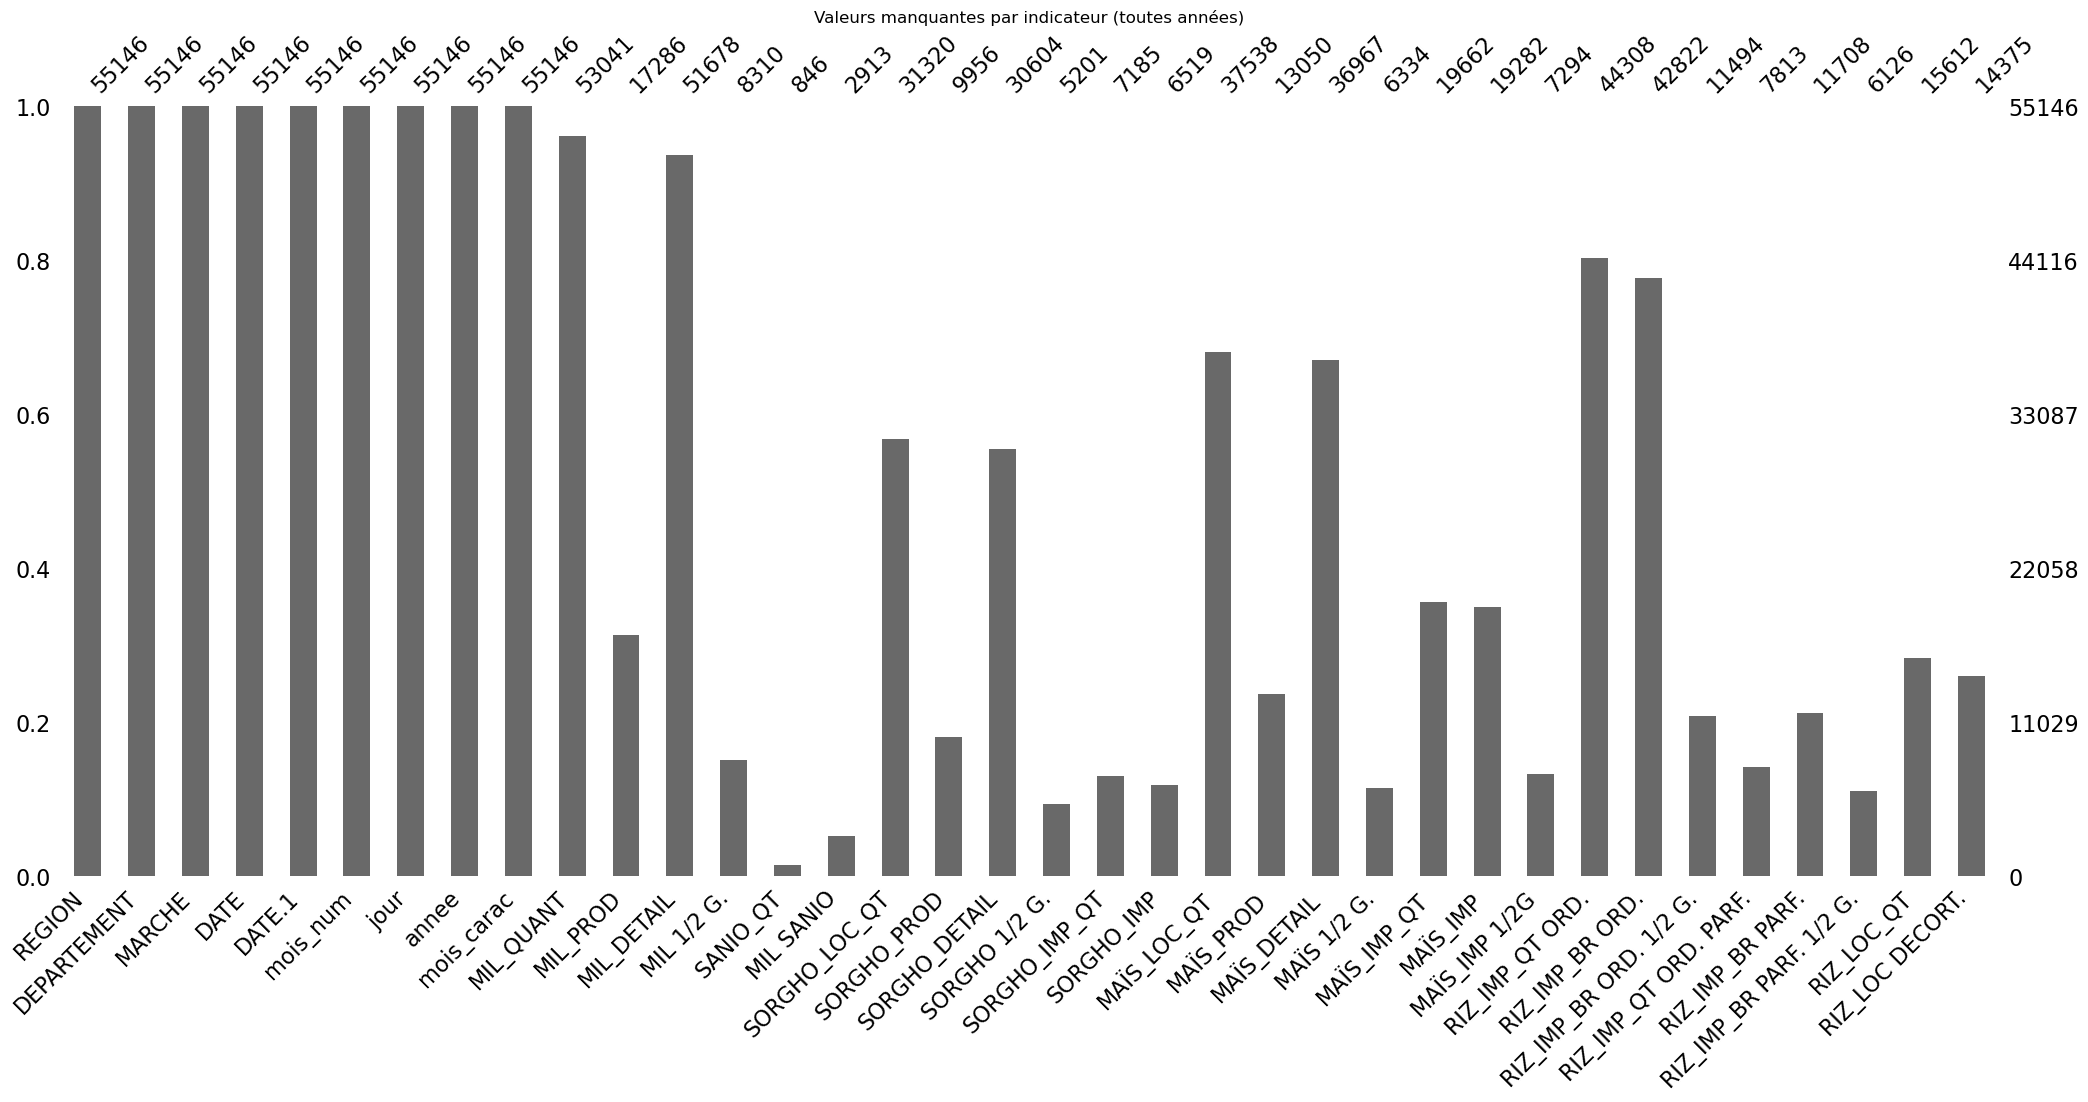

In [399]:
# Riz, le mil et maïs
plt.figure(figsize=(10,6))
msno.bar(data_rmm)
plt.title("Valeurs manquantes par indicateur (toutes années)")
plt.show()

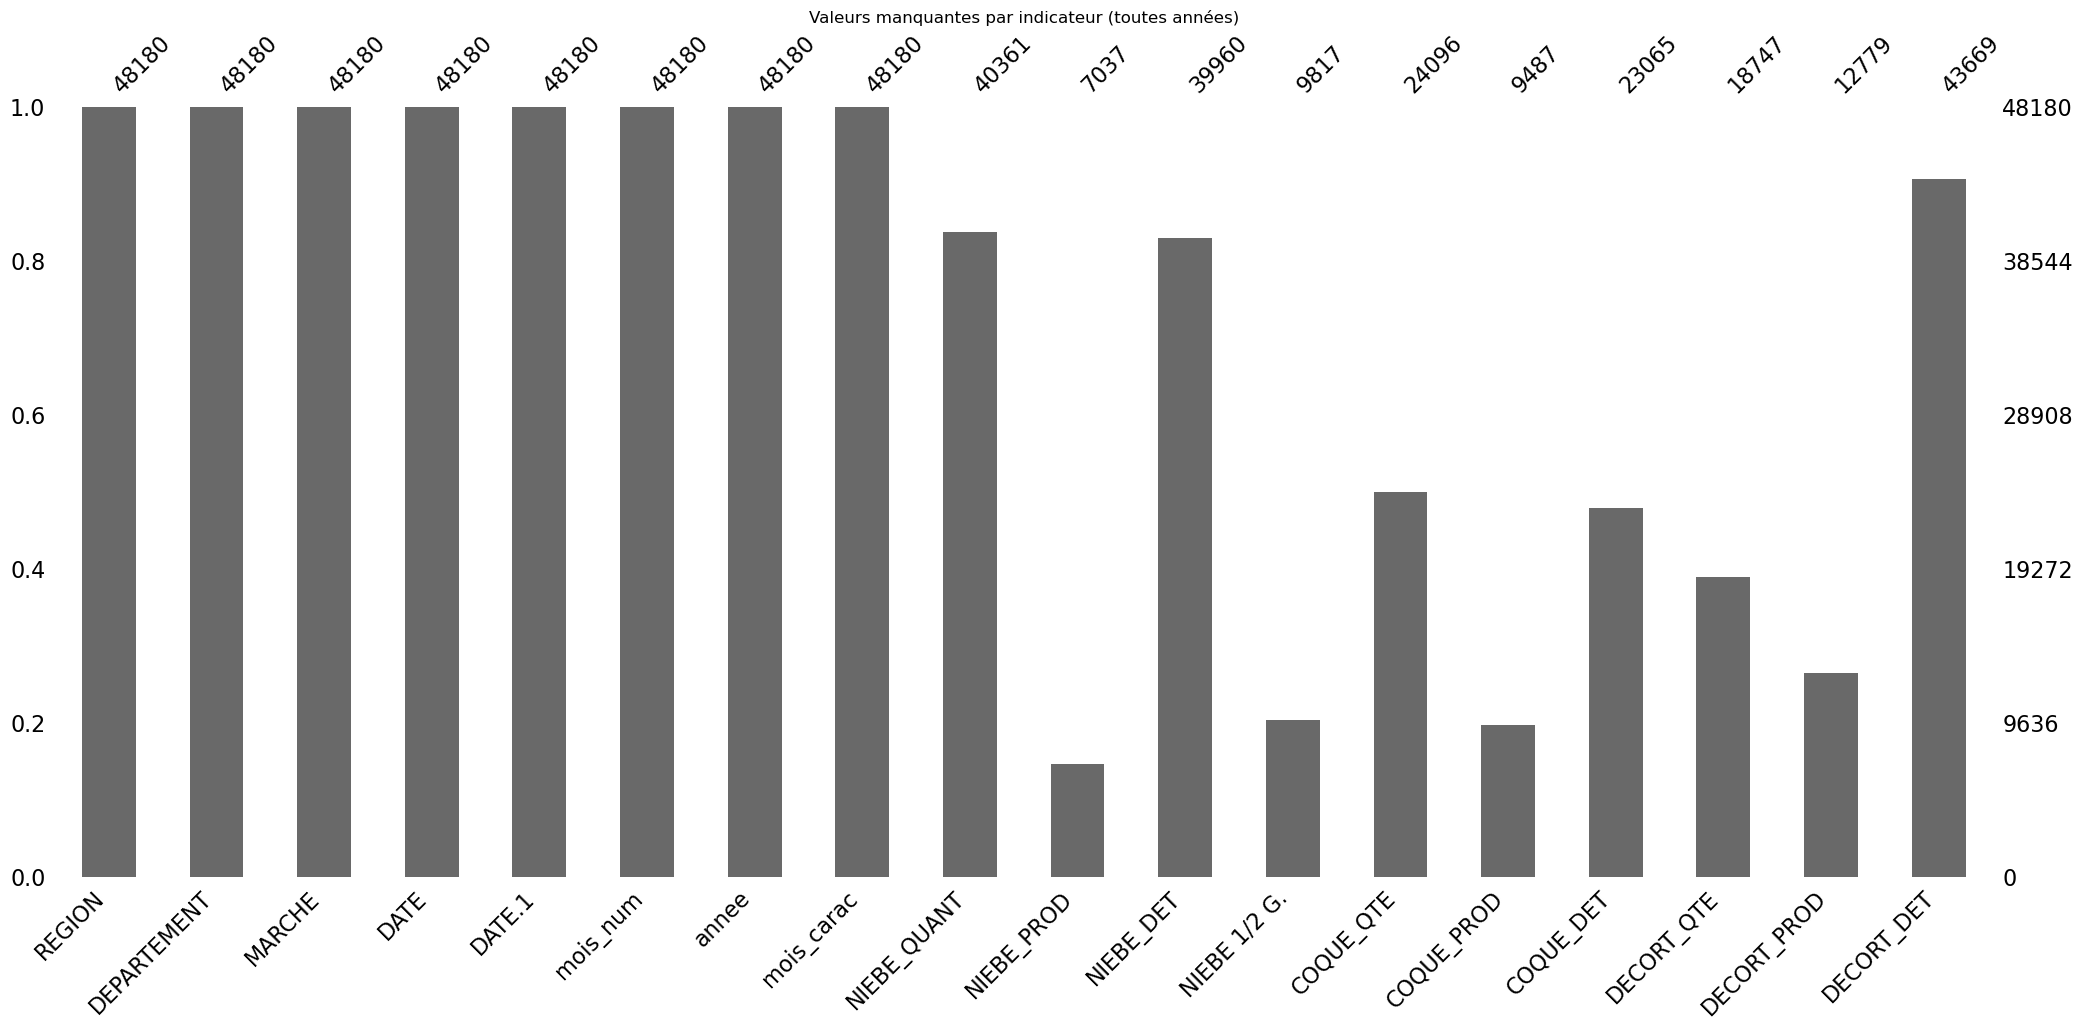

In [400]:
# Arachide
plt.figure(figsize=(10,6))
msno.bar(data_ara)
plt.title("Valeurs manquantes par indicateur (toutes années)")
plt.show()

#### Restriction des bases 

On restreint nos observations sur la période allant de 2000 à 2023

Riz, Maïs, Mil

In [401]:
#Restriction sur les années 2000 à 2021
data_rmm = data_rmm[(data_rmm["annee"]>=2000) & (data_rmm["annee"]<=2021)]

In [402]:
#Suppression
#data_rmm = data_rmm.drop_duplicates()

Arachide

In [403]:
#Restriction sur les années 2000 à 2021
data_ara = data_ara[(data_ara["annee"]>=2000) & (data_ara["annee"]<=2021)]

In [404]:
#Identification
#data_ara.duplicated().sum()

In [405]:
#Suppression
#data_ara = data_ara.drop_duplicates()

#### Calcul des moyennes mensuelles pour chaque années

###### Riz, mil, maïs

In [406]:
#Harmonisation du nom des colonnes pour enlever tout ce qui peut entraver les analyses
data_rmm.columns = (
    data_rmm.columns
    .str.strip()              # supprime les espaces début/fin
    .str.replace(" ", "_")    # remplace espaces par _
    .str.replace(".","")
    .str.replace("/","sur")
    #.str.replace("ï","i")
    .str.lower()              # met tout en minuscules
)
data_rmm.head()

,region,departement,marche,date,date1,mois_num,jour,annee,mois_carac,mil_quant,...,maïs_imp,maïs_imp_1sur2g,riz_imp_qt_ord,riz_imp_br_ord,riz_imp_br_ord_1sur2_g,riz_imp_qt_ord_parf,riz_imp_br_parf,riz_imp_br_parf_1sur2_g,riz_loc_qt,riz_loc_decort
20607,FK,GOSSAS,GOSSAS,2000-01-01T00:00:00,2000-01-01T00:00:00,1.0,1.0,2000.0,janvier,2.5,...,NaN,NaN,3.0,210.0,NaN,NaN,None,NaN,NaN,NaN
20608,DL,DIOURBEL,NDINDY,2000-01-02T00:00:00,2000-01-02T00:00:00,1.0,2.0,2000.0,janvier,5.0,...,NaN,NaN,10.0,210.0,NaN,NaN,None,NaN,5.0,180.0
20609,FK,FATICK,FATICK,2000-01-02T00:00:00,2000-01-02T00:00:00,1.0,2.0,2000.0,janvier,3.0,...,NaN,NaN,9.0,210.0,NaN,NaN,None,NaN,NaN,NaN
20610,DL,BAMBEY,BAMBEY,2000-01-03T00:00:00,2000-01-03T00:00:00,1.0,3.0,2000.0,janvier,30.0,...,NaN,NaN,40.0,220.0,NaN,NaN,None,NaN,NaN,NaN
20611,FK,GOSSAS,MBAR,2000-01-03T00:00:00,2000-01-03T00:00:00,1.0,3.0,2000.0,janvier,1.8,...,NaN,NaN,2.5,210.0,NaN,NaN,None,NaN,NaN,NaN


In [407]:
data_rmm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32038 entries, 20607 to 52644
Data columns (total 36 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   region                   32038 non-null  object 
 1   departement              32038 non-null  object 
 2   marche                   32038 non-null  object 
 3   date                     32038 non-null  object 
 4   date1                    32038 non-null  object 
 5   mois_num                 32038 non-null  float64
 6   jour                     32038 non-null  float64
 7   annee                    32038 non-null  float64
 8   mois_carac               32038 non-null  object 
 9   mil_quant                31397 non-null  float64
 10  mil_prod                 10076 non-null  object 
 11  mil_detail               31184 non-null  float64
 12  mil_1sur2_g              6738 non-null   float64
 13  sanio_qt                 618 non-null    float64
 14  mil_sanio              

In [408]:
# Cnvertion des colonnes objets en numériques
data_rmm["mil_prod"] = pd.to_numeric(data_rmm["mil_prod"], errors="coerce")
data_rmm["riz_imp_qt_ord"] = pd.to_numeric(data_rmm["riz_imp_qt_ord"], errors="coerce")
data_rmm["riz_imp_br_ord"] = pd.to_numeric(data_rmm["riz_imp_br_ord"], errors="coerce")
data_rmm["riz_imp_br_parf"] = pd.to_numeric(data_rmm["riz_imp_br_parf"], errors="coerce")

In [409]:
#On vérifie si le format de nos cellules a changé
data_rmm[["mil_prod", "riz_imp_qt_ord", "riz_imp_br_ord", "riz_imp_br_parf"]].info()

<class 'pandas.core.frame.DataFrame'>
Index: 32038 entries, 20607 to 52644
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mil_prod         10075 non-null  float64
 1   riz_imp_qt_ord   28608 non-null  float64
 2   riz_imp_br_ord   29652 non-null  float64
 3   riz_imp_br_parf  9092 non-null   float64
dtypes: float64(4)
memory usage: 1.2 MB


In [410]:
#Visualisation des colonnes de notre base de données
data_rmm.columns

Index(['region', 'departement', 'marche', 'date', 'date1', 'mois_num', 'jour',
       'annee', 'mois_carac', 'mil_quant', 'mil_prod', 'mil_detail',
       'mil_1sur2_g', 'sanio_qt', 'mil_sanio', 'sorgho_loc_qt', 'sorgho_prod',
       'sorgho_detail', 'sorgho_1sur2_g', 'sorgho_imp_qt', 'sorgho_imp',
       'maïs_loc_qt', 'maïs_prod', 'maïs_detail', 'maïs_1sur2_g',
       'maïs_imp_qt', 'maïs_imp', 'maïs_imp_1sur2g', 'riz_imp_qt_ord',
       'riz_imp_br_ord', 'riz_imp_br_ord_1sur2_g', 'riz_imp_qt_ord_parf',
       'riz_imp_br_parf', 'riz_imp_br_parf_1sur2_g', 'riz_loc_qt',
       'riz_loc_decort'],
      dtype='object')

In [411]:
# Suppression des espace dans la variable région
data_rmm['region']=data_rmm['region'].str.replace(' ','')
data_rmm['region']=data_rmm['region'].str.replace('kl','KL')

In [412]:
data_rmm['region'].drop_duplicates().tolist()

['FK',
 'DL',
 'KL',
 'LG',
 'TH',
 'DK',
 'KD',
 'KF',
 'SL',
 'ZG',
 'TC',
 'MT',
 'SD',
 'KG']

In [413]:
data_rmm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32038 entries, 20607 to 52644
Data columns (total 36 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   region                   32038 non-null  object 
 1   departement              32038 non-null  object 
 2   marche                   32038 non-null  object 
 3   date                     32038 non-null  object 
 4   date1                    32038 non-null  object 
 5   mois_num                 32038 non-null  float64
 6   jour                     32038 non-null  float64
 7   annee                    32038 non-null  float64
 8   mois_carac               32038 non-null  object 
 9   mil_quant                31397 non-null  float64
 10  mil_prod                 10075 non-null  float64
 11  mil_detail               31184 non-null  float64
 12  mil_1sur2_g              6738 non-null   float64
 13  sanio_qt                 618 non-null    float64
 14  mil_sanio              

In [414]:
# Sélection des colonnes d'intérêt
cols_to_keep = [
    'region', 'annee', 'mois_num', 'mois_carac', 'mil_quant', 'mil_prod', 'mil_detail',
    'mil_1sur2_g', 'sanio_qt', 'mil_sanio', 'sorgho_loc_qt', 'sorgho_prod',
    'sorgho_detail', 'sorgho_1sur2_g', 'sorgho_imp_qt', 'sorgho_imp',
    'maïs_loc_qt', 'maïs_prod', 'maïs_detail', 'maïs_1sur2_g',
    'maïs_imp_qt', 'maïs_imp', 'maïs_imp_1sur2g', 'riz_imp_qt_ord',
    'riz_imp_br_ord', 'riz_imp_br_ord_1sur2_g', 'riz_imp_qt_ord_parf',
    'riz_imp_br_parf', 'riz_imp_br_parf_1sur2_g', 'riz_loc_qt',
    'riz_loc_decort'
]
# Calcul des moyennes mensuelles par année et par région
data_rmm_lim = (
    data_rmm[cols_to_keep]
    .groupby(['annee', 'mois_carac'])
    .mean(numeric_only=True)
    .reset_index()
)


In [415]:
data_rmm_lim

,annee,mois_carac,mois_num,mil_quant,mil_prod,mil_detail,mil_1sur2_g,sanio_qt,mil_sanio,sorgho_loc_qt,...,maïs_imp,maïs_imp_1sur2g,riz_imp_qt_ord,riz_imp_br_ord,riz_imp_br_ord_1sur2_g,riz_imp_qt_ord_parf,riz_imp_br_parf,riz_imp_br_parf_1sur2_g,riz_loc_qt,riz_loc_decort
0,2000.0,août,8.0,20.148106,99.250000,128.384921,NaN,0.620000,141.000000,3.232544,...,150.500000,NaN,76.000833,209.937500,NaN,NaN,NaN,NaN,21.676471,177.272727
1,2000.0,avril,4.0,20.339908,90.363636,115.594059,NaN,1.810714,136.071429,4.806044,...,145.000000,NaN,58.737000,215.880000,NaN,NaN,NaN,NaN,16.711842,185.921053
2,2000.0,décembre,12.0,20.732787,80.900000,103.839286,NaN,NaN,NaN,3.794444,...,155.000000,NaN,82.325000,200.769231,NaN,NaN,NaN,NaN,9.854545,179.772727
3,2000.0,février,2.0,18.248667,92.241379,113.104167,NaN,2.250000,118.750000,4.546721,...,144.615385,NaN,70.519697,214.545455,NaN,NaN,300.000000,NaN,12.283333,183.269231
4,2000.0,janvier,1.0,17.341481,84.186047,108.730769,NaN,5.050000,113.000000,5.210849,...,146.439394,NaN,75.187903,216.814516,NaN,NaN,NaN,NaN,12.198889,181.136364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,2021.0,mai,5.0,41.469149,221.634615,263.829787,247.946429,1.000000,250.000000,9.997159,...,238.909091,213.277778,134.037234,318.691489,294.393617,83.614667,439.266667,390.743243,50.044444,305.222222
258,2021.0,mars,3.0,34.603093,223.720930,260.360825,242.983871,5.000000,300.000000,6.998333,...,233.478261,209.456522,162.821649,316.917526,295.098901,72.034940,447.048193,397.960526,77.500000,306.162791
259,2021.0,novembre,11.0,15.718391,235.566038,270.689655,253.727273,NaN,NaN,7.921154,...,254.090909,229.363636,84.837647,330.764706,305.411765,40.774286,453.171429,408.214286,29.325581,315.813953
260,2021.0,octobre,10.0,16.364286,230.930233,272.738095,254.400000,NaN,NaN,6.162791,...,265.520833,238.877551,130.422078,336.558442,307.077922,73.795833,458.333333,413.125000,37.980769,314.807692


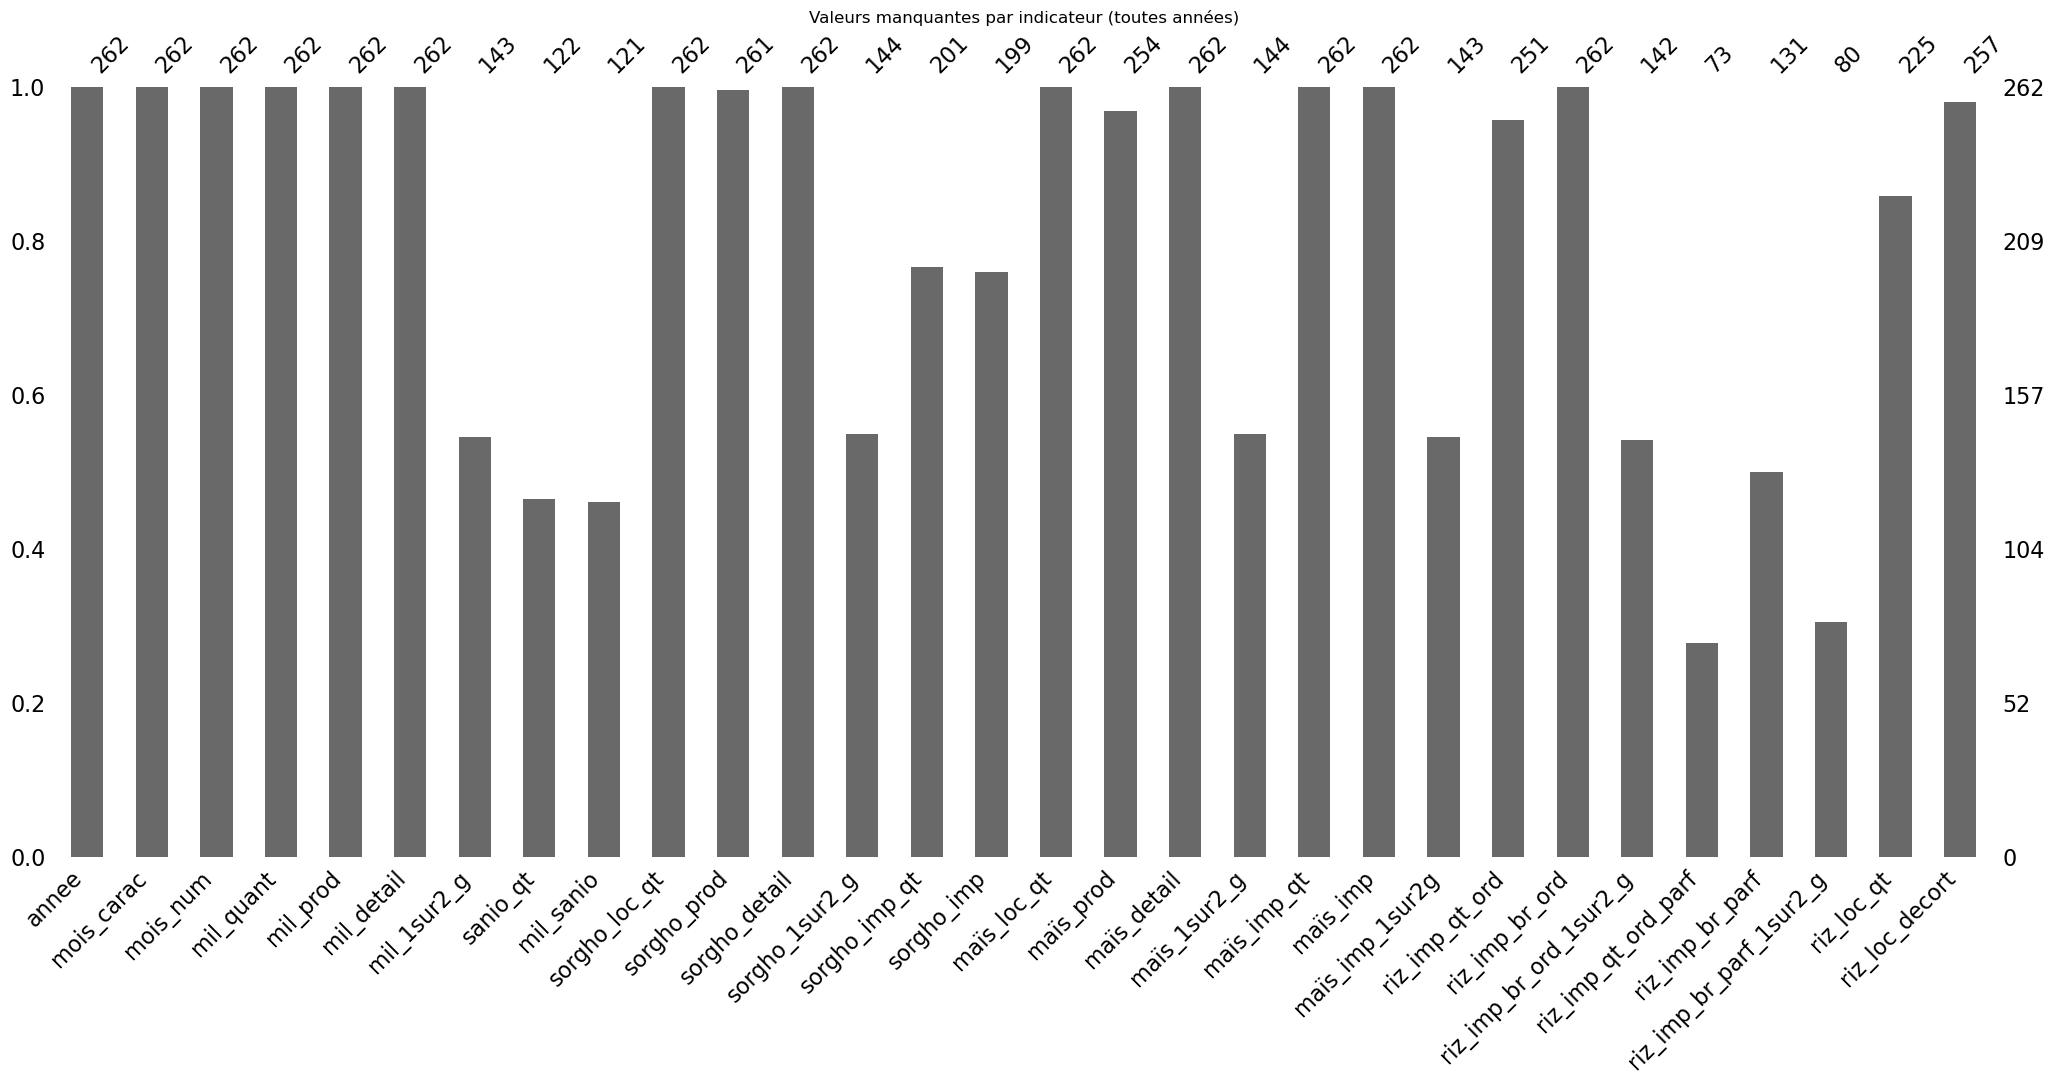

In [416]:
#Visualisation des données manquantes avec les moyennes mensuelles par région et année
# Riz, le mil et maïs
plt.figure(figsize=(10,6))
msno.bar(data_rmm_lim)
plt.title("Valeurs manquantes par indicateur (toutes années)")
plt.show()

In [417]:
#data_rmm_lim

###### Arachide

In [418]:
#Harmonisation du nom des colonnes pour la base de données de l'arachide
data_ara.columns = (
    data_ara.columns
    .str.strip()              # supprime les espaces début/fin
    .str.replace(" ", "_")    # remplace espaces par _
    .str.replace(".","")
    .str.replace("/","sur")
    .str.lower()              # met tout en minuscules
)
data_ara.head()

,region,departement,marche,date,date1,mois_num,annee,mois_carac,niebe_quant,niebe_prod,niebe_det,niebe_1sur2_g,coque_qte,coque_prod,coque_det,decort_qte,decort_prod,decort_det
14874,FK,GOSSAS,GOSSAS,2000-01-01T00:00:00,1.0,1.0,2000.0,janvier,0.5,65.0,70.0,NaN,2.9,110.0,115.0,NaN,250.0,260.0
14875,DL,DIOURBEL,NDINDY,2000-01-02T00:00:00,1.0,2.0,2000.0,janvier,0.3,NaN,85.0,NaN,0.8,NaN,115.0,NaN,280.0,290.0
14876,FK,FATICK,FATICK,2000-01-02T00:00:00,1.0,2.0,2000.0,janvier,2.0,50.0,60.0,NaN,15.0,130.0,135.0,NaN,NaN,225.0
14877,DL,BAMBEY,BAMBEY,2000-01-03T00:00:00,1.0,3.0,2000.0,janvier,15.0,NaN,50.0,NaN,NaN,NaN,NaN,NaN,NaN,300.0
14878,FK,GOSSAS,MBAR,2000-01-03T00:00:00,1.0,3.0,2000.0,janvier,1.0,NaN,70.0,NaN,5.0,NaN,135.0,NaN,NaN,275.0


In [419]:
data_ara.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30824 entries, 14874 to 45697
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   region         30824 non-null  object 
 1   departement    30824 non-null  object 
 2   marche         30824 non-null  object 
 3   date           30824 non-null  object 
 4   date1          30824 non-null  float64
 5   mois_num       30824 non-null  float64
 6   annee          30824 non-null  float64
 7   mois_carac     30824 non-null  object 
 8   niebe_quant    24355 non-null  float64
 9   niebe_prod     4961 non-null   float64
 10  niebe_det      24141 non-null  float64
 11  niebe_1sur2_g  7730 non-null   float64
 12  coque_qte      15477 non-null  float64
 13  coque_prod     6048 non-null   float64
 14  coque_det      14926 non-null  float64
 15  decort_qte     7402 non-null   float64
 16  decort_prod    8387 non-null   float64
 17  decort_det     28599 non-null  float64
dtypes: floa

In [420]:
#Nom des colonnes de la base sur l'arachide
data_ara.columns

Index(['region', 'departement', 'marche', 'date', 'date1', 'mois_num', 'annee',
       'mois_carac', 'niebe_quant', 'niebe_prod', 'niebe_det', 'niebe_1sur2_g',
       'coque_qte', 'coque_prod', 'coque_det', 'decort_qte', 'decort_prod',
       'decort_det'],
      dtype='object')

In [421]:
data_ara

,region,departement,marche,date,date1,mois_num,annee,mois_carac,niebe_quant,niebe_prod,niebe_det,niebe_1sur2_g,coque_qte,coque_prod,coque_det,decort_qte,decort_prod,decort_det
14874,FK,GOSSAS,GOSSAS,2000-01-01T00:00:00,1.0,1.0,2000.0,janvier,0.5,65.0,70.0,NaN,2.9,110.0,115.0,NaN,250.0,260.0
14875,DL,DIOURBEL,NDINDY,2000-01-02T00:00:00,1.0,2.0,2000.0,janvier,0.3,NaN,85.0,NaN,0.8,NaN,115.0,NaN,280.0,290.0
14876,FK,FATICK,FATICK,2000-01-02T00:00:00,1.0,2.0,2000.0,janvier,2.0,50.0,60.0,NaN,15.0,130.0,135.0,NaN,NaN,225.0
14877,DL,BAMBEY,BAMBEY,2000-01-03T00:00:00,1.0,3.0,2000.0,janvier,15.0,NaN,50.0,NaN,NaN,NaN,NaN,NaN,NaN,300.0
14878,FK,GOSSAS,MBAR,2000-01-03T00:00:00,1.0,3.0,2000.0,janvier,1.0,NaN,70.0,NaN,5.0,NaN,135.0,NaN,NaN,275.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45693,KL,KAOLACK,KAOLACK,2021-12-30T00:00:00,12.0,30.0,2021.0,décembre,1.0,NaN,850.0,750.0,60.0,225.0,250.0,5.0,600.0,650.0
45694,DK,PIKINE,THIAROYE,2021-12-30T00:00:00,12.0,30.0,2021.0,décembre,40.0,NaN,600.0,580.0,8.0,NaN,500.0,20.0,NaN,550.0
45695,KD,VELINGARA,DIAOBE,2021-12-31T00:00:00,12.0,31.0,2021.0,décembre,16.0,900.0,1100.0,NaN,30.0,225.0,235.0,100.0,500.0,600.0
45696,DK,DAKAR,TILENE,2021-12-31T00:00:00,12.0,31.0,2021.0,décembre,25.0,NaN,700.0,640.0,5.0,NaN,550.0,10.0,NaN,600.0


In [422]:
# Vérification de l'existance de région dont l'écriture n'est pas harmonisée
data_ara['region'].drop_duplicates().tolist()

['FK',
 'DL',
 'KL',
 'LG',
 'TH',
 'DK',
 'KD',
 'KF',
 'SL',
 'ZG',
 'TC',
 'MT',
 'SD',
 'KG',
 'KL ',
 'TC ',
 'TH ']

In [423]:
#Suppression des espaces
data_ara['region'] = data_ara['region'].str.replace(' ','')

In [424]:
#Vérification
data_ara['region'].drop_duplicates().tolist()

['FK',
 'DL',
 'KL',
 'LG',
 'TH',
 'DK',
 'KD',
 'KF',
 'SL',
 'ZG',
 'TC',
 'MT',
 'SD',
 'KG']

In [425]:
# Colonnes à conserver
cols_ara = [
    'region', 'annee', 'mois_carac', 'date1', 'niebe_quant', 'niebe_prod', 'niebe_det', 'niebe_1sur2_g',
    'coque_qte', 'coque_prod', 'coque_det', 'decort_qte', 'decort_prod', 'decort_det'
]
# Calcul des moyennes mensuelles par région et par année
data_ara_lim = (
    data_ara[cols_ara]
    .groupby(['annee', 'mois_carac'])
    .mean(numeric_only=True)  # ne garde que les colonnes numériques
    .reset_index()
)

data_ara_lim

,annee,mois_carac,date1,niebe_quant,niebe_prod,niebe_det,niebe_1sur2_g,coque_qte,coque_prod,coque_det,decort_qte,decort_prod,decort_det
0,2000.0,août,8.0,2.520875,135.526316,155.769231,NaN,2.516591,148.750000,178.500000,NaN,331.296296,386.038136
1,2000.0,avril,4.0,3.896792,125.958333,155.250000,NaN,3.981967,123.000000,156.120690,NaN,225.600000,304.020619
2,2000.0,décembre,12.0,3.233190,146.818182,162.142857,NaN,17.010000,112.666667,137.820513,NaN,203.437500,275.338983
3,2000.0,février,2.0,3.758889,118.333333,141.884058,NaN,14.237209,128.800000,150.609756,NaN,236.176471,280.985915
4,2000.0,janvier,1.0,3.270391,95.909091,127.400794,NaN,11.544872,114.189189,135.800000,NaN,215.972222,264.578947
...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,2021.0,mai,5.0,18.053333,431.458333,532.666667,505.000000,14.055385,298.250000,378.584615,30.477011,624.107143,731.057471
248,2021.0,mars,3.0,34.079032,450.694444,540.000000,477.129630,14.440000,301.285714,368.600000,38.310000,585.483871,679.722222
249,2021.0,novembre,11.0,11.706849,389.534884,591.095890,620.535714,22.121918,258.152174,370.958904,5.838889,402.777778,653.125000
250,2021.0,octobre,10.0,11.636667,346.323529,521.250000,555.769231,5.775000,280.555556,493.125000,6.721538,587.857143,736.538462


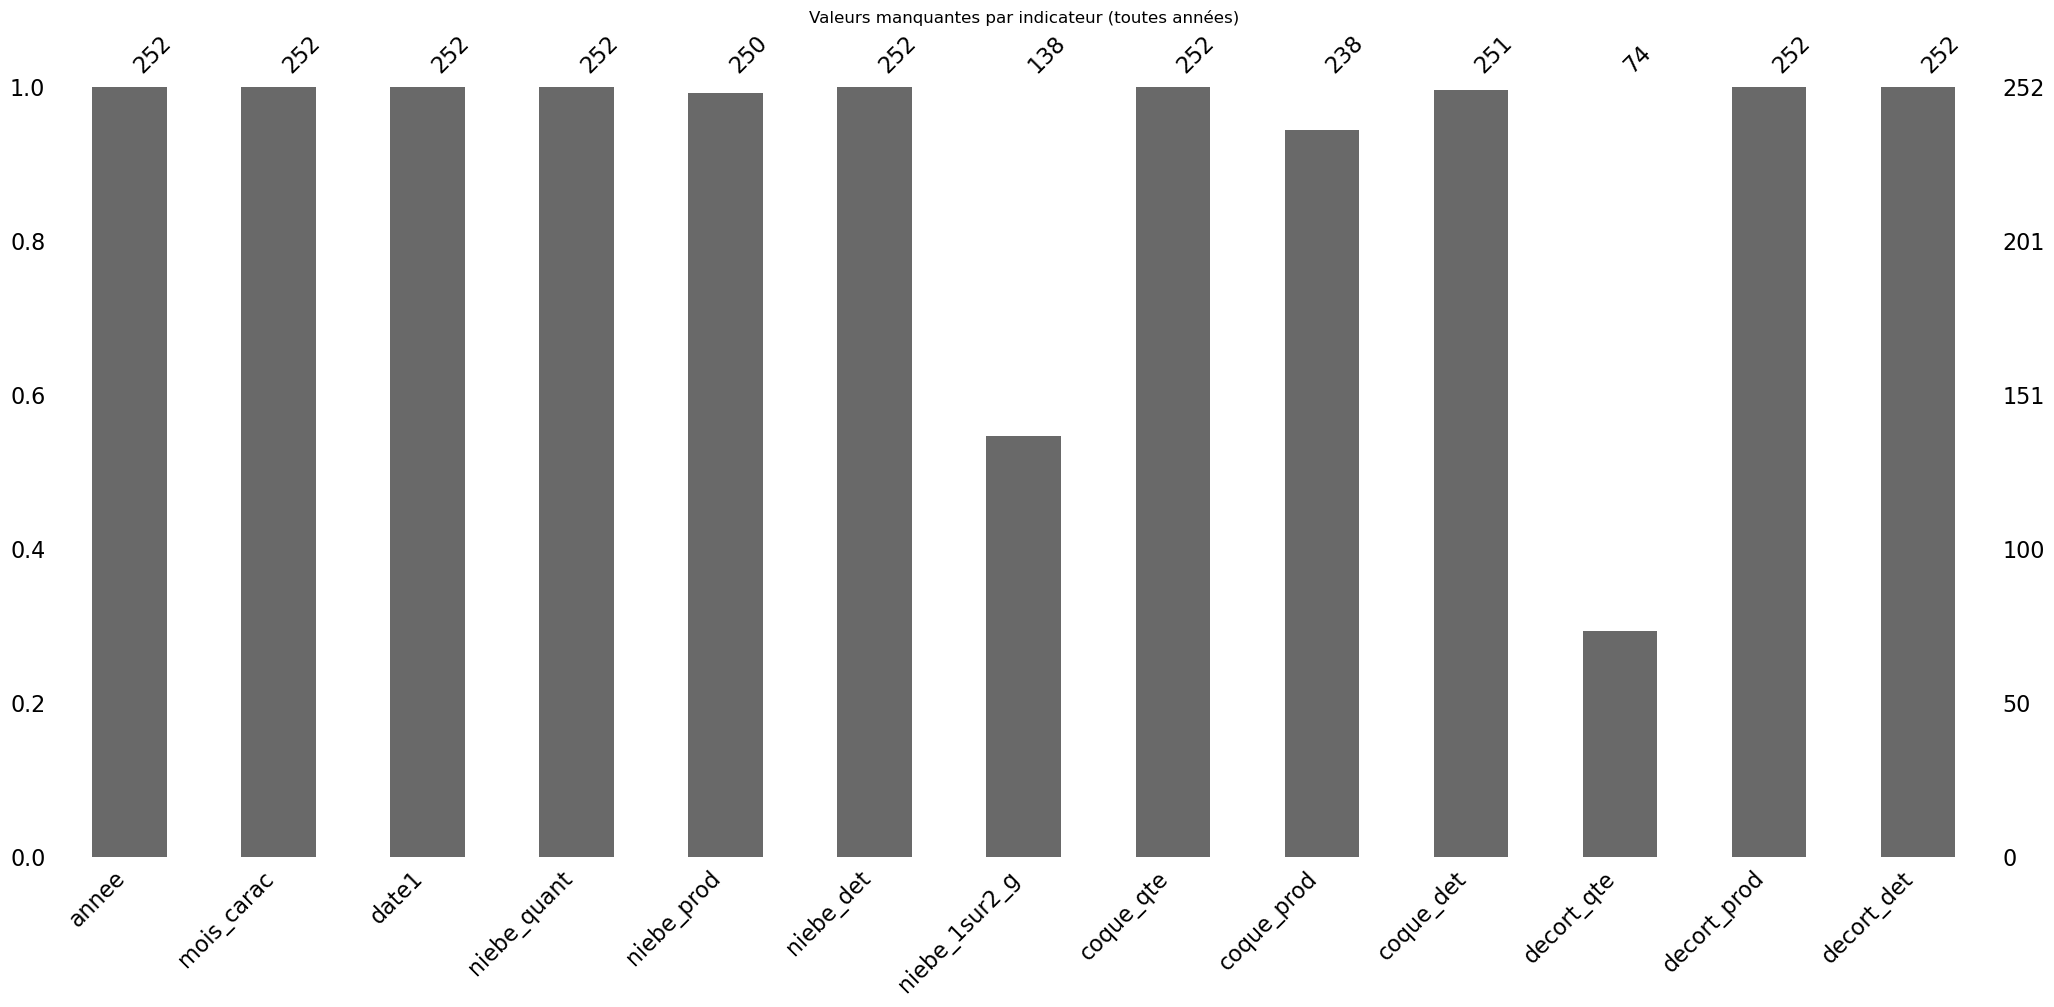

In [426]:
# Arachide
plt.figure(figsize=(10,6))
msno.bar(data_ara_lim)
plt.title("Valeurs manquantes par indicateur (toutes années)")
plt.show()

#### Vérification des doublons

In [427]:
#Vérification des doublons
#Mil, Maïs, RIz
data_rmm_lim.duplicated().sum()

np.int64(0)

In [428]:
#Arachide
data_ara_lim.duplicated().sum()

np.int64(0)

#### Travail sur les prix au détail

##### Céréales

In [429]:
# Extraction des prix de détail moyen pour certains céréales: mil, mais, sorgho, riz importé
data_cer = data_rmm_lim[['annee', 'mois_carac',  'mil_detail','maïs_detail','sorgho_detail','riz_imp_br_ord', 'riz_loc_decort']]
data_cer

,annee,mois_carac,mil_detail,maïs_detail,sorgho_detail,riz_imp_br_ord,riz_loc_decort
0,2000.0,août,128.384921,134.681818,114.409091,209.937500,177.272727
1,2000.0,avril,115.594059,133.602151,105.963855,215.880000,185.921053
2,2000.0,décembre,103.839286,124.512195,97.903226,200.769231,179.772727
3,2000.0,février,113.104167,124.552239,103.155172,214.545455,183.269231
4,2000.0,janvier,108.730769,118.932039,98.800000,216.814516,181.136364
...,...,...,...,...,...,...,...
257,2021.0,mai,263.829787,235.156250,254.886364,318.691489,305.222222
258,2021.0,mars,260.360825,227.654321,255.583333,316.917526,306.162791
259,2021.0,novembre,270.689655,265.166667,278.846154,330.764706,315.813953
260,2021.0,octobre,272.738095,270.294118,272.674419,336.558442,314.807692


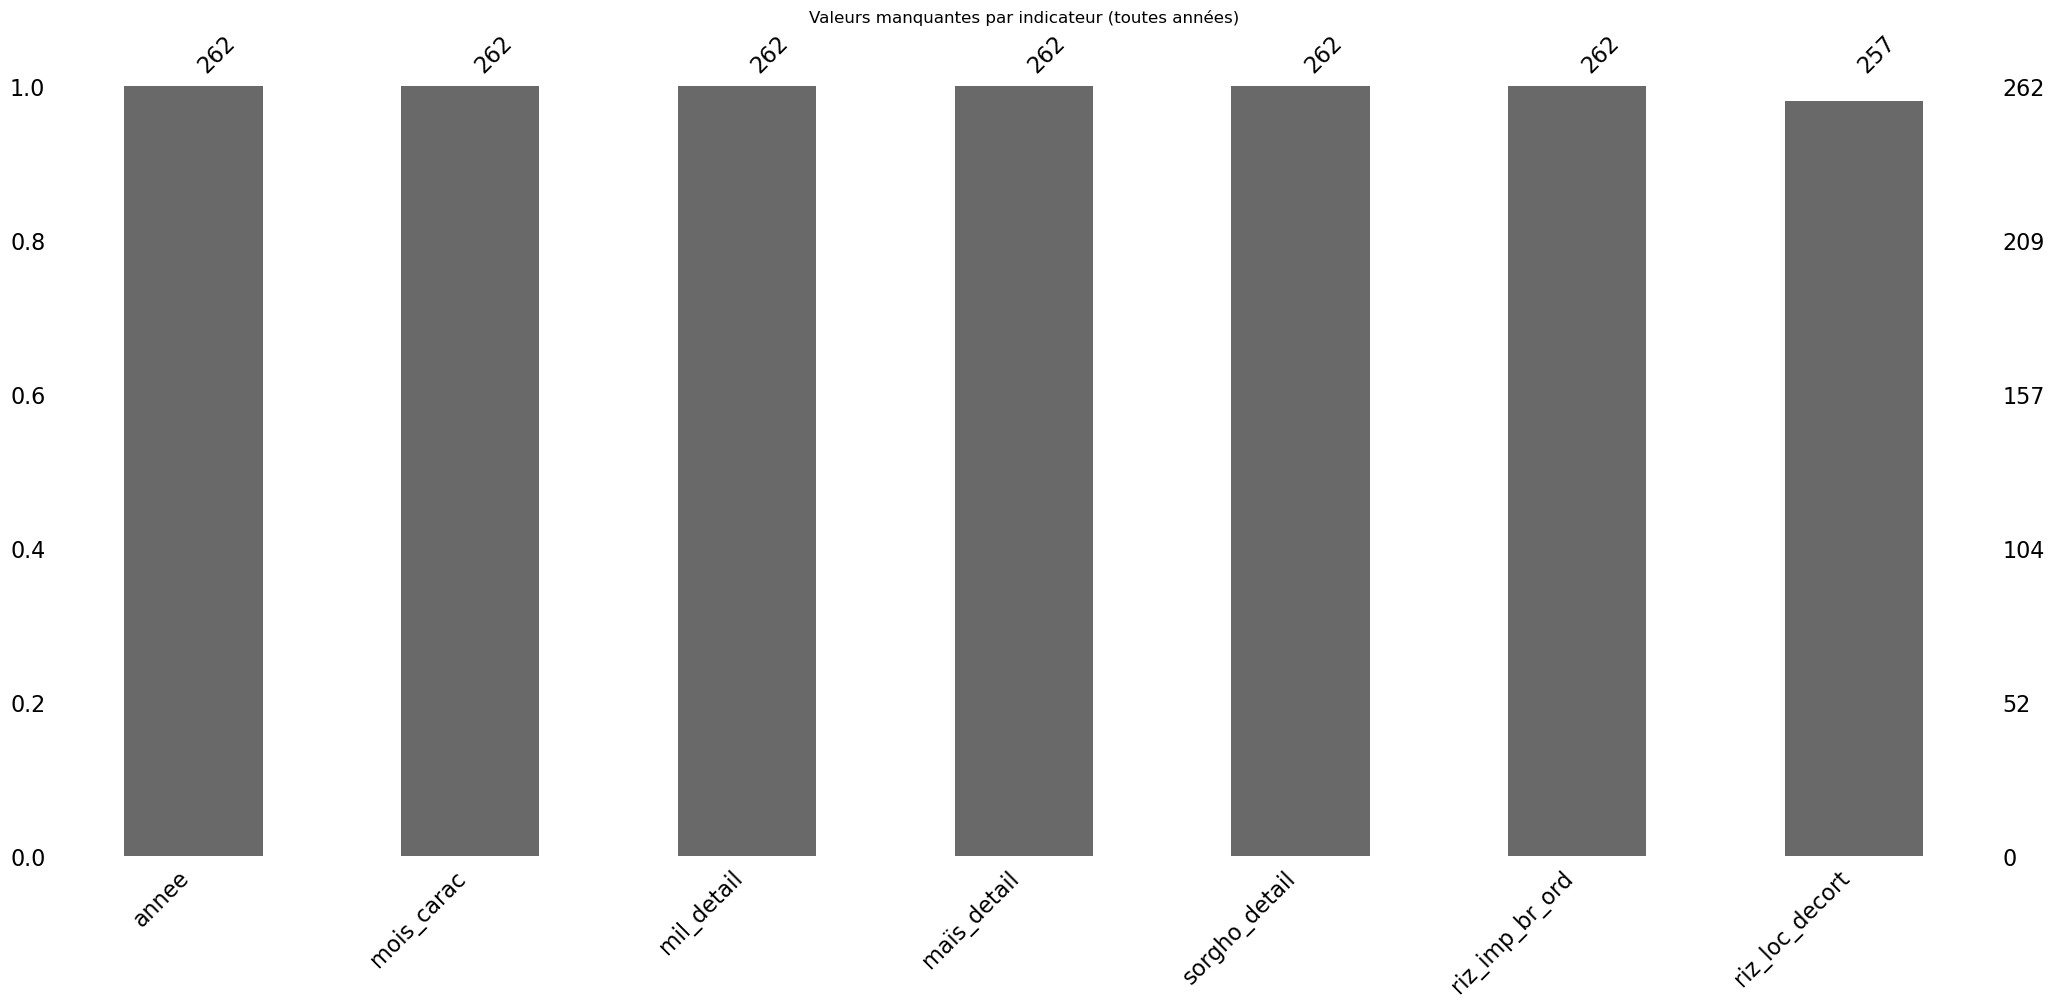

In [430]:
# mil, mais, sorgho, riz importé
plt.figure(figsize=(10,6))
msno.bar(data_cer)
plt.title("Valeurs manquantes par indicateur (toutes années)")
plt.show()

##### Vérification des missing values

In [431]:
data_cer.isna().sum()

annee             0
mois_carac        0
mil_detail        0
maïs_detail       0
sorgho_detail     0
riz_imp_br_ord    0
riz_loc_decort    5
dtype: int64

In [432]:
# Aperçu des observations qui sont manquantes
#data_mil_mais[data_mil_mais[["mil_detail", "mais_detail"]].isna()].head()

In [433]:
#Imputation des données manquantes avec l'obseration la plus récente
#data_mil['mil_detail'] = data_mil.groupby(['region', 'annee'])['mil_detail'].fillna(method='bfill')

##### Imputation des données

La méthode d'imputation employé ici est basé sur la médiane. 

In [434]:
# Liste des colonnes à imputer
colonnes = ['mil_detail', 'sorgho_detail', 'maïs_detail', 'riz_imp_br_ord', 'riz_loc_decort']
# Imputation par la médiane par mois
for col in colonnes:
    data_cer[col] = (
        data_cer.groupby('mois_carac', group_keys=False)[col]
        .apply(lambda x: x.fillna(x.median()))
    )

C:\Users\ombaye\AppData\Local\Temp\ipykernel_4636\768044196.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cer[col] = (
C:\Users\ombaye\AppData\Local\Temp\ipykernel_4636\768044196.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cer[col] = (
C:\Users\ombaye\AppData\Local\Temp\ipykernel_4636\768044196.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

In [435]:
#data_mil['mil_detail'] = data_mil.groupby(['region', 'annee'])['mil_detail'].fillna(method='ffill')
data_cer.isna().sum()

annee             0
mois_carac        0
mil_detail        0
maïs_detail       0
sorgho_detail     0
riz_imp_br_ord    0
riz_loc_decort    0
dtype: int64

In [436]:
data_cer.columns

Index(['annee', 'mois_carac', 'mil_detail', 'maïs_detail', 'sorgho_detail',
       'riz_imp_br_ord', 'riz_loc_decort'],
      dtype='object')

In [437]:
#Imputation des données manquantes restante par la moyenne
#data_cer[['mil_detail', 'mais_detail', 'sorgho_detail', 'riz_imp_br_ord']] = data_cer.groupby(['region', 'annee'])[['mil_detail', 'mais_detail', 'sorgho_detail', 'riz_imp_br_ord']].transform(lambda x: x.fillna(x.mean()))


##### Oléagineux

In [438]:
data_ara_lim

,annee,mois_carac,date1,niebe_quant,niebe_prod,niebe_det,niebe_1sur2_g,coque_qte,coque_prod,coque_det,decort_qte,decort_prod,decort_det
0,2000.0,août,8.0,2.520875,135.526316,155.769231,NaN,2.516591,148.750000,178.500000,NaN,331.296296,386.038136
1,2000.0,avril,4.0,3.896792,125.958333,155.250000,NaN,3.981967,123.000000,156.120690,NaN,225.600000,304.020619
2,2000.0,décembre,12.0,3.233190,146.818182,162.142857,NaN,17.010000,112.666667,137.820513,NaN,203.437500,275.338983
3,2000.0,février,2.0,3.758889,118.333333,141.884058,NaN,14.237209,128.800000,150.609756,NaN,236.176471,280.985915
4,2000.0,janvier,1.0,3.270391,95.909091,127.400794,NaN,11.544872,114.189189,135.800000,NaN,215.972222,264.578947
...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,2021.0,mai,5.0,18.053333,431.458333,532.666667,505.000000,14.055385,298.250000,378.584615,30.477011,624.107143,731.057471
248,2021.0,mars,3.0,34.079032,450.694444,540.000000,477.129630,14.440000,301.285714,368.600000,38.310000,585.483871,679.722222
249,2021.0,novembre,11.0,11.706849,389.534884,591.095890,620.535714,22.121918,258.152174,370.958904,5.838889,402.777778,653.125000
250,2021.0,octobre,10.0,11.636667,346.323529,521.250000,555.769231,5.775000,280.555556,493.125000,6.721538,587.857143,736.538462


In [439]:
# Extraction des prix de détail moyen pour certains céréales: Niébé et arachide
data_leg = data_ara_lim[['annee', 'mois_carac',  'niebe_det','decort_det','coque_det']]
data_leg

,annee,mois_carac,niebe_det,decort_det,coque_det
0,2000.0,août,155.769231,386.038136,178.500000
1,2000.0,avril,155.250000,304.020619,156.120690
2,2000.0,décembre,162.142857,275.338983,137.820513
3,2000.0,février,141.884058,280.985915,150.609756
4,2000.0,janvier,127.400794,264.578947,135.800000
...,...,...,...,...,...
247,2021.0,mai,532.666667,731.057471,378.584615
248,2021.0,mars,540.000000,679.722222,368.600000
249,2021.0,novembre,591.095890,653.125000,370.958904
250,2021.0,octobre,521.250000,736.538462,493.125000


In [440]:
data_leg.isna().sum()

annee         0
mois_carac    0
niebe_det     0
decort_det    0
coque_det     1
dtype: int64

In [441]:
#data_cer.isna().sum()

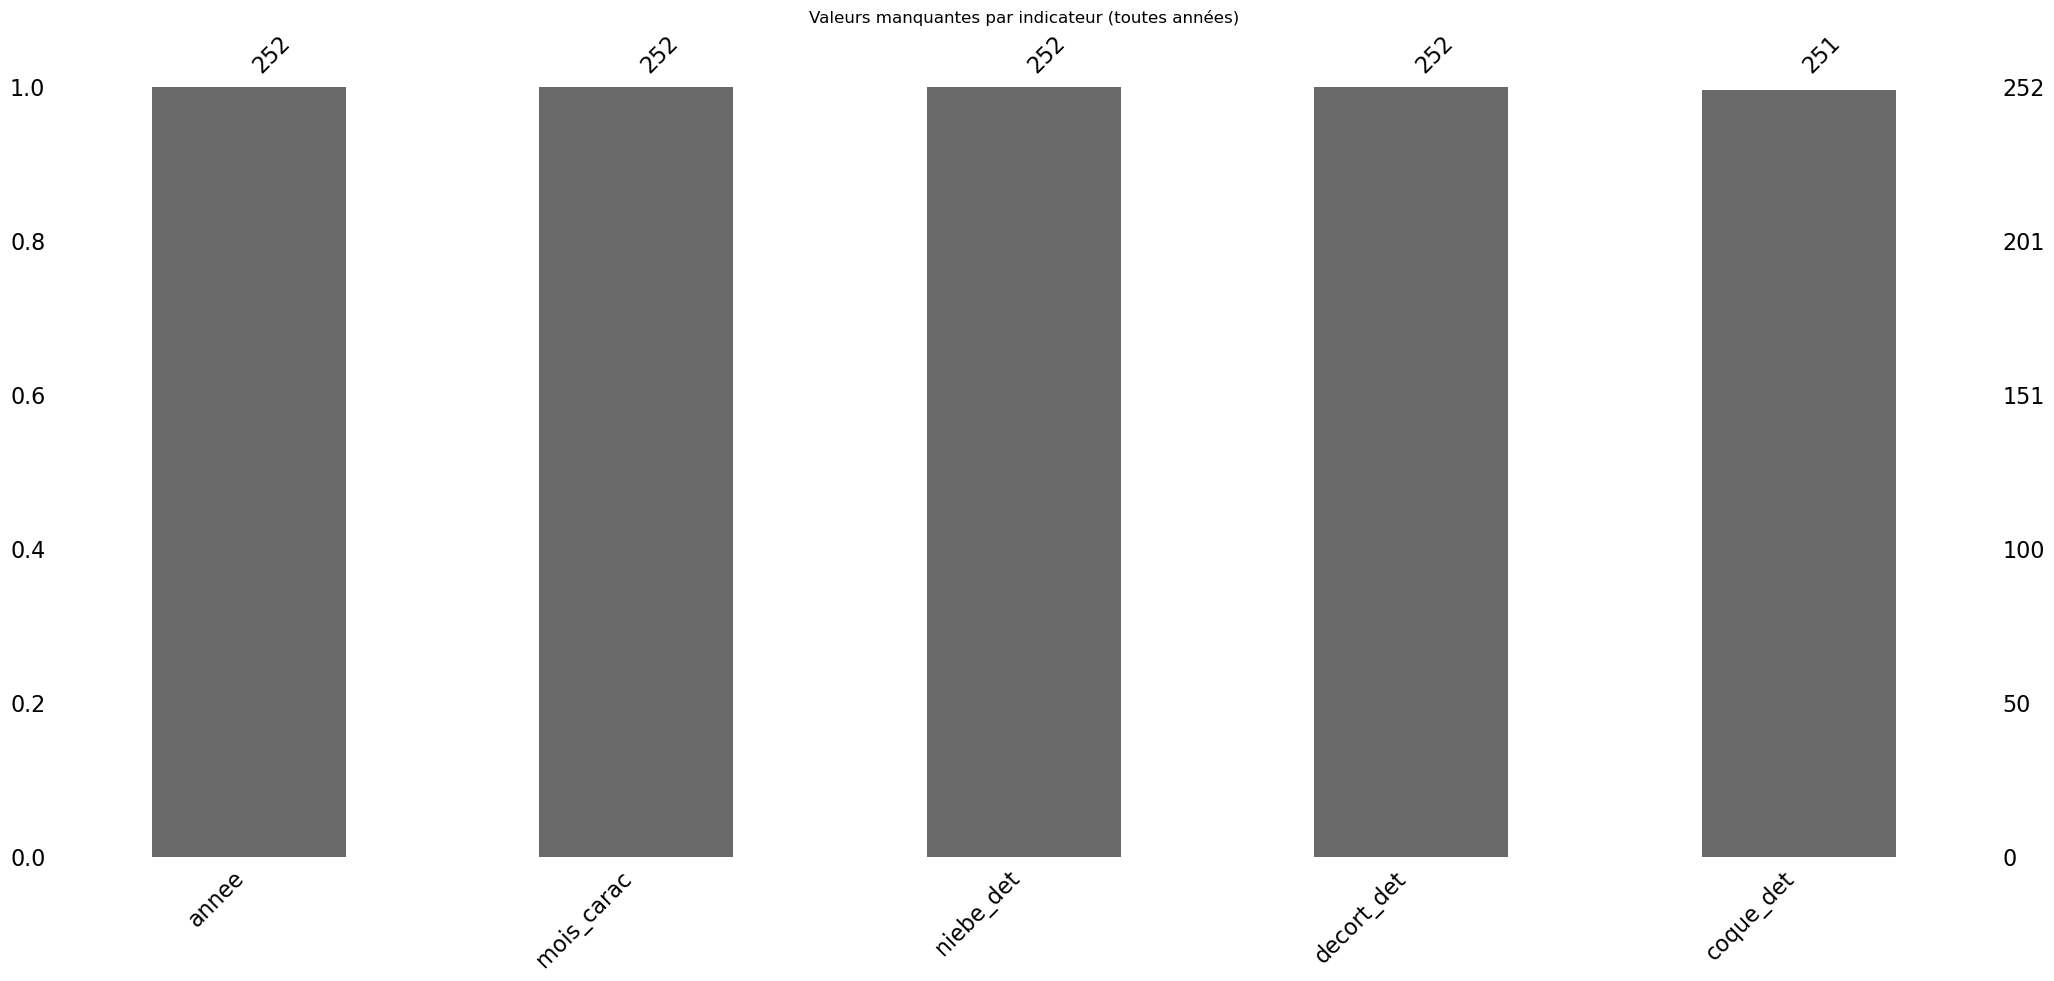

In [442]:
# Niébé et arachide décortiqué
plt.figure(figsize=(10,6))
msno.bar(data_leg)
plt.title("Valeurs manquantes par indicateur (toutes années)")
plt.show()

Nous avons employé la méthode d'imputation basée sur la médiane.

In [443]:
# On applique une imputation par la médiane à l'ensemble des variables de notre base des légumineuses
for x in ['niebe_det', 'decort_det', 'coque_det']:
    data_leg.loc[:, x] = (
        data_leg.groupby('mois_carac', group_keys=False)[x]
        .apply(lambda x: x.fillna(x.median()))
    )


In [444]:
#data_leg = data_leg.dropna()
#data_cer = data_cer.dropna()

In [445]:
data_leg.isna().sum()

annee         0
mois_carac    0
niebe_det     0
decort_det    0
coque_det     0
dtype: int64

In [446]:
data_cer.isna().sum()

annee             0
mois_carac        0
mil_detail        0
maïs_detail       0
sorgho_detail     0
riz_imp_br_ord    0
riz_loc_decort    0
dtype: int64

##### Basses de données pour les analyses

In [447]:
#Céréales
data_cer

,annee,mois_carac,mil_detail,maïs_detail,sorgho_detail,riz_imp_br_ord,riz_loc_decort
0,2000.0,août,128.384921,134.681818,114.409091,209.937500,177.272727
1,2000.0,avril,115.594059,133.602151,105.963855,215.880000,185.921053
2,2000.0,décembre,103.839286,124.512195,97.903226,200.769231,179.772727
3,2000.0,février,113.104167,124.552239,103.155172,214.545455,183.269231
4,2000.0,janvier,108.730769,118.932039,98.800000,216.814516,181.136364
...,...,...,...,...,...,...,...
257,2021.0,mai,263.829787,235.156250,254.886364,318.691489,305.222222
258,2021.0,mars,260.360825,227.654321,255.583333,316.917526,306.162791
259,2021.0,novembre,270.689655,265.166667,278.846154,330.764706,315.813953
260,2021.0,octobre,272.738095,270.294118,272.674419,336.558442,314.807692


In [448]:
data_cer['annee']=data_cer['annee'].astype(int)
data_cer

C:\Users\ombaye\AppData\Local\Temp\ipykernel_4636\775816868.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cer['annee']=data_cer['annee'].astype(int)


,annee,mois_carac,mil_detail,maïs_detail,sorgho_detail,riz_imp_br_ord,riz_loc_decort
0,2000,août,128.384921,134.681818,114.409091,209.937500,177.272727
1,2000,avril,115.594059,133.602151,105.963855,215.880000,185.921053
2,2000,décembre,103.839286,124.512195,97.903226,200.769231,179.772727
3,2000,février,113.104167,124.552239,103.155172,214.545455,183.269231
4,2000,janvier,108.730769,118.932039,98.800000,216.814516,181.136364
...,...,...,...,...,...,...,...
257,2021,mai,263.829787,235.156250,254.886364,318.691489,305.222222
258,2021,mars,260.360825,227.654321,255.583333,316.917526,306.162791
259,2021,novembre,270.689655,265.166667,278.846154,330.764706,315.813953
260,2021,octobre,272.738095,270.294118,272.674419,336.558442,314.807692


In [449]:
#Changement du type de la variable annee de décimal à nombre entier
data_cer['annee'] = data_cer['annee'].astype(int)
data_cer

C:\Users\ombaye\AppData\Local\Temp\ipykernel_4636\974236559.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cer['annee'] = data_cer['annee'].astype(int)


,annee,mois_carac,mil_detail,maïs_detail,sorgho_detail,riz_imp_br_ord,riz_loc_decort
0,2000,août,128.384921,134.681818,114.409091,209.937500,177.272727
1,2000,avril,115.594059,133.602151,105.963855,215.880000,185.921053
2,2000,décembre,103.839286,124.512195,97.903226,200.769231,179.772727
3,2000,février,113.104167,124.552239,103.155172,214.545455,183.269231
4,2000,janvier,108.730769,118.932039,98.800000,216.814516,181.136364
...,...,...,...,...,...,...,...
257,2021,mai,263.829787,235.156250,254.886364,318.691489,305.222222
258,2021,mars,260.360825,227.654321,255.583333,316.917526,306.162791
259,2021,novembre,270.689655,265.166667,278.846154,330.764706,315.813953
260,2021,octobre,272.738095,270.294118,272.674419,336.558442,314.807692


In [450]:
#data_cer[data_cer['region']=='DK'].groupby('annee')['mil_detail'].std()

In [451]:
#Oléagineux
data_leg['annee'] = data_leg['annee'].astype(int)
data_leg

C:\Users\ombaye\AppData\Local\Temp\ipykernel_4636\3800131306.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_leg['annee'] = data_leg['annee'].astype(int)


,annee,mois_carac,niebe_det,decort_det,coque_det
0,2000,août,155.769231,386.038136,178.500000
1,2000,avril,155.250000,304.020619,156.120690
2,2000,décembre,162.142857,275.338983,137.820513
3,2000,février,141.884058,280.985915,150.609756
4,2000,janvier,127.400794,264.578947,135.800000
...,...,...,...,...,...
247,2021,mai,532.666667,731.057471,378.584615
248,2021,mars,540.000000,679.722222,368.600000
249,2021,novembre,591.095890,653.125000,370.958904
250,2021,octobre,521.250000,736.538462,493.125000


#### Fusion des bases de données pour les prix (variable dépendante)

Base des céréales

In [452]:
# Création des identifiant unique
#data_cer['region'].drop_duplicates().tolist()

In [453]:
#data_cer['mois_carac'].drop_duplicates().tolist()

In [454]:
#data_leg['region'].drop_duplicates().tolist()

In [455]:
data_leg['mois_carac'].drop_duplicates().tolist()

['août',
 'avril',
 'décembre',
 'février',
 'janvier',
 'juillet',
 'juin',
 'mai',
 'mars',
 'novembre',
 'octobre',
 'septembre']

In [456]:
data_cer

,annee,mois_carac,mil_detail,maïs_detail,sorgho_detail,riz_imp_br_ord,riz_loc_decort
0,2000,août,128.384921,134.681818,114.409091,209.937500,177.272727
1,2000,avril,115.594059,133.602151,105.963855,215.880000,185.921053
2,2000,décembre,103.839286,124.512195,97.903226,200.769231,179.772727
3,2000,février,113.104167,124.552239,103.155172,214.545455,183.269231
4,2000,janvier,108.730769,118.932039,98.800000,216.814516,181.136364
...,...,...,...,...,...,...,...
257,2021,mai,263.829787,235.156250,254.886364,318.691489,305.222222
258,2021,mars,260.360825,227.654321,255.583333,316.917526,306.162791
259,2021,novembre,270.689655,265.166667,278.846154,330.764706,315.813953
260,2021,octobre,272.738095,270.294118,272.674419,336.558442,314.807692


In [457]:
#Dictionnaire pour les régions
# dict_reg = {'DK':1,
#            'DL':2,
#            'FK':3,
#            'KD':4,
#            'KF':5,
#            'KG':6,
#            'KL':7,
#            'LG':8,
#             'MT':9,
#             'SD':10,
#             'SL':11,
#             'TC':12,
#             'TH':13,
#             'ZG':14
# }
#Dictionnaire pour les moi
dict_mois = {'janvier':1,
            'février':2,
            'mars':3,
            'avril':4,
            'mai':5,
            'juin':6,
            'juillet':7,
            'août':8,
            'septembre':9,
            'octobre':10,
            'novembre':11,
            'décembre':12}

In [458]:
# Attribution pour chaque région d'un code à travers une nouvelle variable
#data_cer['code_reg']=data_cer['region'].map(dict_reg)
data_cer['code_mois']=data_cer['mois_carac'].map(dict_mois)
# Atribution pour chaque mois d'un code à traver d'une nouvelle variable
data_cer

C:\Users\ombaye\AppData\Local\Temp\ipykernel_4636\763069077.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cer['code_mois']=data_cer['mois_carac'].map(dict_mois)


,annee,mois_carac,mil_detail,maïs_detail,sorgho_detail,riz_imp_br_ord,riz_loc_decort,code_mois
0,2000,août,128.384921,134.681818,114.409091,209.937500,177.272727,8
1,2000,avril,115.594059,133.602151,105.963855,215.880000,185.921053,4
2,2000,décembre,103.839286,124.512195,97.903226,200.769231,179.772727,12
3,2000,février,113.104167,124.552239,103.155172,214.545455,183.269231,2
4,2000,janvier,108.730769,118.932039,98.800000,216.814516,181.136364,1
...,...,...,...,...,...,...,...,...
257,2021,mai,263.829787,235.156250,254.886364,318.691489,305.222222,5
258,2021,mars,260.360825,227.654321,255.583333,316.917526,306.162791,3
259,2021,novembre,270.689655,265.166667,278.846154,330.764706,315.813953,11
260,2021,octobre,272.738095,270.294118,272.674419,336.558442,314.807692,10


In [459]:
data_cer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   annee           262 non-null    int64  
 1   mois_carac      262 non-null    object 
 2   mil_detail      262 non-null    float64
 3   maïs_detail     262 non-null    float64
 4   sorgho_detail   262 non-null    float64
 5   riz_imp_br_ord  262 non-null    float64
 6   riz_loc_decort  262 non-null    float64
 7   code_mois       262 non-null    int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 16.5+ KB


In [460]:
# ✅ Création d'un code unique bien formaté pour data_cer
data_cer['id'] = (
    data_cer['annee'].astype(str) + '_' +
    data_cer['code_mois'].astype(str).str.zfill(2)  # Mois toujours sur 2 chiffres
)

data_cer.head()

C:\Users\ombaye\AppData\Local\Temp\ipykernel_4636\213450716.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cer['id'] = (


,annee,mois_carac,mil_detail,maïs_detail,sorgho_detail,riz_imp_br_ord,riz_loc_decort,code_mois,id
0,2000,août,128.384921,134.681818,114.409091,209.937500,177.272727,8,2000_08
1,2000,avril,115.594059,133.602151,105.963855,215.880000,185.921053,4,2000_04
2,2000,décembre,103.839286,124.512195,97.903226,200.769231,179.772727,12,2000_12
3,2000,février,113.104167,124.552239,103.155172,214.545455,183.269231,2,2000_02
4,2000,janvier,108.730769,118.932039,98.800000,216.814516,181.136364,1,2000_01


Base oléagineux

In [461]:
# Attribution pour chaque région d'un code à travers une nouvelle variable
#data_leg['code_reg']=data_leg['region'].map(dict_reg)
data_leg['code_mois']=data_leg['mois_carac'].map(dict_mois)
# Atribution pour chaque mois d'un code à traver d'une nouvelle variable
data_leg

C:\Users\ombaye\AppData\Local\Temp\ipykernel_4636\3650723772.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_leg['code_mois']=data_leg['mois_carac'].map(dict_mois)


,annee,mois_carac,niebe_det,decort_det,coque_det,code_mois
0,2000,août,155.769231,386.038136,178.500000,8
1,2000,avril,155.250000,304.020619,156.120690,4
2,2000,décembre,162.142857,275.338983,137.820513,12
3,2000,février,141.884058,280.985915,150.609756,2
4,2000,janvier,127.400794,264.578947,135.800000,1
...,...,...,...,...,...,...
247,2021,mai,532.666667,731.057471,378.584615,5
248,2021,mars,540.000000,679.722222,368.600000,3
249,2021,novembre,591.095890,653.125000,370.958904,11
250,2021,octobre,521.250000,736.538462,493.125000,10


In [462]:
# ✅ Création d'un code unique bien formaté pour data_leg
data_leg['id'] = (
    data_leg['annee'].astype(str) + '_' +
    data_leg['code_mois'].astype(str).str.zfill(2)  # Mois toujours sur 2 chiffres
)

data_leg.head()

C:\Users\ombaye\AppData\Local\Temp\ipykernel_4636\212205094.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_leg['id'] = (


,annee,mois_carac,niebe_det,decort_det,coque_det,code_mois,id
0,2000,août,155.769231,386.038136,178.500000,8,2000_08
1,2000,avril,155.250000,304.020619,156.120690,4,2000_04
2,2000,décembre,162.142857,275.338983,137.820513,12,2000_12
3,2000,février,141.884058,280.985915,150.609756,2,2000_02
4,2000,janvier,127.400794,264.578947,135.800000,1,2000_01


Fusion des deux bases de données

In [463]:
# Fusion de la base de données sur les prix
data_prix = pd.merge(data_cer[['annee','mois_carac','code_mois','id','mil_detail','maïs_detail','sorgho_detail','riz_imp_br_ord','riz_loc_decort']], data_leg[['niebe_det', 'decort_det','coque_det','id']], on='id', how='inner')
data_prix

,annee,mois_carac,code_mois,id,mil_detail,maïs_detail,sorgho_detail,riz_imp_br_ord,riz_loc_decort,niebe_det,decort_det,coque_det
0,2000,août,8,2000_08,128.384921,134.681818,114.409091,209.937500,177.272727,155.769231,386.038136,178.500000
1,2000,avril,4,2000_04,115.594059,133.602151,105.963855,215.880000,185.921053,155.250000,304.020619,156.120690
2,2000,décembre,12,2000_12,103.839286,124.512195,97.903226,200.769231,179.772727,162.142857,275.338983,137.820513
3,2000,février,2,2000_02,113.104167,124.552239,103.155172,214.545455,183.269231,141.884058,280.985915,150.609756
4,2000,janvier,1,2000_01,108.730769,118.932039,98.800000,216.814516,181.136364,127.400794,264.578947,135.800000
...,...,...,...,...,...,...,...,...,...,...,...,...
245,2021,mai,5,2021_05,263.829787,235.156250,254.886364,318.691489,305.222222,532.666667,731.057471,378.584615
246,2021,mars,3,2021_03,260.360825,227.654321,255.583333,316.917526,306.162791,540.000000,679.722222,368.600000
247,2021,novembre,11,2021_11,270.689655,265.166667,278.846154,330.764706,315.813953,591.095890,653.125000,370.958904
248,2021,octobre,10,2021_10,272.738095,270.294118,272.674419,336.558442,314.807692,521.250000,736.538462,493.125000


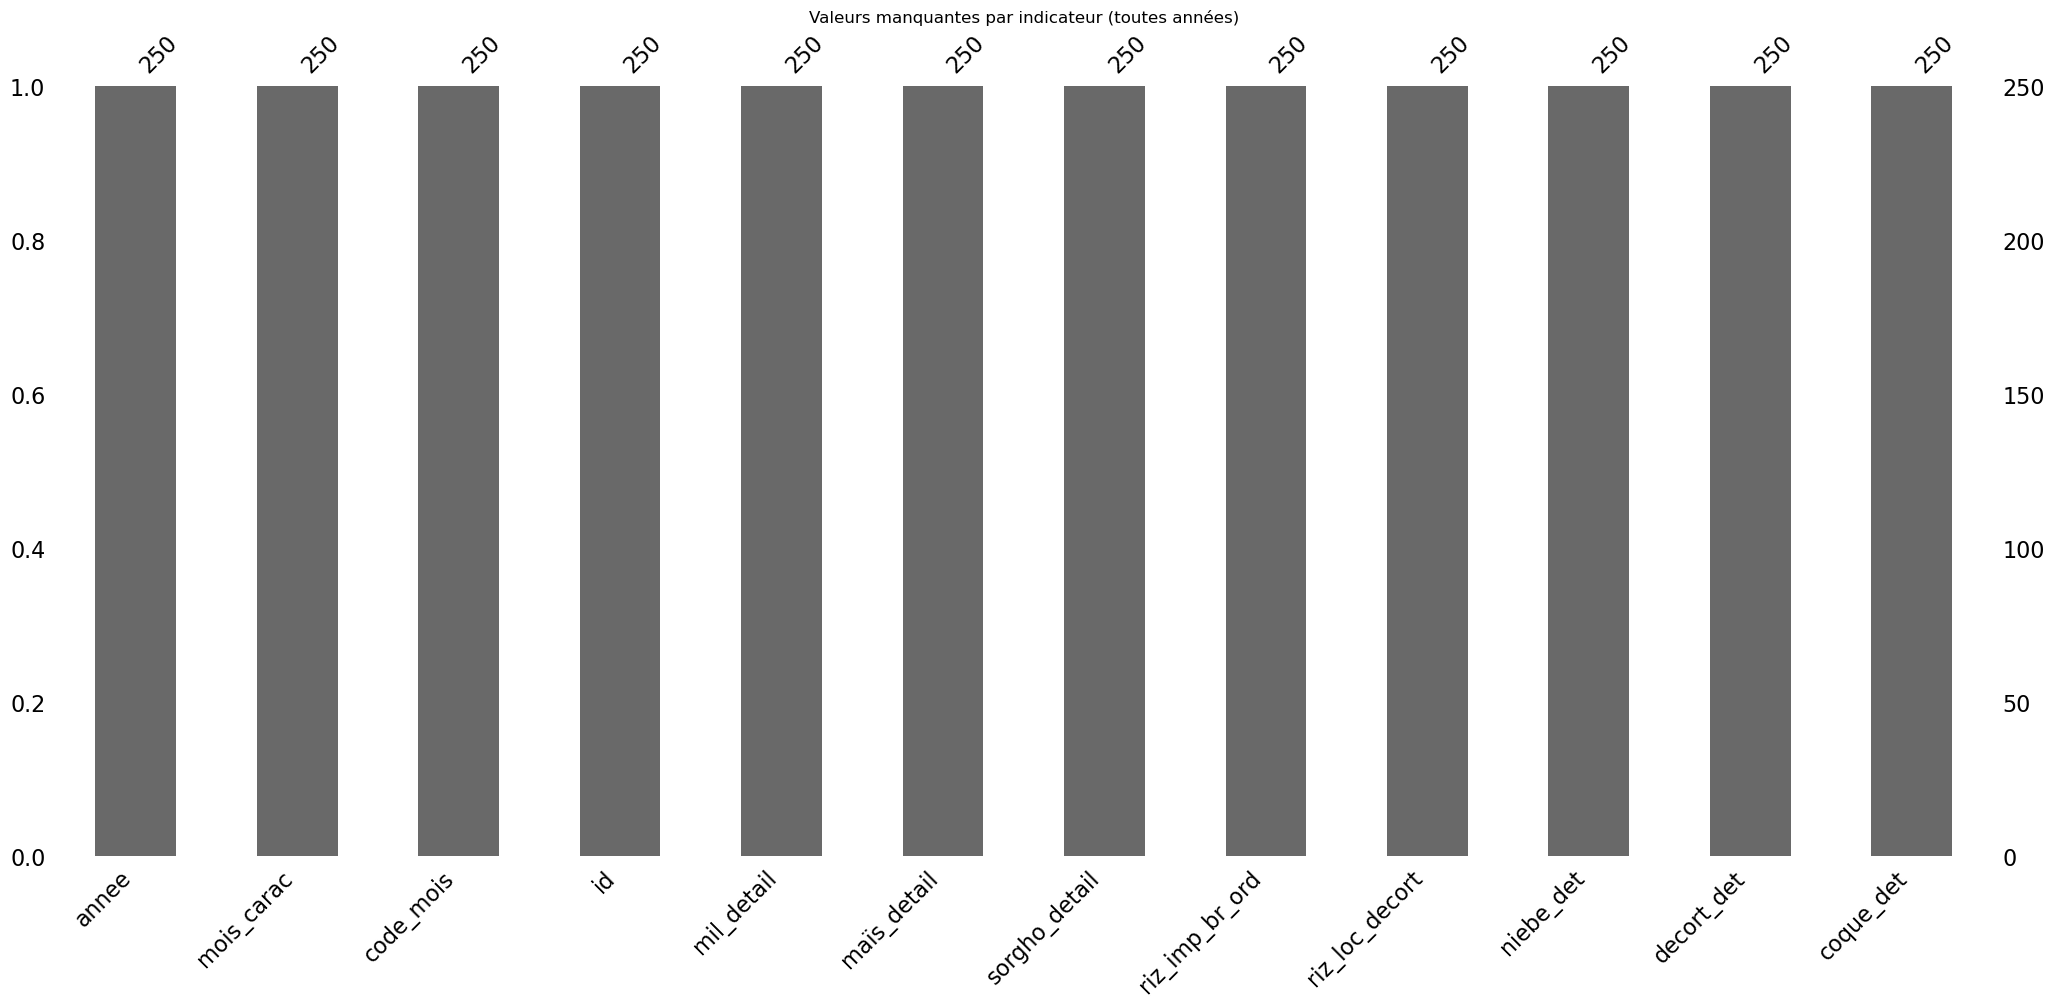

In [464]:
# Valeurs manquantes
plt.figure(figsize=(10,6))
msno.bar(data_prix)
plt.title("Valeurs manquantes par indicateur (toutes années)")
plt.show()

In [465]:
data_prix.columns

Index(['annee', 'mois_carac', 'code_mois', 'id', 'mil_detail', 'maïs_detail',
       'sorgho_detail', 'riz_imp_br_ord', 'riz_loc_decort', 'niebe_det',
       'decort_det', 'coque_det'],
      dtype='object')

In [466]:
# Créer la colonne 'date' avec le jour fixé à 1
data_prix['date'] = pd.to_datetime({
    'year': data_prix['annee'],
    'month': data_prix['code_mois'],
    'day': 1
})
data_prix

,annee,mois_carac,code_mois,id,mil_detail,maïs_detail,sorgho_detail,riz_imp_br_ord,riz_loc_decort,niebe_det,decort_det,coque_det,date
0,2000,août,8,2000_08,128.384921,134.681818,114.409091,209.937500,177.272727,155.769231,386.038136,178.500000,2000-08-01
1,2000,avril,4,2000_04,115.594059,133.602151,105.963855,215.880000,185.921053,155.250000,304.020619,156.120690,2000-04-01
2,2000,décembre,12,2000_12,103.839286,124.512195,97.903226,200.769231,179.772727,162.142857,275.338983,137.820513,2000-12-01
3,2000,février,2,2000_02,113.104167,124.552239,103.155172,214.545455,183.269231,141.884058,280.985915,150.609756,2000-02-01
4,2000,janvier,1,2000_01,108.730769,118.932039,98.800000,216.814516,181.136364,127.400794,264.578947,135.800000,2000-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,2021,mai,5,2021_05,263.829787,235.156250,254.886364,318.691489,305.222222,532.666667,731.057471,378.584615,2021-05-01
246,2021,mars,3,2021_03,260.360825,227.654321,255.583333,316.917526,306.162791,540.000000,679.722222,368.600000,2021-03-01
247,2021,novembre,11,2021_11,270.689655,265.166667,278.846154,330.764706,315.813953,591.095890,653.125000,370.958904,2021-11-01
248,2021,octobre,10,2021_10,272.738095,270.294118,272.674419,336.558442,314.807692,521.250000,736.538462,493.125000,2021-10-01


##### Représentation graphique de l'évolution des prix des différents spéculations.

In [467]:
import seaborn as sns

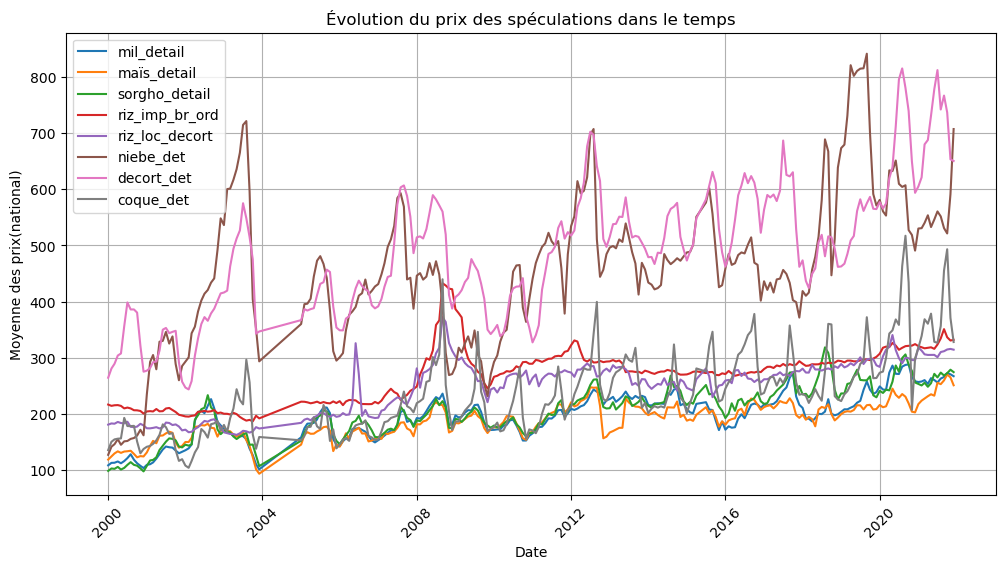

In [468]:
plt.figure(figsize=(12, 6))
for col in ['mil_detail', 'maïs_detail', 'sorgho_detail', 'riz_imp_br_ord',
            'riz_loc_decort', 'niebe_det', 'decort_det', 'coque_det']:
    sns.lineplot(x=data_prix['date'], y=col, data=data_prix, label=col)
plt.title("Évolution du prix des spéculations dans le temps")
plt.xlabel("Date")
plt.ylabel("Moyenne des prix(national)")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()


##### Niebe detail et arachide décortiqué détail

Nous allons nous focaliser sur le Niebe et l'archide décortiqué en ce qui concerne les prédictions.

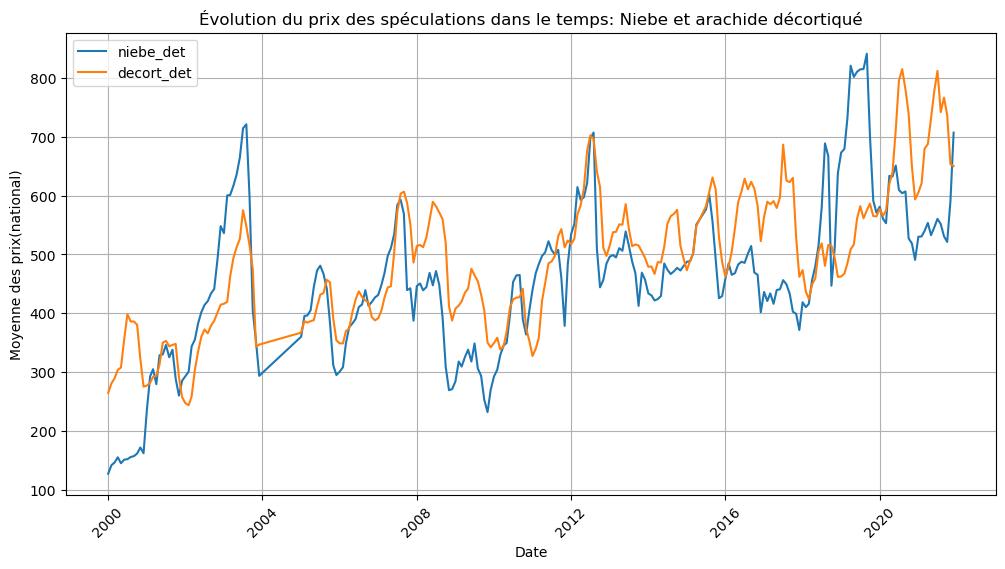

In [469]:
plt.figure(figsize=(12, 6))
for col in ['niebe_det', 'decort_det']:
    sns.lineplot(x=data_prix['date'], y=col, data=data_prix, label=col)
plt.title("Évolution du prix des spéculations dans le temps: Niebe et arachide décortiqué")
plt.xlabel("Date")
plt.ylabel("Moyenne des prix(national)")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()


##### Traitement des valeurs aberrantes

In [470]:
from IPython.display import clear_output

In [471]:
# Fonction pour mettre à jour et afficher le boxplot
def update_plot(variable):
    clear_output(wait=True)
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=data_prix[variable], color='skyblue')
    plt.title(f'Boxplot de {variable}')
    plt.ylabel('Valeurs')
    plt.show()

# Créer un widget Dropdown
dropdown = widgets.Dropdown(
    options=list(data_prix.keys()),
    value='mil_detail',
    description='Variable:',
    style={'description_width': 'initial'}
)

# Lier le widget à la fonction de mise à jourc
interactive_plot = widgets.interactive(update_plot, variable=dropdown)

# Afficher le widget
display(interactive_plot)

interactive(children=(Dropdown(description='Variable:', index=4, options=('annee', 'mois_carac', 'code_mois', …

##### Imputation des données aberrantes

Pour le Niebe detail, nous allons faire une imputation par la valeur sup pour les upper outliers et par la valeur inf pour les lower outlier.

In [472]:
import pandas as pd
# Exemple : ton DataFrame
# data = pd.read_csv("data.csv")
# --- Fonction pour remplacer les outliers ---
def traiter_outliers(df):
    df_out = df.copy()    
    for col in df_out.select_dtypes(include='number').columns:
        Q1 = df_out[col].quantile(0.25)
        Q3 = df_out[col].quantile(0.75)
        IQR = Q3 - Q1        
        borne_inf = Q1 - 1.5 * IQR
        borne_sup = Q3 + 1.5 * IQR        
        # Remplacement : valeurs inférieures au minimum remplacées par borne_inf
        df_out.loc[df_out[col] < borne_inf, col] = borne_inf        
        # Valeurs supérieures au maximum remplacées par borne_sup
        df_out.loc[df_out[col] > borne_sup, col] = borne_sup    
    return df_out

In [473]:
# --- Application ---
col = ['niebe_det']
data_prix[col] = traiter_outliers(data_prix[col])
# Vérification d'une variable
# print(data[['variable', 'variable_corrigee']])

##### Visualisation des résultats de l'imputation

In [474]:
# Fonction pour mettre à jour et afficher le boxplot
def update_plot(variable):
    clear_output(wait=True)
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=data_prix[variable], color='skyblue')
    plt.title(f'Boxplot de {variable}')
    plt.ylabel('Valeurs')
    plt.show()

# Créer un widget Dropdown
dropdown = widgets.Dropdown(
    options=list(data_prix.keys()),
    value='mil_detail',
    description='Variable:',
    style={'description_width': 'initial'}
)

# Lier le widget à la fonction de mise à jourc
interactive_plot = widgets.interactive(update_plot, variable=dropdown)

# Afficher le widget
display(interactive_plot)

interactive(children=(Dropdown(description='Variable:', index=4, options=('annee', 'mois_carac', 'code_mois', …

##### Evolution graphique aprés imputation

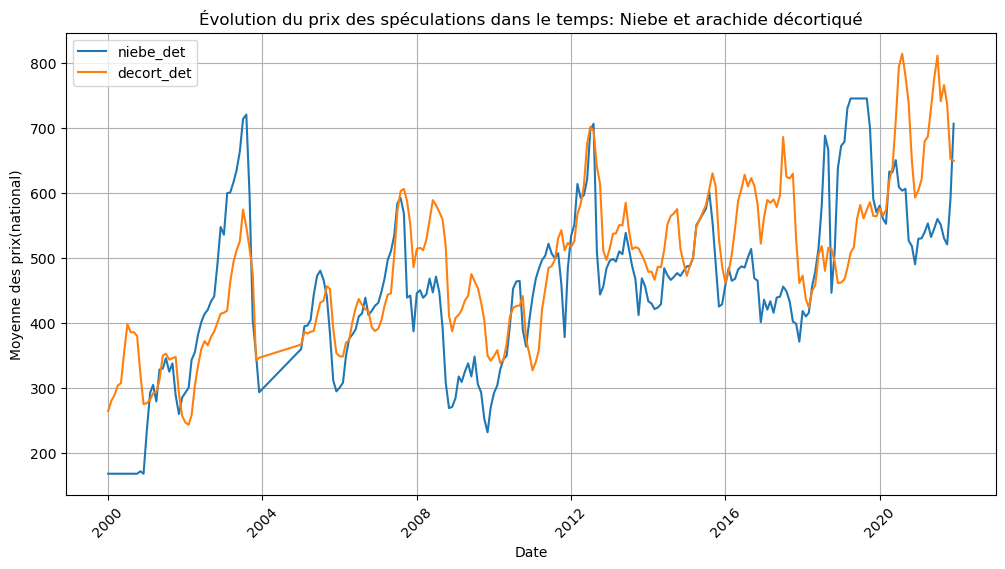

In [475]:
plt.figure(figsize=(12, 6))
for col in ['niebe_det', 'decort_det']:
    sns.lineplot(x=data_prix['date'], y=col, data=data_prix, label=col)
plt.title("Évolution du prix des spéculations dans le temps: Niebe et arachide décortiqué")
plt.xlabel("Date")
plt.ylabel("Moyenne des prix(national)")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()


In [476]:
data_prix = data_prix.sort_values('date')
data_prix

,annee,mois_carac,code_mois,id,mil_detail,maïs_detail,sorgho_detail,riz_imp_br_ord,riz_loc_decort,niebe_det,decort_det,coque_det,date
4,2000,janvier,1,2000_01,108.730769,118.932039,98.800000,216.814516,181.136364,168.285880,264.578947,135.800000,2000-01-01
3,2000,février,2,2000_02,113.104167,124.552239,103.155172,214.545455,183.269231,168.285880,280.985915,150.609756,2000-02-01
8,2000,mars,3,2000_03,113.334646,129.870690,102.450000,215.578512,182.763158,168.285880,289.333333,154.863014,2000-03-01
1,2000,avril,4,2000_04,115.594059,133.602151,105.963855,215.880000,185.921053,168.285880,304.020619,156.120690,2000-04-01
7,2000,mai,5,2000_05,112.398305,130.873786,101.224490,214.487179,183.947368,168.285880,307.700893,156.568627,2000-05-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,2021,août,8,2021_08,263.055556,253.137255,273.709677,334.520548,310.294118,551.587302,741.785714,356.562500,2021-08-01
249,2021,septembre,9,2021_09,265.977011,259.833333,268.571429,351.000000,311.744186,530.714286,766.554054,455.208333,2021-09-01
248,2021,octobre,10,2021_10,272.738095,270.294118,272.674419,336.558442,314.807692,521.250000,736.538462,493.125000,2021-10-01
247,2021,novembre,11,2021_11,270.689655,265.166667,278.846154,330.764706,315.813953,591.095890,653.125000,370.958904,2021-11-01


#### Données d'évapotranspiration

Nous avons aussi collecté des données sur la météo: évapotranspiration, pluviométrie et température

In [477]:
# Données d'évapotranspiration
evapo_trans = pd.read_csv(Path(DATA_DIR, "evapotranspiration_stations_Fall.csv"), sep=";")
evapo_trans

,date,Dakar_yoff,Diourbel,Fatick,Kaffirine,Kaolak,Kedougou,Kolda,Louga,Matam,Stlouis,Tamba,Thies,Sediou,Ziguinchor
0,01/01/2000,3.909670,0.292185,0.493841,0.324491,0.972384,0.969592,1.388148,0.090795,0.196289,0.266613,0.936721,0.343792,1.645761,2.049644
1,01/02/2000,2.973322,0.183634,0.447880,0.234404,0.931294,0.708341,1.125957,0.106899,0.193912,0.294402,0.750409,0.239902,1.583689,2.089533
2,01/03/2000,2.090450,0.119385,0.337872,0.162642,0.826804,0.598702,1.032998,0.060895,0.211112,0.294846,0.689114,0.191839,1.528125,2.069037
3,01/04/2000,2.540153,0.068744,0.225726,0.091282,0.729841,0.471661,0.868040,0.052961,0.254502,0.337310,0.520187,0.113768,1.360958,1.867453
4,01/05/2000,2.806842,0.039977,0.150775,0.053611,0.595692,0.461800,0.759195,0.047144,0.248401,0.287761,0.415017,0.089917,1.244091,1.724164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,01/08/2023,3.544107,1.229356,1.494382,1.304838,1.506250,1.841753,1.657502,0.932022,1.032605,0.838267,1.622923,1.166169,1.589792,1.693788
284,01/09/2023,3.027216,1.669327,1.756169,1.853677,1.842335,2.091374,1.984366,1.293863,0.484954,0.982506,1.900822,1.501967,1.787312,1.928631
285,01/10/2023,3.262710,1.064443,1.429638,1.429071,1.670394,1.929571,1.843589,0.292064,0.104887,0.214619,0.784222,1.000693,1.964794,2.057993
286,01/11/2023,5.204309,0.273044,0.546641,0.490652,0.867207,1.029872,1.001689,0.077702,0.099603,0.180954,0.150973,0.460036,1.604720,1.744184


In [478]:
# Recodage du nom des variables
evapo_trans.rename(columns = {'date':'date', 'Dakar_yoff':'DK', 'Diourbel':'DL', 'Fatick':'FK', 'Kaffirine':'KF',
                             'Kaolak':'KL', 'Kedougou':'KG', 'Kolda':'KD', 'Louga':'LG','Matam':'MT',
                             'Stlouis':'SL','Tamba':'TC', 'Thies':'TH','Sediou':'SD','Ziguinchor':'ZG'}, inplace = True)
evapo_trans

,date,DK,DL,FK,KF,KL,KG,KD,LG,MT,SL,TC,TH,SD,ZG
0,01/01/2000,3.909670,0.292185,0.493841,0.324491,0.972384,0.969592,1.388148,0.090795,0.196289,0.266613,0.936721,0.343792,1.645761,2.049644
1,01/02/2000,2.973322,0.183634,0.447880,0.234404,0.931294,0.708341,1.125957,0.106899,0.193912,0.294402,0.750409,0.239902,1.583689,2.089533
2,01/03/2000,2.090450,0.119385,0.337872,0.162642,0.826804,0.598702,1.032998,0.060895,0.211112,0.294846,0.689114,0.191839,1.528125,2.069037
3,01/04/2000,2.540153,0.068744,0.225726,0.091282,0.729841,0.471661,0.868040,0.052961,0.254502,0.337310,0.520187,0.113768,1.360958,1.867453
4,01/05/2000,2.806842,0.039977,0.150775,0.053611,0.595692,0.461800,0.759195,0.047144,0.248401,0.287761,0.415017,0.089917,1.244091,1.724164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,01/08/2023,3.544107,1.229356,1.494382,1.304838,1.506250,1.841753,1.657502,0.932022,1.032605,0.838267,1.622923,1.166169,1.589792,1.693788
284,01/09/2023,3.027216,1.669327,1.756169,1.853677,1.842335,2.091374,1.984366,1.293863,0.484954,0.982506,1.900822,1.501967,1.787312,1.928631
285,01/10/2023,3.262710,1.064443,1.429638,1.429071,1.670394,1.929571,1.843589,0.292064,0.104887,0.214619,0.784222,1.000693,1.964794,2.057993
286,01/11/2023,5.204309,0.273044,0.546641,0.490652,0.867207,1.029872,1.001689,0.077702,0.099603,0.180954,0.150973,0.460036,1.604720,1.744184


In [479]:
evapo_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    288 non-null    object 
 1   DK      288 non-null    float64
 2   DL      288 non-null    float64
 3   FK      288 non-null    float64
 4   KF      288 non-null    float64
 5   KL      288 non-null    float64
 6   KG      288 non-null    float64
 7   KD      288 non-null    float64
 8   LG      288 non-null    float64
 9   MT      288 non-null    float64
 10  SL      288 non-null    float64
 11  TC      288 non-null    float64
 12  TH      288 non-null    float64
 13  SD      288 non-null    float64
 14  ZG      288 non-null    float64
dtypes: float64(14), object(1)
memory usage: 33.9+ KB


In [480]:
#Changement du séparateur
evapo_trans['date']=evapo_trans['date'].str.replace('/','-')
evapo_trans

,date,DK,DL,FK,KF,KL,KG,KD,LG,MT,SL,TC,TH,SD,ZG
0,01-01-2000,3.909670,0.292185,0.493841,0.324491,0.972384,0.969592,1.388148,0.090795,0.196289,0.266613,0.936721,0.343792,1.645761,2.049644
1,01-02-2000,2.973322,0.183634,0.447880,0.234404,0.931294,0.708341,1.125957,0.106899,0.193912,0.294402,0.750409,0.239902,1.583689,2.089533
2,01-03-2000,2.090450,0.119385,0.337872,0.162642,0.826804,0.598702,1.032998,0.060895,0.211112,0.294846,0.689114,0.191839,1.528125,2.069037
3,01-04-2000,2.540153,0.068744,0.225726,0.091282,0.729841,0.471661,0.868040,0.052961,0.254502,0.337310,0.520187,0.113768,1.360958,1.867453
4,01-05-2000,2.806842,0.039977,0.150775,0.053611,0.595692,0.461800,0.759195,0.047144,0.248401,0.287761,0.415017,0.089917,1.244091,1.724164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,01-08-2023,3.544107,1.229356,1.494382,1.304838,1.506250,1.841753,1.657502,0.932022,1.032605,0.838267,1.622923,1.166169,1.589792,1.693788
284,01-09-2023,3.027216,1.669327,1.756169,1.853677,1.842335,2.091374,1.984366,1.293863,0.484954,0.982506,1.900822,1.501967,1.787312,1.928631
285,01-10-2023,3.262710,1.064443,1.429638,1.429071,1.670394,1.929571,1.843589,0.292064,0.104887,0.214619,0.784222,1.000693,1.964794,2.057993
286,01-11-2023,5.204309,0.273044,0.546641,0.490652,0.867207,1.029872,1.001689,0.077702,0.099603,0.180954,0.150973,0.460036,1.604720,1.744184


In [481]:
# Supprimer la parenthèse mal placée et corriger le format
evapo_trans['date'] = pd.to_datetime(evapo_trans['date'], format='%d-%m-%Y')
evapo_trans

,date,DK,DL,FK,KF,KL,KG,KD,LG,MT,SL,TC,TH,SD,ZG
0,2000-01-01,3.909670,0.292185,0.493841,0.324491,0.972384,0.969592,1.388148,0.090795,0.196289,0.266613,0.936721,0.343792,1.645761,2.049644
1,2000-02-01,2.973322,0.183634,0.447880,0.234404,0.931294,0.708341,1.125957,0.106899,0.193912,0.294402,0.750409,0.239902,1.583689,2.089533
2,2000-03-01,2.090450,0.119385,0.337872,0.162642,0.826804,0.598702,1.032998,0.060895,0.211112,0.294846,0.689114,0.191839,1.528125,2.069037
3,2000-04-01,2.540153,0.068744,0.225726,0.091282,0.729841,0.471661,0.868040,0.052961,0.254502,0.337310,0.520187,0.113768,1.360958,1.867453
4,2000-05-01,2.806842,0.039977,0.150775,0.053611,0.595692,0.461800,0.759195,0.047144,0.248401,0.287761,0.415017,0.089917,1.244091,1.724164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,2023-08-01,3.544107,1.229356,1.494382,1.304838,1.506250,1.841753,1.657502,0.932022,1.032605,0.838267,1.622923,1.166169,1.589792,1.693788
284,2023-09-01,3.027216,1.669327,1.756169,1.853677,1.842335,2.091374,1.984366,1.293863,0.484954,0.982506,1.900822,1.501967,1.787312,1.928631
285,2023-10-01,3.262710,1.064443,1.429638,1.429071,1.670394,1.929571,1.843589,0.292064,0.104887,0.214619,0.784222,1.000693,1.964794,2.057993
286,2023-11-01,5.204309,0.273044,0.546641,0.490652,0.867207,1.029872,1.001689,0.077702,0.099603,0.180954,0.150973,0.460036,1.604720,1.744184


In [482]:
# Extraction du mois et de l'année
evapo_trans['annee'] = evapo_trans['date'].dt.year
evapo_trans['mois'] = evapo_trans['date'].dt.strftime('%m')
evapo_trans

,date,DK,DL,FK,KF,KL,KG,KD,LG,MT,SL,TC,TH,SD,ZG,annee,mois
0,2000-01-01,3.909670,0.292185,0.493841,0.324491,0.972384,0.969592,1.388148,0.090795,0.196289,0.266613,0.936721,0.343792,1.645761,2.049644,2000,01
1,2000-02-01,2.973322,0.183634,0.447880,0.234404,0.931294,0.708341,1.125957,0.106899,0.193912,0.294402,0.750409,0.239902,1.583689,2.089533,2000,02
2,2000-03-01,2.090450,0.119385,0.337872,0.162642,0.826804,0.598702,1.032998,0.060895,0.211112,0.294846,0.689114,0.191839,1.528125,2.069037,2000,03
3,2000-04-01,2.540153,0.068744,0.225726,0.091282,0.729841,0.471661,0.868040,0.052961,0.254502,0.337310,0.520187,0.113768,1.360958,1.867453,2000,04
4,2000-05-01,2.806842,0.039977,0.150775,0.053611,0.595692,0.461800,0.759195,0.047144,0.248401,0.287761,0.415017,0.089917,1.244091,1.724164,2000,05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,2023-08-01,3.544107,1.229356,1.494382,1.304838,1.506250,1.841753,1.657502,0.932022,1.032605,0.838267,1.622923,1.166169,1.589792,1.693788,2023,08
284,2023-09-01,3.027216,1.669327,1.756169,1.853677,1.842335,2.091374,1.984366,1.293863,0.484954,0.982506,1.900822,1.501967,1.787312,1.928631,2023,09
285,2023-10-01,3.262710,1.064443,1.429638,1.429071,1.670394,1.929571,1.843589,0.292064,0.104887,0.214619,0.784222,1.000693,1.964794,2.057993,2023,10
286,2023-11-01,5.204309,0.273044,0.546641,0.490652,0.867207,1.029872,1.001689,0.077702,0.099603,0.180954,0.150973,0.460036,1.604720,1.744184,2023,11


In [483]:
# Passage du format large au format long
evapo_trans_long = evapo_trans.melt(
    id_vars = ['date', 'annee', 'mois'],
    var_name = 'region',
    value_name = 'evapo_transpi'
)

In [484]:
evapo_trans_long

,date,annee,mois,region,evapo_transpi
0,2000-01-01,2000,01,DK,3.909670
1,2000-02-01,2000,02,DK,2.973322
2,2000-03-01,2000,03,DK,2.090450
3,2000-04-01,2000,04,DK,2.540153
4,2000-05-01,2000,05,DK,2.806842
...,...,...,...,...,...
4027,2023-08-01,2023,08,ZG,1.693788
4028,2023-09-01,2023,09,ZG,1.928631
4029,2023-10-01,2023,10,ZG,2.057993
4030,2023-11-01,2023,11,ZG,1.744184


In [485]:
evapo_trans_long.columns

Index(['date', 'annee', 'mois', 'region', 'evapo_transpi'], dtype='object')

In [486]:
# Calcul des moyennes mensuelles par région et par année
evapo_trans_lim = (
    evapo_trans_long
    .groupby(['region','annee', 'mois'], as_index=False)  # groupby par région, année et mois
    .mean(numeric_only=True)  # ne prend que les colonnes numériques
)

evapo_trans_lim


,region,annee,mois,evapo_transpi
0,DK,2000,01,3.909670
1,DK,2000,02,2.973322
2,DK,2000,03,2.090450
3,DK,2000,04,2.540153
4,DK,2000,05,2.806842
...,...,...,...,...
4027,ZG,2023,08,1.693788
4028,ZG,2023,09,1.928631
4029,ZG,2023,10,2.057993
4030,ZG,2023,11,1.744184


In [487]:
#Dictionnaire pour les régions
dict_reg = {'DK':1,
           'DL':2,
           'FK':3,
           'KD':4,
           'KF':5,
           'KG':6,
           'KL':7,
           'LG':8,
            'MT':9,
            'SD':10,
            'SL':11,
            'TC':12,
            'TH':13,
            'ZG':14
}
#Dictionnaire pour les moi
dict_mois = {'janvier':1,
            'février':2,
            'mars':3,
            'avril':4,
            'mai':5,
            'juin':6,
            'juillet':7,
            'août':8,
            'septembre':9,
            'octobre':10,
            'novembre':11,
            'décembre':12}


In [488]:
# Génération des code pour la région et création des identifiants unique pour le merging avec la base  des prix des spécul
evapo_trans_long['code_reg']=evapo_trans_long['region'].map(dict_reg)

In [489]:
# ✅ Création d'un code unique bien formaté pour evapo_trans_long
evapo_trans_long['id'] = (
    evapo_trans_long['code_reg'].astype(str) + '_' +
    evapo_trans_long['annee'].astype(str) + '_' +
    evapo_trans_long['mois'].astype(str).str.zfill(2)  # Mois sur 2 chiffres
)

evapo_trans_long.head()


,date,annee,mois,region,evapo_transpi,code_reg,id
0,2000-01-01,2000,01,DK,3.909670,1,1_2000_01
1,2000-02-01,2000,02,DK,2.973322,1,1_2000_02
2,2000-03-01,2000,03,DK,2.090450,1,1_2000_03
3,2000-04-01,2000,04,DK,2.540153,1,1_2000_04
4,2000-05-01,2000,05,DK,2.806842,1,1_2000_05


##### Données de pluiviométrie

In [490]:
pluie = pd.read_csv(Path(DATA_DIR, "pluie_stations_Fall.csv"))
pluie

,date,Dakar_yoff,Diourbel,Fatick,Kaffirine,Kaolak,Kedougou,Kolda,Louga,Matam,Stlouis,Tamba,Thies,Sediou,Ziguinchor
0,31/01/2000,0.00000,0.171136,0.471576,0.257468,0.466345,0.000503,0.000001,0.386125,0.163159,0.977472,0.011464,0.617894,0.049000,0.030032
1,29/02/2000,0.00000,0.106111,0.071246,0.058011,0.050228,0.000000,0.000000,0.465508,0.948818,0.911495,0.014557,0.178890,0.000000,0.019118
2,31/03/2000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,30/04/2000,0.00000,0.009870,0.001052,0.058819,0.000000,3.087889,0.615412,0.000227,0.142833,0.004710,0.034658,0.066141,0.049206,0.065123
4,31/05/2000,94.00000,0.000000,0.000000,0.315062,0.000000,50.842754,12.479439,0.343945,0.000000,0.049867,12.867519,0.053938,1.522076,2.846712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,31/08/2023,204.73198,177.222780,185.059370,184.219850,204.705230,233.723700,219.327000,192.473200,111.154260,128.691090,200.367260,189.660080,394.710540,586.639950
284,30/09/2023,84.85937,172.451840,180.184460,164.306080,177.408980,347.713470,231.237230,120.228615,88.284706,83.550730,220.481320,209.600800,267.935150,276.905600
285,31/10/2023,4.81987,26.922873,33.807170,25.453321,31.567791,142.157260,115.107254,21.021225,6.735365,12.387284,82.375404,28.181710,141.722890,165.230880
286,30/11/2023,0.00000,0.566559,0.414504,0.000000,0.383806,1.416731,0.601238,0.000000,0.177346,0.078899,0.212972,0.000000,0.379003,0.000000


In [491]:
# Traitement global
    # Recodage du nom des variables
pluie.rename(columns = {'date':'date', 'Dakar_yoff':'DK', 'Diourbel':'DL', 'Fatick':'FK', 'Kaffirine':'KF',
                             'Kaolak':'KL', 'Kedougou':'KG', 'Kolda':'KD', 'Louga':'LG','Matam':'MT',
                             'Stlouis':'SL','Tamba':'TC', 'Thies':'TH','Sediou':'SD','Ziguinchor':'ZG'}, inplace = True)
#Changement du séparateur
pluie['date']=pluie['date'].str.replace('/','-')

# Définition du bon format pour la colonne date
pluie['date']=pd.to_datetime(pluie['date'], format='%d-%m-%Y')

# Extraction du mois et de l'année
pluie['annee'] = pluie['date'].dt.year
pluie['mois'] = pluie['date'].dt.month

# Passage du format large au format long
pluie_long = pluie.melt(
    id_vars = ['date', 'annee', 'mois'],
    var_name = 'region',
    value_name = 'pluviometrie'
)

# Génération des code pour la région et création des identifiants unique pour le merging avec la base  des prix des spécul
pluie_long['code_reg']=pluie_long['region'].map(dict_reg)

# Création d'un code unique
# pluie_long['id'] = pluie_long[['code_reg', 'annee', 'mois']].astype(str).agg('_'.join, axis=1)
# pluie_long



In [492]:
pluie_long['id'] = (
    pluie_long['code_reg'].astype(str) + '_' +
    pluie_long['annee'].astype(str) + '_' +
    pluie_long['mois'].astype(str).str.zfill(2)  # 01, 02, ..., 12
)

pluie_long

,date,annee,mois,region,pluviometrie,code_reg,id
0,2000-01-31,2000,1,DK,0.000000,1,1_2000_01
1,2000-02-29,2000,2,DK,0.000000,1,1_2000_02
2,2000-03-31,2000,3,DK,0.000000,1,1_2000_03
3,2000-04-30,2000,4,DK,0.000000,1,1_2000_04
4,2000-05-31,2000,5,DK,94.000000,1,1_2000_05
...,...,...,...,...,...,...,...
4027,2023-08-31,2023,8,ZG,586.639950,14,14_2023_08
4028,2023-09-30,2023,9,ZG,276.905600,14,14_2023_09
4029,2023-10-31,2023,10,ZG,165.230880,14,14_2023_10
4030,2023-11-30,2023,11,ZG,0.000000,14,14_2023_11


In [493]:
# Calcul des moyennes mensuelles par région et par année
# pluie_lim = (
#     pluie_long
#     .groupby(['annee', 'mois'], as_index=False)  # groupby par région, année et mois
#     .mean(numeric_only=True)  # ne prend que les colonnes numériques
# )

# pluie_lim

In [494]:
# Génération des code pour la région et création des identifiants unique pour le merging avec la base  des prix des spécul
#pluie_long['code_reg']=pluie_long['region'].map(dict_reg)

# Création d'un code unique
# pluie_long['id'] = pluie_long[['code_reg', 'annee', 'mois']].astype(str).agg('_'.join, axis=1)
# pluie_long

# pluie_lim['id'] = (
#     pluie_lim['annee'].astype(str) + '_' +
#     pluie_lim['mois'].astype(str).str.zfill(2)  # 01, 02, ..., 12
# )
# pluie_lim

##### Données de température

In [495]:
t2m = pd.read_csv(Path(DATA_DIR, "t2m_stations_Fall.csv"))
t2m

,date,Dakar_yoff,Diourbel,Fatick,Kaffirine,Kaolak,Kedougou,Kolda,Louga,Matam,Stlouis,Tamba,Thies,Sediou,Ziguinchor
0,1/1/2000,20.779694,24.371490,24.603912,26.248444,25.379303,27.953522,28.455475,24.357819,26.375397,21.336334,28.162506,23.117584,26.642975,26.867584
1,2/1/2000,20.893707,25.405426,25.493317,26.944489,26.233551,27.684723,28.839020,25.354645,27.776520,22.182770,28.833160,24.251130,26.880035,27.350739
2,3/1/2000,21.741120,27.383698,27.346588,29.200104,28.090729,31.202057,31.213776,27.129791,32.352448,22.942291,32.254790,25.202057,28.942291,28.627838
3,4/1/2000,21.808502,28.490143,28.005768,30.308502,29.232330,32.849518,32.898346,28.017487,35.662018,22.634674,34.288970,25.175690,29.744050,28.837800
4,5/1/2000,21.599762,25.988434,26.392730,28.882965,27.404450,33.269684,33.025543,25.048980,35.537262,21.464996,34.156403,23.381012,29.392730,28.359528
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,8/1/2023,27.712555,28.249664,28.372711,28.462555,28.388336,27.271149,28.079742,28.616852,31.249664,27.989899,29.011383,28.071930,27.296540,27.327790
284,9/1/2023,28.319244,28.498932,28.684479,28.500885,28.539948,27.301666,27.918854,28.889557,32.301666,28.848541,29.133698,28.332916,27.784088,27.860260
285,10/1/2023,28.541412,29.408600,29.213287,29.262115,29.183990,27.951569,29.150787,30.080475,33.769928,28.973053,31.244537,28.998444,28.291412,28.332428
286,11/1/2023,27.406158,27.324127,27.570220,27.564362,27.570220,28.466705,28.324127,28.271393,30.650300,26.726470,29.412018,27.148346,27.519440,27.997955


In [496]:
t2m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        288 non-null    object 
 1   Dakar_yoff  288 non-null    float64
 2   Diourbel    288 non-null    float64
 3   Fatick      288 non-null    float64
 4   Kaffirine   288 non-null    float64
 5   Kaolak      288 non-null    float64
 6   Kedougou    288 non-null    float64
 7   Kolda       288 non-null    float64
 8   Louga       288 non-null    float64
 9   Matam       288 non-null    float64
 10  Stlouis     288 non-null    float64
 11  Tamba       288 non-null    float64
 12  Thies       288 non-null    float64
 13  Sediou      288 non-null    float64
 14  Ziguinchor  288 non-null    float64
dtypes: float64(14), object(1)
memory usage: 33.9+ KB


In [497]:
# Traitement global
    # Recodage du nom des variables
t2m.rename(columns = {'date':'date', 'Dakar_yoff':'DK', 'Diourbel':'DL', 'Fatick':'FK', 'Kaffirine':'KF',
                             'Kaolak':'KL', 'Kedougou':'KG', 'Kolda':'KD', 'Louga':'LG','Matam':'MT',
                             'Stlouis':'SL','Tamba':'TC', 'Thies':'TH','Sediou':'SD','Ziguinchor':'ZG'}, inplace = True)

In [498]:
#Changement du séparateur
t2m['date']=t2m['date'].str.replace('/','-')

In [499]:
# Définition du bon format pour la colonne date
t2m['date']=pd.to_datetime(t2m['date'], format='%m-%d-%Y')

In [500]:
# Extraction du mois et de l'année
t2m['annee'] = t2m['date'].dt.year
t2m['mois'] = t2m['date'].dt.month

In [501]:
# Passage du format large au format long
t2m_long = t2m.melt(
    id_vars = ['date', 'annee', 'mois'],
    var_name = 'region',
    value_name = 't2m'
)
t2m_long

,date,annee,mois,region,t2m
0,2000-01-01,2000,1,DK,20.779694
1,2000-02-01,2000,2,DK,20.893707
2,2000-03-01,2000,3,DK,21.741120
3,2000-04-01,2000,4,DK,21.808502
4,2000-05-01,2000,5,DK,21.599762
...,...,...,...,...,...
4027,2023-08-01,2023,8,ZG,27.327790
4028,2023-09-01,2023,9,ZG,27.860260
4029,2023-10-01,2023,10,ZG,28.332428
4030,2023-11-01,2023,11,ZG,27.997955


In [502]:
# Génération des code pour la région et création des identifiants unique pour le merging avec la base  des prix des spécul
t2m_long['code_reg']=t2m_long['region'].map(dict_reg)

In [503]:
# # Création d'un code unique

# ✅ Création d'un code unique bien formaté pour t2m_long
t2m_long['id'] = (
    t2m_long['code_reg'].astype(str) + '_' +
    t2m_long['annee'].astype(str) + '_' +
    t2m_long['mois'].astype(str).str.zfill(2)  # Mois toujours sur 2 chiffres
)

t2m_long

,date,annee,mois,region,t2m,code_reg,id
0,2000-01-01,2000,1,DK,20.779694,1,1_2000_01
1,2000-02-01,2000,2,DK,20.893707,1,1_2000_02
2,2000-03-01,2000,3,DK,21.741120,1,1_2000_03
3,2000-04-01,2000,4,DK,21.808502,1,1_2000_04
4,2000-05-01,2000,5,DK,21.599762,1,1_2000_05
...,...,...,...,...,...,...,...
4027,2023-08-01,2023,8,ZG,27.327790,14,14_2023_08
4028,2023-09-01,2023,9,ZG,27.860260,14,14_2023_09
4029,2023-10-01,2023,10,ZG,28.332428,14,14_2023_10
4030,2023-11-01,2023,11,ZG,27.997955,14,14_2023_11


In [504]:
# # Création d'un code unique
# t2m_long['id'] = t2m_long[['code_reg', 'annee', 'mois']].astype(str).agg('_'.join, axis=1)
# t2m_long

# # ✅ Création d'un code unique bien formaté pour t2m_long
# t2m_lim['id'] = (
#     t2m_lim['annee'].astype(str) + '_' +
#     t2m_lim['mois'].astype(str).str.zfill(2)  # Mois toujours sur 2 chiffres
# )

# t2m_lim

In [505]:
# Base finale: On fait un merging progressif et ajoutant combinant les bases de données un à un
df_meteo = (
    evapo_trans_long
    .merge(pluie_long[['id', 'pluviometrie']], on='id', how='inner')
    .merge(t2m_long[['id', 't2m']], on='id', how='inner')
)
df_meteo

,date,annee,mois,region,evapo_transpi,code_reg,id,pluviometrie,t2m
0,2000-01-01,2000,01,DK,3.909670,1,1_2000_01,0.000000,20.779694
1,2000-02-01,2000,02,DK,2.973322,1,1_2000_02,0.000000,20.893707
2,2000-03-01,2000,03,DK,2.090450,1,1_2000_03,0.000000,21.741120
3,2000-04-01,2000,04,DK,2.540153,1,1_2000_04,0.000000,21.808502
4,2000-05-01,2000,05,DK,2.806842,1,1_2000_05,94.000000,21.599762
...,...,...,...,...,...,...,...,...,...
4027,2023-08-01,2023,08,ZG,1.693788,14,14_2023_08,586.639950,27.327790
4028,2023-09-01,2023,09,ZG,1.928631,14,14_2023_09,276.905600,27.860260
4029,2023-10-01,2023,10,ZG,2.057993,14,14_2023_10,165.230880,28.332428
4030,2023-11-01,2023,11,ZG,1.744184,14,14_2023_11,0.000000,27.997955


In [506]:
# Créer la colonne 'date' avec le jour fixé à 1
df_meteo['date'] = pd.to_datetime({
    'year': df_meteo['annee'],
    'month': df_meteo['mois'],
    'day': 1
})
df_meteo

,date,annee,mois,region,evapo_transpi,code_reg,id,pluviometrie,t2m
0,2000-01-01,2000,01,DK,3.909670,1,1_2000_01,0.000000,20.779694
1,2000-02-01,2000,02,DK,2.973322,1,1_2000_02,0.000000,20.893707
2,2000-03-01,2000,03,DK,2.090450,1,1_2000_03,0.000000,21.741120
3,2000-04-01,2000,04,DK,2.540153,1,1_2000_04,0.000000,21.808502
4,2000-05-01,2000,05,DK,2.806842,1,1_2000_05,94.000000,21.599762
...,...,...,...,...,...,...,...,...,...
4027,2023-08-01,2023,08,ZG,1.693788,14,14_2023_08,586.639950,27.327790
4028,2023-09-01,2023,09,ZG,1.928631,14,14_2023_09,276.905600,27.860260
4029,2023-10-01,2023,10,ZG,2.057993,14,14_2023_10,165.230880,28.332428
4030,2023-11-01,2023,11,ZG,1.744184,14,14_2023_11,0.000000,27.997955


##### Représentation des données météo

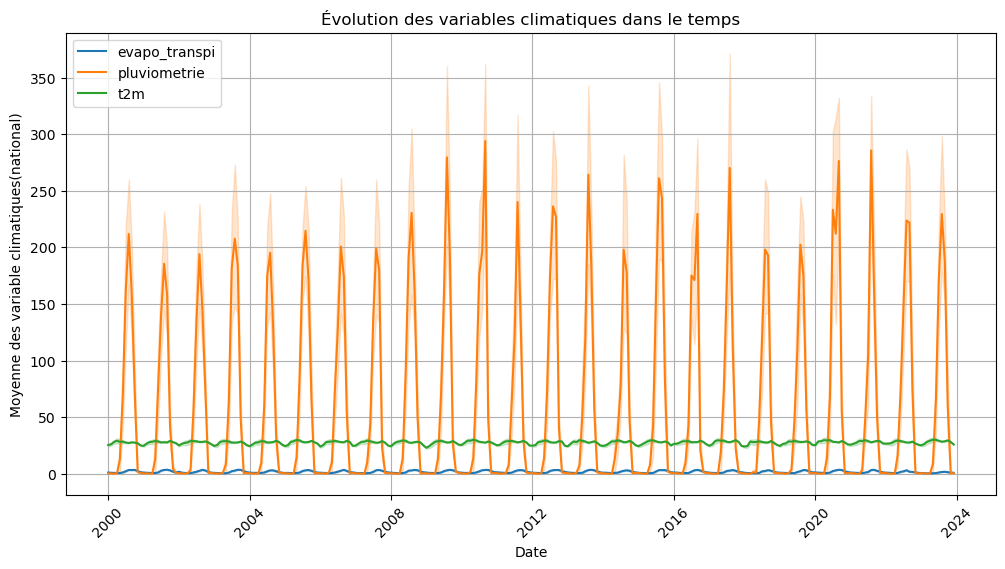

In [507]:
plt.figure(figsize=(12, 6))
for col in ['evapo_transpi', 'pluviometrie', 't2m']:
    sns.lineplot(x=df_meteo['date'], y=col, data=df_meteo, label=col)
plt.title("Évolution des variables climatiques dans le temps")
plt.xlabel("Date")
plt.ylabel("Moyenne des variable climatiques(national)")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()


Ces données fluctuent beaucoup!

### Modélisation SARIMA

#### Prix du Niébé 

In [508]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

###### Représentation graphique de l'ACF et du PACF du Niebe

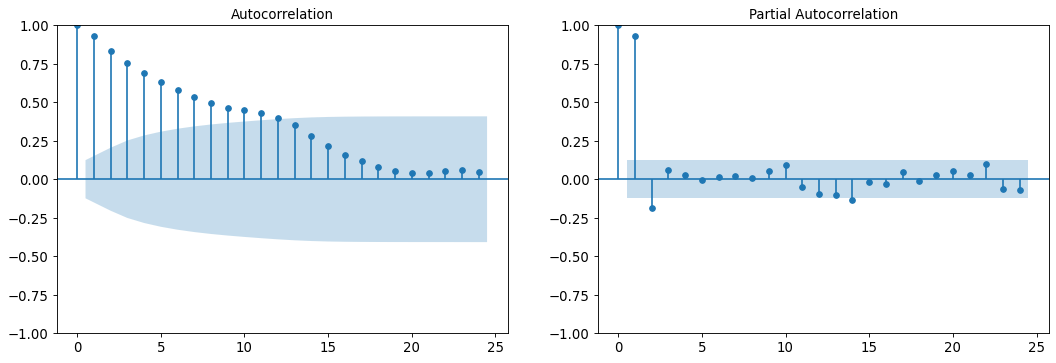

In [509]:
# Plot acf and pacf for niebe_det
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5), dpi=80)
plot_acf(data_prix['niebe_det'], ax=ax1)
plot_pacf(data_prix['niebe_det'], method='ywm', ax=ax2)
ax1.tick_params(axis='both', labelsize=12)
ax2.tick_params(axis='both', labelsize=12)
plt.show()

L'ACF de la série brute du niébé montre une décroissance et au niveau du PACF, un pic significatif au niveau du lag 2. Cela sous nous améne à penser à un processus AR(2). La décroissance au niveau de l'ACF indique une série non stationnaire.
Nous allons cependant faire un test de stationnarité.

##### Test de stationnarité

In [510]:
serie = data_prix['niebe_det'].dropna()
result = adfuller(serie)
print(f"ADF Statistic: {result[0]:.3f}")
print(f"p-value: {result[1]:.3f}")

ADF Statistic: -3.199
p-value: 0.020


La p-value est inférieur à 5%, la série du niebé est donc stationnaire. Nous allons estimer un AR(2)

##### Estimation

In [511]:
from statsmodels.tsa.arima.model import ARIMA

In [512]:
# Création du train et du test

In [513]:
# Série stationnaire
serie = data_prix['niebe_det']
# Ajustement du modèle AR(2)
model = ARIMA(serie, order=(2,0,0))
result = model.fit()

C:\Users\ombaye\AppData\Local\anaconda3\envs\tp1_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\ombaye\AppData\Local\anaconda3\envs\tp1_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\ombaye\AppData\Local\anaconda3\envs\tp1_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


In [514]:
# Résumé du modèle
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:              niebe_det   No. Observations:                  250
Model:                 ARIMA(2, 0, 0)   Log Likelihood               -1280.516
Date:                Tue, 28 Oct 2025   AIC                           2569.032
Time:                        00:54:23   BIC                           2583.118
Sample:                             0   HQIC                          2574.701
                                - 250                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        454.8064     38.932     11.682      0.000     378.501     531.112
ar.L1          1.2357      0.044     28.272      0.000       1.150       1.321
ar.L2         -0.2972      0.042     -7.158      0.0

Après ajustement, il est important de vérifier si les résidus ne présentent plus d’autocorrélation :

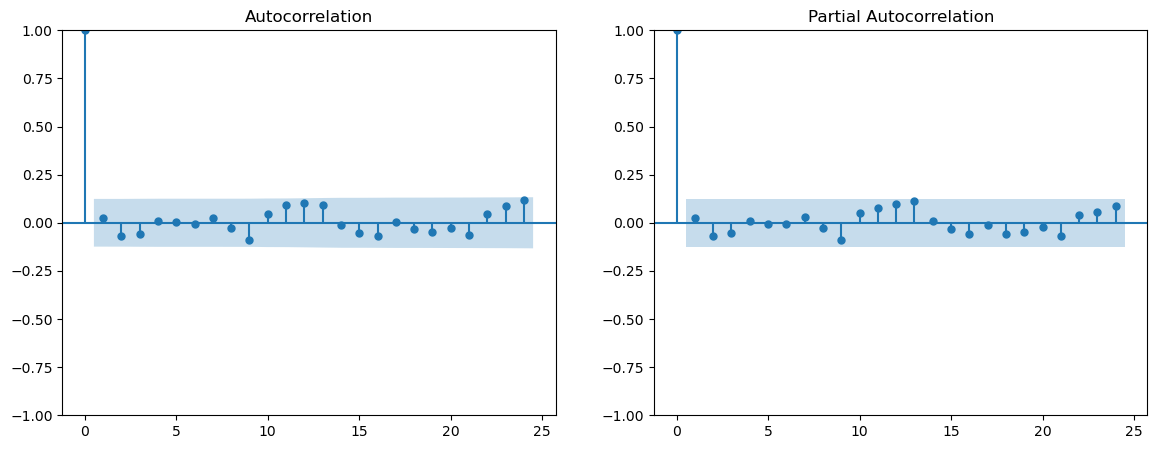

In [515]:
residuals = result.resid

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,5))
plot_acf(residuals, ax=ax1)
plot_pacf(residuals, ax=ax2)
plt.show()

##### Prévision

In [516]:
# Prévision sur 12 périodes à venir
forecast = result.get_forecast(steps=12)
pred_mean = forecast.predicted_mean
conf_int = forecast.conf_int()  # intervalle de confiance

# Création d’un index temporel cohérent
last_date = data_prix['date'].iloc[-1]
future_dates = pd.date_range(start=last_date, periods=12, freq='M')

# Combinaison dans un DataFrame
forecast_df = pd.DataFrame({
    'date': future_dates,
    'prévision': pred_mean.values,
    'borne_inf': conf_int.iloc[:, 0].values,
    'borne_sup': conf_int.iloc[:, 1].values
})

C:\Users\ombaye\AppData\Local\anaconda3\envs\tp1_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\ombaye\AppData\Local\anaconda3\envs\tp1_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\ombaye\AppData\Local\Temp\ipykernel_4636\2005160495.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=last_date, periods=12, freq='M')


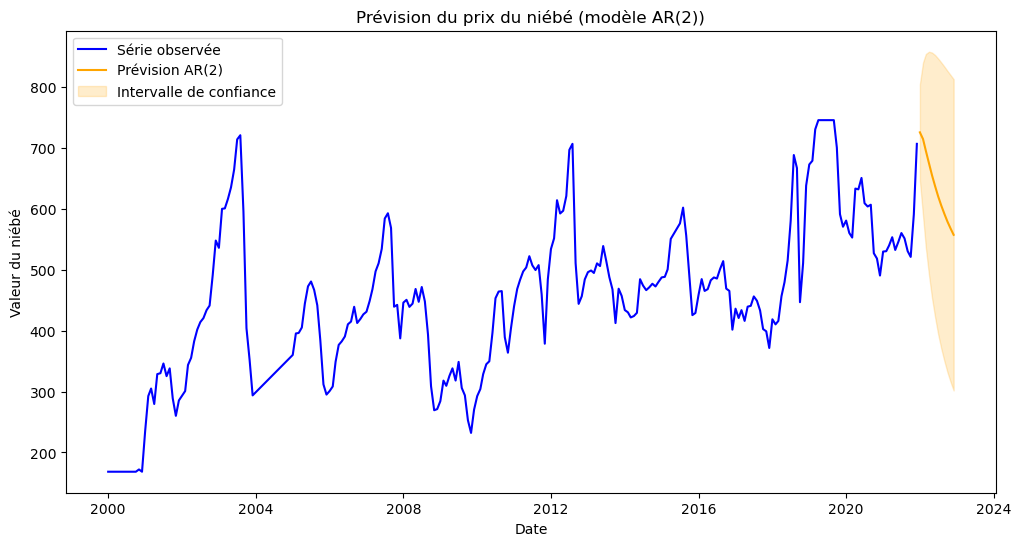

In [517]:
plt.figure(figsize=(12,6))
plt.plot(data_prix['date'], serie, label='Série observée', color='blue')
plt.plot(forecast_df['date'], forecast_df['prévision'], label='Prévision AR(2)', color='orange')
plt.fill_between(forecast_df['date'], 
                 forecast_df['borne_inf'], forecast_df['borne_sup'], 
                 color='orange', alpha=0.2, label='Intervalle de confiance')
plt.title("Prévision du prix du niébé (modèle AR(2))")
plt.xlabel("Date")
plt.ylabel("Valeur du niébé")
plt.legend()
plt.show()

#### Prix de l'arachide décortiqué

###### Représentation graphique de l'ACF et du PACF du Niebe

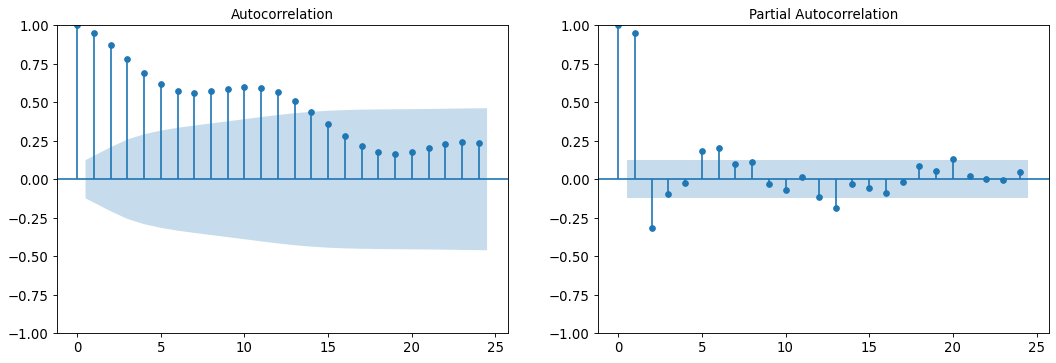

In [518]:
# Plot acf and pacf for niebe_det
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5), dpi=80)
plot_acf(data_prix['decort_det'], ax=ax1)
plot_pacf(data_prix['decort_det'], method='ywm', ax=ax2)
ax1.tick_params(axis='both', labelsize=12)
ax2.tick_params(axis='both', labelsize=12)
plt.show()

##### Test de stationnarité

In [519]:
serie = data_prix['decort_det'].dropna()
result = adfuller(serie)
print(f"ADF Statistic: {result[0]:.3f}")
print(f"p-value: {result[1]:.3f}")

ADF Statistic: -2.087
p-value: 0.250


La p-value est supérieur à 5% la série des prix de l'arachide décortiqué n'est pas stationnaire.

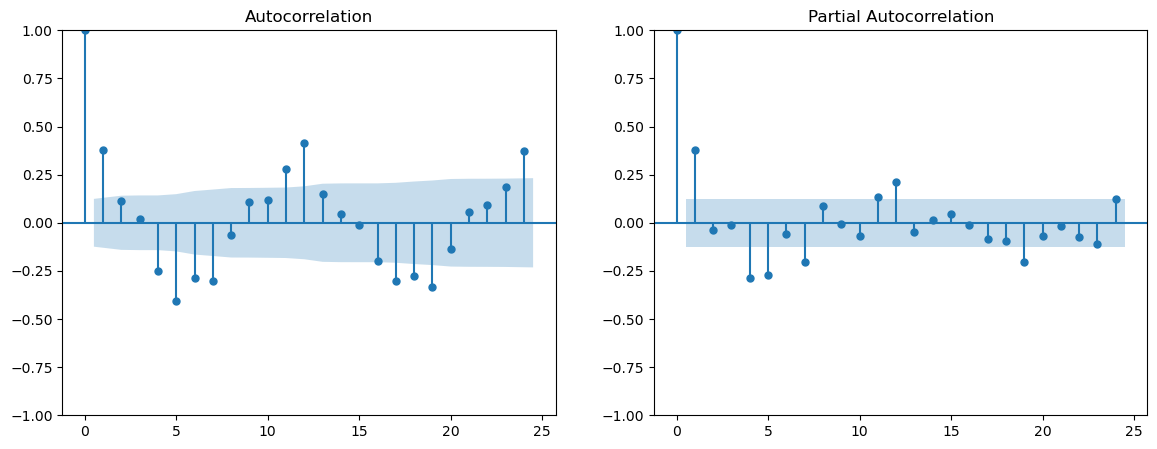

In [520]:
decort_diff = data_prix['decort_det'].diff().dropna()

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,5))
plot_acf(decort_diff, ax=ax1)
plot_pacf(decort_diff, ax=ax2, method='ywm')
plt.show()

In [521]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

##### Estimation

In [522]:
# Série
serie = data_prix['decort_det'].dropna()

# Modèle SARIMA
model = SARIMAX(serie, order=(1,1,0), seasonal_order=(1,0,0,12))
result = model.fit(disp=False)

print(result.summary())


                                     SARIMAX Results                                      
Dep. Variable:                         decort_det   No. Observations:                  250
Model:             SARIMAX(1, 1, 0)x(1, 0, 0, 12)   Log Likelihood               -1184.738
Date:                            Tue, 28 Oct 2025   AIC                           2375.477
Time:                                    00:54:24   BIC                           2386.029
Sample:                                         0   HQIC                          2379.724
                                            - 250                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3213      0.050      6.397      0.000       0.223       0.420
ar.S.L12       0.4043      0.067   

C:\Users\ombaye\AppData\Local\anaconda3\envs\tp1_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\ombaye\AppData\Local\anaconda3\envs\tp1_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


##### Prévision: Arachide décortiqué

In [523]:
# Prévision sur l'échantillon complet
forecast = result.get_forecast(steps=24)  # par exemple 24 mois
pred_mean = forecast.predicted_mean
conf_int = forecast.conf_int()


C:\Users\ombaye\AppData\Local\anaconda3\envs\tp1_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\ombaye\AppData\Local\anaconda3\envs\tp1_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


##### Représentation des prévision

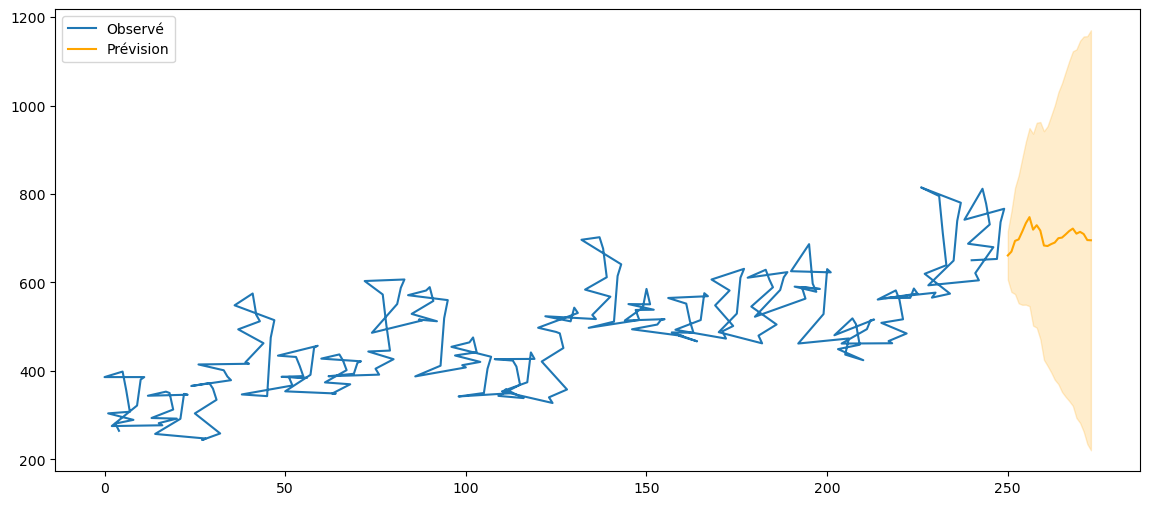

In [524]:
# Visualisation
plt.figure(figsize=(14,6))
plt.plot(serie.index, serie, label='Observé')
plt.plot(pred_mean.index, pred_mean, label='Prévision', color='orange')
plt.fill_between(conf_int.index, conf_int.iloc[:,0], conf_int.iloc[:,1], color='orange', alpha=0.2)
plt.legend()
plt.show()

### Modèle Gated Recurrent Unit

#### Traitement des données

Nous allons ici travailler avec les données par région, par année et par mois pour le **niébé** et l'**arachide décortiqué**

In [525]:
#Importation de la base de données contenant les informations sur l'arachide
data_ara = read_ods(Path(DATA_DIR, "bases_donneees_mil_mais_riz_arachide.ods"), sheet="arachide")
data_ara.head()

,REGION,DEPARTEMENT,MARCHE,DATE,DATE.1,mois_num,annee,mois_carac,NIEBE_QUANT,NIEBE_PROD,NIEBE_DET,NIEBE 1/2 G.,COQUE_QTE,COQUE_PROD,COQUE_DET,DECORT_QTE,DECORT_PROD,DECORT_DET
0,KL,NIORO,NDRAME ESCALE,1990-01-01T00:00:00,1.0,1.0,1990.0,janvier,0.07,NaN,125.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,LG,LOUGA,GOUILLE MBEUTH,1990-01-01T00:00:00,1.0,1.0,1990.0,janvier,0.50,55.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,TH,TIVAOUANE,THILMAKHA,1990-01-01T00:00:00,1.0,1.0,1990.0,janvier,13.00,NaN,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,DL,DIOURBEL,DIOURBEL,1990-01-02T00:00:00,1.0,2.0,1990.0,janvier,2.00,NaN,90.0,NaN,0.5,NaN,90.0,2.0,NaN,150.0
4,SL,DAGANA,DAGANA,1990-01-02T00:00:00,1.0,2.0,1990.0,janvier,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [526]:
#Restriction sur les années 2000 à 2023
data_ara = data_ara[(data_ara["annee"]>=2000) & (data_ara["annee"]<=2023)]

In [527]:
#Harmonisation du nom des colonnes pour la base de données de l'arachide
data_ara.columns = (
    data_ara.columns
    .str.strip()              # supprime les espaces début/fin
    .str.replace(" ", "_")    # remplace espaces par _
    .str.replace(".","")
    .str.replace("/","sur")
    .str.lower()              # met tout en minuscules
)
data_ara.head()

,region,departement,marche,date,date1,mois_num,annee,mois_carac,niebe_quant,niebe_prod,niebe_det,niebe_1sur2_g,coque_qte,coque_prod,coque_det,decort_qte,decort_prod,decort_det
14874,FK,GOSSAS,GOSSAS,2000-01-01T00:00:00,1.0,1.0,2000.0,janvier,0.5,65.0,70.0,NaN,2.9,110.0,115.0,NaN,250.0,260.0
14875,DL,DIOURBEL,NDINDY,2000-01-02T00:00:00,1.0,2.0,2000.0,janvier,0.3,NaN,85.0,NaN,0.8,NaN,115.0,NaN,280.0,290.0
14876,FK,FATICK,FATICK,2000-01-02T00:00:00,1.0,2.0,2000.0,janvier,2.0,50.0,60.0,NaN,15.0,130.0,135.0,NaN,NaN,225.0
14877,DL,BAMBEY,BAMBEY,2000-01-03T00:00:00,1.0,3.0,2000.0,janvier,15.0,NaN,50.0,NaN,NaN,NaN,NaN,NaN,NaN,300.0
14878,FK,GOSSAS,MBAR,2000-01-03T00:00:00,1.0,3.0,2000.0,janvier,1.0,NaN,70.0,NaN,5.0,NaN,135.0,NaN,NaN,275.0


In [528]:
data_ara.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33306 entries, 14874 to 48179
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   region         33306 non-null  object 
 1   departement    33306 non-null  object 
 2   marche         33306 non-null  object 
 3   date           33306 non-null  object 
 4   date1          33306 non-null  float64
 5   mois_num       33306 non-null  float64
 6   annee          33306 non-null  float64
 7   mois_carac     33306 non-null  object 
 8   niebe_quant    26835 non-null  float64
 9   niebe_prod     5535 non-null   float64
 10  niebe_det      26621 non-null  float64
 11  niebe_1sur2_g  9817 non-null   float64
 12  coque_qte      17710 non-null  float64
 13  coque_prod     7525 non-null   float64
 14  coque_det      17139 non-null  float64
 15  decort_qte     9880 non-null   float64
 16  decort_prod    9332 non-null   float64
 17  decort_det     31077 non-null  float64
dtypes: floa

In [529]:
#Nom des colonnes de la base sur l'arachide
data_ara.columns

Index(['region', 'departement', 'marche', 'date', 'date1', 'mois_num', 'annee',
       'mois_carac', 'niebe_quant', 'niebe_prod', 'niebe_det', 'niebe_1sur2_g',
       'coque_qte', 'coque_prod', 'coque_det', 'decort_qte', 'decort_prod',
       'decort_det'],
      dtype='object')

In [530]:
# Vérification de l'existance de région dont l'écriture n'est pas harmonisée
data_ara['region'].drop_duplicates().tolist()

['FK',
 'DL',
 'KL',
 'LG',
 'TH',
 'DK',
 'KD',
 'KF',
 'SL',
 'ZG',
 'TC',
 'MT',
 'SD',
 'KG',
 'KL ',
 'TC ',
 'TH ']

In [531]:
#Suppression des espaces
data_ara['region'] = data_ara['region'].str.replace(' ','')

In [532]:
#Vérification
data_ara['region'].drop_duplicates().tolist()

['FK',
 'DL',
 'KL',
 'LG',
 'TH',
 'DK',
 'KD',
 'KF',
 'SL',
 'ZG',
 'TC',
 'MT',
 'SD',
 'KG']

In [533]:
# Calcul des moyenne mensuelle par région
data_olea = data_ara[
    ['region', 'annee', 'mois_carac','date1', 'niebe_det', 'decort_det']
].groupby(['region', 'annee', 'mois_carac']).mean().reset_index()
data_olea

,region,annee,mois_carac,date1,niebe_det,decort_det
0,DK,2000.0,août,8.0,164.464286,373.333333
1,DK,2000.0,avril,4.0,165.555556,320.625000
2,DK,2000.0,décembre,12.0,143.750000,281.250000
3,DK,2000.0,février,2.0,151.875000,285.625000
4,DK,2000.0,janvier,1.0,149.750000,278.571429
...,...,...,...,...,...,...
3666,ZG,2023.0,mai,5.0,1266.666667,1433.333333
3667,ZG,2023.0,mars,3.0,1240.000000,1340.000000
3668,ZG,2023.0,novembre,11.0,1040.000000,1260.000000
3669,ZG,2023.0,octobre,10.0,1180.000000,1320.000000


In [534]:
data_olea['annee'] = data_olea['annee'].astype(int)
data_olea

,region,annee,mois_carac,date1,niebe_det,decort_det
0,DK,2000,août,8.0,164.464286,373.333333
1,DK,2000,avril,4.0,165.555556,320.625000
2,DK,2000,décembre,12.0,143.750000,281.250000
3,DK,2000,février,2.0,151.875000,285.625000
4,DK,2000,janvier,1.0,149.750000,278.571429
...,...,...,...,...,...,...
3666,ZG,2023,mai,5.0,1266.666667,1433.333333
3667,ZG,2023,mars,3.0,1240.000000,1340.000000
3668,ZG,2023,novembre,11.0,1040.000000,1260.000000
3669,ZG,2023,octobre,10.0,1180.000000,1320.000000


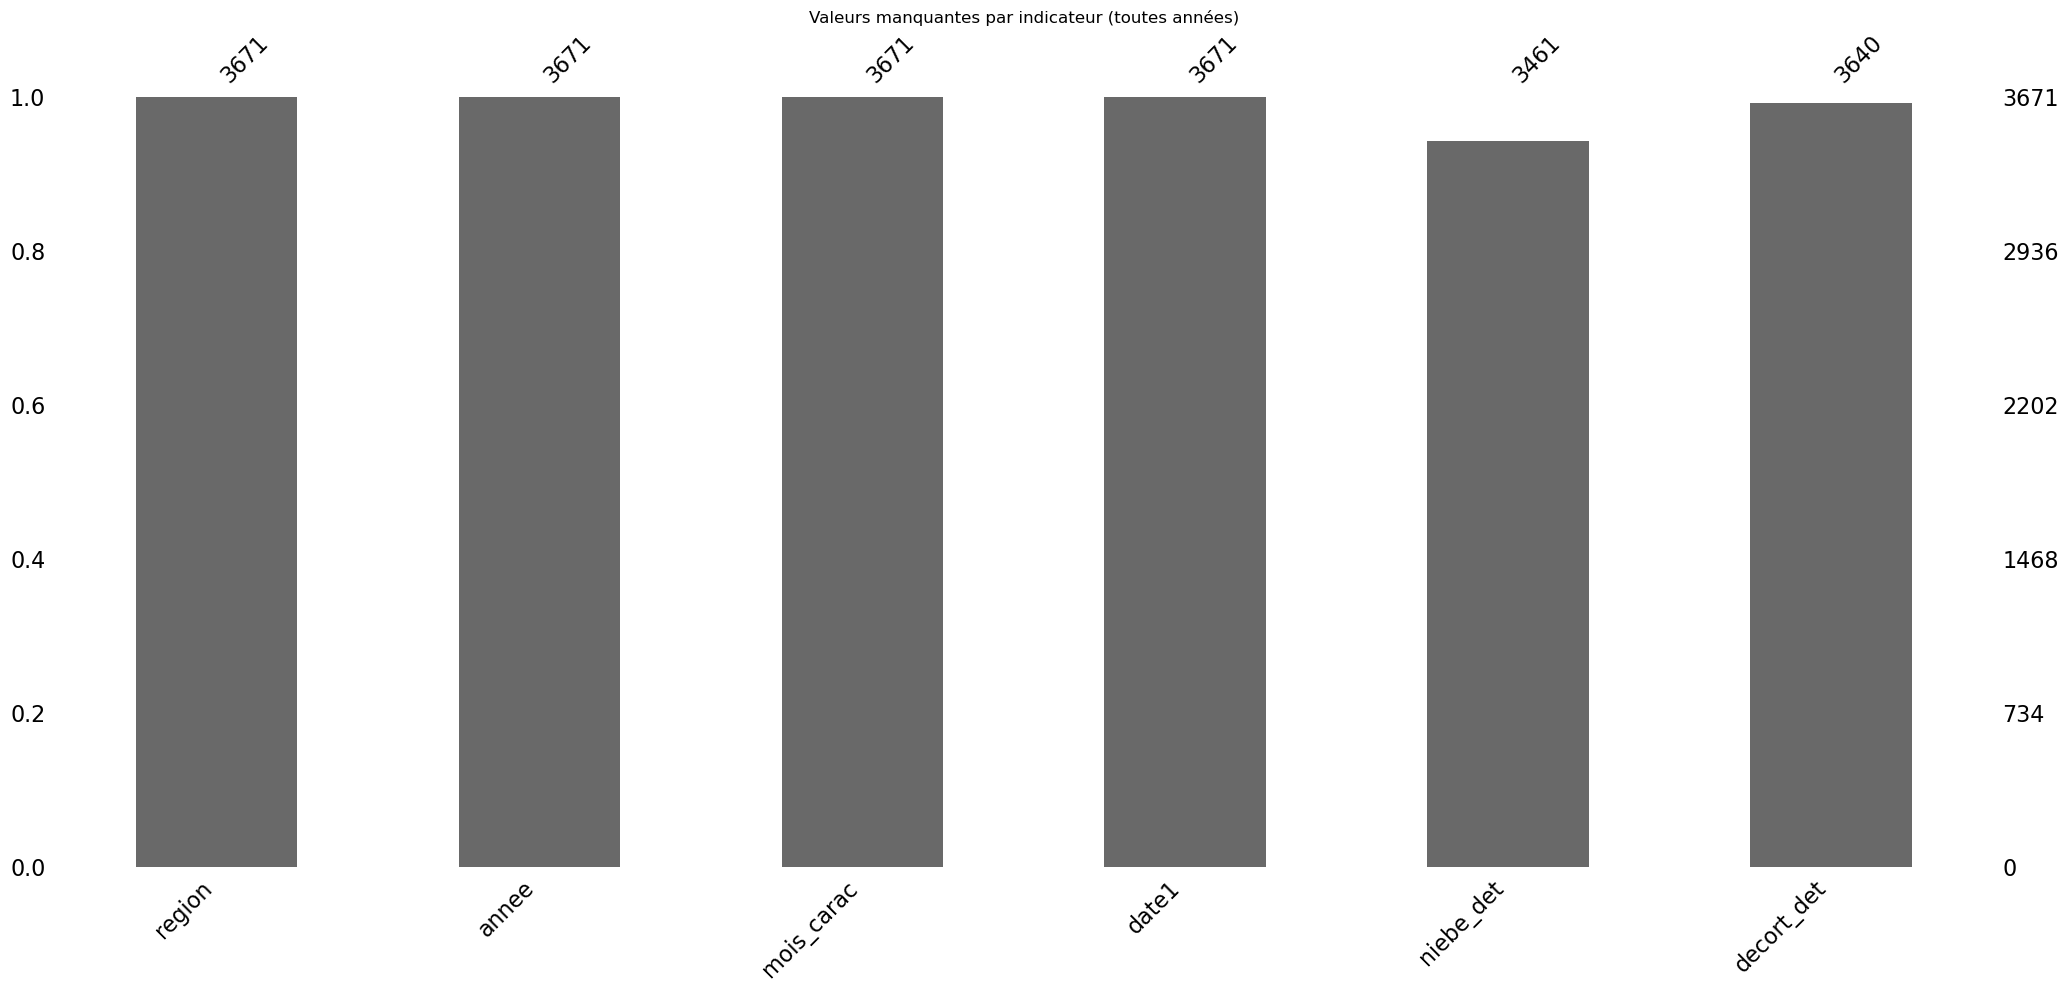

In [535]:
# Niébé et arachide décortiqué
plt.figure(figsize=(10,6))
msno.bar(data_olea)
plt.title("Valeurs manquantes par indicateur (toutes années)")
plt.show()

In [536]:
data_olea.isna().sum()

region          0
annee           0
mois_carac      0
date1           0
niebe_det     210
decort_det     31
dtype: int64

Nous menons ici une imputation par la médiane

In [537]:
# Imputation par la médiane régionale pour les variables sélectionnées
for x in ['niebe_det', 'decort_det']:
    data_olea.loc[:, x] = (
        data_olea.groupby('region', group_keys=False)[x]
        .transform(lambda s: s.fillna(s.median()))
    )

In [538]:
data_olea.isna().sum()

region        0
annee         0
mois_carac    0
date1         0
niebe_det     0
decort_det    0
dtype: int64

In [539]:
#Dictionnaire pour les régions
dict_reg = {'DK':1,
           'DL':2,
           'FK':3,
           'KD':4,
           'KF':5,
           'KG':6,
           'KL':7,
           'LG':8,
            'MT':9,
            'SD':10,
            'SL':11,
            'TC':12,
            'TH':13,
            'ZG':14
}
#Dictionnaire pour les moi
dict_mois = {'janvier':1,
            'février':2,
            'mars':3,
            'avril':4,
            'mai':5,
            'juin':6,
            'juillet':7,
            'août':8,
            'septembre':9,
            'octobre':10,
            'novembre':11,
            'décembre':12}


In [540]:
# Attribution pour chaque région d'un code à travers une nouvelle variable
data_olea['code_reg']=data_olea['region'].map(dict_reg)
data_olea['code_mois']=data_olea['mois_carac'].map(dict_mois)
# Atribution pour chaque mois d'un code à traver d'une nouvelle variable
data_olea

,region,annee,mois_carac,date1,niebe_det,decort_det,code_reg,code_mois
0,DK,2000,août,8.0,164.464286,373.333333,1,8
1,DK,2000,avril,4.0,165.555556,320.625000,1,4
2,DK,2000,décembre,12.0,143.750000,281.250000,1,12
3,DK,2000,février,2.0,151.875000,285.625000,1,2
4,DK,2000,janvier,1.0,149.750000,278.571429,1,1
...,...,...,...,...,...,...,...,...
3666,ZG,2023,mai,5.0,1266.666667,1433.333333,14,5
3667,ZG,2023,mars,3.0,1240.000000,1340.000000,14,3
3668,ZG,2023,novembre,11.0,1040.000000,1260.000000,14,11
3669,ZG,2023,octobre,10.0,1180.000000,1320.000000,14,10


In [541]:
# ✅ Création d'un code unique bien formaté pour data_leg
data_olea['id'] = (
    data_olea['code_reg'].astype(str) + '_' +
    data_olea['annee'].astype(str) + '_' +
    data_olea['code_mois'].astype(str).str.zfill(2)  # Mois toujours sur 2 chiffres
)

data_olea.head()

,region,annee,mois_carac,date1,niebe_det,decort_det,code_reg,code_mois,id
0,DK,2000,août,8.0,164.464286,373.333333,1,8,1_2000_08
1,DK,2000,avril,4.0,165.555556,320.625000,1,4,1_2000_04
2,DK,2000,décembre,12.0,143.750000,281.250000,1,12,1_2000_12
3,DK,2000,février,2.0,151.875000,285.625000,1,2,1_2000_02
4,DK,2000,janvier,1.0,149.750000,278.571429,1,1,1_2000_01


In [542]:
# Créer la colonne 'date' avec le jour fixé à 1
data_olea['date'] = pd.to_datetime({
    'year': data_olea['annee'],
    'month': data_olea['code_mois'],
    'day': 1
})
data_olea

,region,annee,mois_carac,date1,niebe_det,decort_det,code_reg,code_mois,id,date
0,DK,2000,août,8.0,164.464286,373.333333,1,8,1_2000_08,2000-08-01
1,DK,2000,avril,4.0,165.555556,320.625000,1,4,1_2000_04,2000-04-01
2,DK,2000,décembre,12.0,143.750000,281.250000,1,12,1_2000_12,2000-12-01
3,DK,2000,février,2.0,151.875000,285.625000,1,2,1_2000_02,2000-02-01
4,DK,2000,janvier,1.0,149.750000,278.571429,1,1,1_2000_01,2000-01-01
...,...,...,...,...,...,...,...,...,...,...
3666,ZG,2023,mai,5.0,1266.666667,1433.333333,14,5,14_2023_05,2023-05-01
3667,ZG,2023,mars,3.0,1240.000000,1340.000000,14,3,14_2023_03,2023-03-01
3668,ZG,2023,novembre,11.0,1040.000000,1260.000000,14,11,14_2023_11,2023-11-01
3669,ZG,2023,octobre,10.0,1180.000000,1320.000000,14,10,14_2023_10,2023-10-01


In [543]:
#data_olea = data_olea.sort_values(by=['region','date'])
data_olea

,region,annee,mois_carac,date1,niebe_det,decort_det,code_reg,code_mois,id,date
0,DK,2000,août,8.0,164.464286,373.333333,1,8,1_2000_08,2000-08-01
1,DK,2000,avril,4.0,165.555556,320.625000,1,4,1_2000_04,2000-04-01
2,DK,2000,décembre,12.0,143.750000,281.250000,1,12,1_2000_12,2000-12-01
3,DK,2000,février,2.0,151.875000,285.625000,1,2,1_2000_02,2000-02-01
4,DK,2000,janvier,1.0,149.750000,278.571429,1,1,1_2000_01,2000-01-01
...,...,...,...,...,...,...,...,...,...,...
3666,ZG,2023,mai,5.0,1266.666667,1433.333333,14,5,14_2023_05,2023-05-01
3667,ZG,2023,mars,3.0,1240.000000,1340.000000,14,3,14_2023_03,2023-03-01
3668,ZG,2023,novembre,11.0,1040.000000,1260.000000,14,11,14_2023_11,2023-11-01
3669,ZG,2023,octobre,10.0,1180.000000,1320.000000,14,10,14_2023_10,2023-10-01


In [544]:
# --- Fusion progressive des bases ---
df_final = (
    data_olea
    .merge(
        df_meteo[['id', 'pluviometrie', 't2m', 'evapo_transpi']], 
        on='id', 
        how='inner'  # ou 'left' selon ta stratégie de jointure
    )
)

# --- Vérification rapide ---
print(df_final.shape)
print(df_final.columns)
df_final.head()


(3671, 13)
Index(['region', 'annee', 'mois_carac', 'date1', 'niebe_det', 'decort_det',
       'code_reg', 'code_mois', 'id', 'date', 'pluviometrie', 't2m',
       'evapo_transpi'],
      dtype='object')


,region,annee,mois_carac,date1,niebe_det,decort_det,code_reg,code_mois,id,date,pluviometrie,t2m,evapo_transpi
0,DK,2000,août,8.0,164.464286,373.333333,1,8,1_2000_08,2000-08-01,83.0,27.287994,3.114827
1,DK,2000,avril,4.0,165.555556,320.625000,1,4,1_2000_04,2000-04-01,0.0,21.808502,2.540153
2,DK,2000,décembre,12.0,143.750000,281.250000,1,12,1_2000_12,2000-12-01,0.0,23.478424,4.895035
3,DK,2000,février,2.0,151.875000,285.625000,1,2,1_2000_02,2000-02-01,0.0,20.893707,2.973322
4,DK,2000,janvier,1.0,149.750000,278.571429,1,1,1_2000_01,2000-01-01,0.0,20.779694,3.909670


##### Détection et imputation des valeurs aberrantes

In [545]:
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import ipywidgets as widgets
from IPython.display import display, clear_output

In [546]:
# Fonction pour mettre à jour et afficher le boxplot
def update_plot(variable):
    clear_output(wait=True)
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=df_final[variable], color='skyblue', x=data_olea['region'])
    plt.title(f'Boxplot de {variable}')
    plt.ylabel('Valeurs')
    plt.show()

# Créer un widget Dropdown
dropdown = widgets.Dropdown(
    options=list(df_final.keys()),
    value='niebe_det',
    description='Variable:',
    style={'description_width': 'initial'}
)

# Lier le widget à la fonction de mise à jourc
interactive_plot = widgets.interactive(update_plot, variable=dropdown)

# Afficher le widget
display(interactive_plot)

interactive(children=(Dropdown(description='Variable:', index=4, options=('region', 'annee', 'mois_carac', 'da…

#### Imputation des valeurs aberrantes

In [547]:
import numpy as np
import pandas as pd

def traiter_outliers(df, col, z_threshold=2.5, percentiles=[1, 99], min_valid=5, exclude_zeros=True):
    """
    Gérer les valeurs aberrantes dans une colonne d'un DataFrame en utilisant la méthode de l'écart absolu médian (MAD).
    
    Paramètres :
    - df : DataFrame pandas
    - col : nom de la colonne à traiter (doit être numérique)
    - z_threshold : seuil de Z-score pour la détection des valeurs aberrantes (par défaut : 2.5)
    - percentiles : percentiles pour remplacer les valeurs aberrantes [inférieur, supérieur] (par défaut : [1, 99])
    - min_valid : nombre minimum de valeurs valides requis (par défaut : 5)
    - exclude_zeros : exclure les valeurs zéro du calcul des percentiles (par défaut : True)
    
    Retourne :
    - DataFrame modifié (copie) avec les valeurs aberrantes remplacées
    """
    if col not in df.columns:
        raise ValueError(f"La colonne '{col}' n'existe pas dans le DataFrame")
    if not np.issubdtype(df[col].dtype, np.number):
        raise ValueError(f"La colonne '{col}' doit être numérique")
    
    df = df.copy()  # Éviter de modifier le DataFrame d'entrée
    if df[col].notna().sum() <= min_valid:
        return df
    
    x = df[col]
    median = np.median(x)
    mad = np.median(np.abs(x - median))
    
    if mad == 0:
        return df
    
    zscore_median = 0.6745 * (x - median) / mad
    outliers_bottom = zscore_median < -z_threshold
    outliers_top = zscore_median > z_threshold
    valid = (~outliers_bottom) & (~outliers_top)
    if exclude_zeros:
        valid = valid & (x != 0)
    
    if valid.sum() < min_valid:
        return df
    
    p_low, p_high = np.percentile(x[valid], percentiles)
    df.loc[outliers_bottom, col] = p_low
    df.loc[outliers_top, col] = p_high
    return df

# Liste des colonnes à traiter
col = ['niebe_det', 'decort_det', 't2m', 'evapo_transpi','pluviometrie']

# Modalités valides pour la colonne 'region'
valid_regions = ['DK', 'DL', 'FK', 'KD', 'KF', 'KG', 'KL', 'LG', 'MT', 'SD', 'SL', 'TC', 'TH', 'ZG']

# Exemple d'utilisation avec un DataFrame
try:
    # Vérifier que toutes les valeurs de 'region' sont valides
    if not df_final['region'].isin(valid_regions).all():
        invalid_regions = df_final['region'][~df_final['region'].isin(valid_regions)].unique()
        raise ValueError(f"Valeurs invalides dans la colonne 'region' : {invalid_regions}")
    
    # Traiter les colonnes
    for v in col:
        df_final = df_final.groupby('region', group_keys=False).apply(
            lambda g: traiter_outliers(g, v, z_threshold=2.5, percentiles=[1, 99])
        )
        print(f"{v} traité.")
except KeyError as e:
    print(f"Erreur : {e}. Assurez-vous que 'region' et toutes les colonnes de 'col' existent dans le DataFrame.")
except ValueError as e:
    print(f"Erreur : {e}")
except Exception as e:
    print(f"Une erreur s'est produite : {e}")

niebe_det traité.
decort_det traité.
t2m traité.
evapo_transpi traité.
pluviometrie traité.


C:\Users\ombaye\AppData\Local\Temp\ipykernel_4636\3478094564.py:65: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_final = df_final.groupby('region', group_keys=False).apply(
C:\Users\ombaye\AppData\Local\Temp\ipykernel_4636\3478094564.py:65: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_final = df_final.groupby('region', group_keys=False).apply(
C:\Users\ombaye\AppData\Local\Temp\ipykernel_4636\3478094564.py:65

##### Visualisation aprés traiement

In [548]:
# Fonction pour mettre à jour et afficher le boxplot
def update_plot(variable):
    clear_output(wait=True)
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=df_final[variable], color='skyblue', x=df_final['region'])
    plt.title(f'Boxplot de {variable}')
    plt.ylabel('Valeurs')
    plt.show()

# Créer un widget Dropdown
dropdown = widgets.Dropdown(
    options=list(df_final.keys()),
    value='niebe_det',
    description='Variable:',
    style={'description_width': 'initial'}
)

# Lier le widget à la fonction de mise à jour
interactive_plot = widgets.interactive(update_plot, variable=dropdown)

# Afficher le widget
display(interactive_plot)

interactive(children=(Dropdown(description='Variable:', index=4, options=('region', 'annee', 'mois_carac', 'da…

#### Désaisonnalisation des séries

##### Représentation avant désaisonnalisation

In [549]:
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from ipywidgets import interact

In [550]:
# Variables à tracer
variables = ['niebe_det', 'decort_det', 't2m', 'evapo_transpi','pluviometrie']

# Régions
regions = df_final['region'].unique().tolist()

# Fonction pour tracer 14 sous-graphes
def plot_variable(variable):
    fig, axes = plt.subplots(4, 4, figsize=(20,15), dpi=100)
    axes = axes.flatten()
    
    for i, region in enumerate(regions):
        ax = axes[i]
        subset = df_final[df_final['region'] == region]
        sns.lineplot(data=subset, x='date', y=variable, marker='o', ax=ax)
        ax.set_title(region)
        ax.set_xlabel("Date")
        ax.set_ylabel(variable)
        ax.grid(True)
    
    # Supprimer les axes vides si moins de 16 régions
    for j in range(len(regions), len(axes)):
        fig.delaxes(axes[j])
    
    plt.suptitle(f"Évolution de {variable} par région", fontsize=18)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Dropdown interactif
interact(plot_variable,
         variable=widgets.Dropdown(options=variables, description='Spéculation:'));


interactive(children=(Dropdown(description='Spéculation:', options=('niebe_det', 'decort_det', 't2m', 'evapo_t…

##### Désaisonnalisation des séries

In [551]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

In [552]:
df_final = df_final.sort_values(by=['region','date'])

In [553]:
# --- Variables et régions ---
variables = ['niebe_det', 'decort_det', 't2m', 'evapo_transpi','pluviometrie']
regions = ['DK', 'DL', 'FK', 'KD', 'KF', 'KG', 'KL', 'LG','MT', 'SD', 'SL', 'TC', 'TH', 'ZG']
# --- Liste pour stocker les résultats ---
list_data = []
# --- Boucle sur chaque région ---
for region in regions:
    data_region = df_final[df_final["region"] == region]
    #data_region = data_region.sort_values(by="date")
    print(f"\n{'='*70}")
    print(f"Région : {region}")
    print(f"{'='*70}")
    # --- Boucle sur chaque variable ---
    for var in variables:
        print(f"\n>>> Variable : {var}")
        serie = data_region[var].dropna()
        if len(serie) < 12:
            print("Série trop courte → ignorée.")
            data_region[f"{var}_desais"] = np.nan
            continue
        # --- Étape 1 : Table de Buys-Ballot (groupement par région et année) ---
        bb_table = (
            df_final[df_final["region"] == region]
            .groupby(["region", "annee"])[var]
            .agg(["mean", "std"])
            .reset_index()
            .rename(columns={"mean": "moyenne", "std": "ecart_type"})
        )
        bb_table = bb_table.dropna(subset=["moyenne", "ecart_type"])
        if (bb_table["ecart_type"] == 0).all() or len(bb_table) < 3:
            print("Écart-type nul ou pas assez d’années → modèle additif par défaut.")
            modele = "additive"
        else:
            # --- Étape 2 : Régression OLS ---
            X = sm.add_constant(bb_table["moyenne"])
            y = bb_table["ecart_type"]
            model = sm.OLS(y, X).fit()
            coef = model.params[1]
            p_value = model.pvalues[1]
            # --- Étape 3 : Choix du modèle ---
            if p_value > 0.05:
                modele = "additive"
                interpretation = "Coefficient non significatif → modèle additif"
            else:
                modele = "multiplicative"
                interpretation = "Coefficient significatif → modèle multiplicatif"
            print(f"Pente = {coef:.3f}, p-value = {p_value:.4f} → {interpretation}")
         # --- Étape 4 : Désaisonnalisation ---
        try:
            result = seasonal_decompose(
                data_region[var], model=modele, period=12, extrapolate_trend='freq'
            )
            if modele == "additive":
                data_region[f"{var}_desais"] = data_region[var] - result.seasonal
            else:
                data_region[f"{var}_desais"] = data_region[var] / result.seasonal
            
            print(f"Série désaisonnalisée ({modele}) créée : {var}_desais ✅")
        except Exception as e:
            print(f"Erreur désaisonnalisation {var} ({region}) : {e}")
            data_region[f"{var}_desais"] = np.nan
    # Ajouter la région désaisonnalisée à la liste
    list_data.append(data_region)
# --- Concaténer toutes les régions ---
df_final_des = pd.concat(list_data, ignore_index=True)
print("\n✅ Toutes les régions et variables ont été traitées.")
print(data_olea_desais.head())


Région : DK

>>> Variable : niebe_det
Pente = 0.014, p-value = 0.7834 → Coefficient non significatif → modèle additif
Série désaisonnalisée (additive) créée : niebe_det_desais ✅

>>> Variable : decort_det
Pente = 0.014, p-value = 0.7658 → Coefficient non significatif → modèle additif
Série désaisonnalisée (additive) créée : decort_det_desais ✅

>>> Variable : t2m
Pente = -0.086, p-value = 0.4817 → Coefficient non significatif → modèle additif
Série désaisonnalisée (additive) créée : t2m_desais ✅

>>> Variable : evapo_transpi
Pente = 0.239, p-value = 0.1655 → Coefficient non significatif → modèle additif
Série désaisonnalisée (additive) créée : evapo_transpi_desais ✅

>>> Variable : pluviometrie
Pente = 1.857, p-value = 0.0000 → Coefficient significatif → modèle multiplicatif
Erreur désaisonnalisation pluviometrie (DK) : Multiplicative seasonality is not appropriate for zero and negative values

Région : DL

>>> Variable : niebe_det
Pente = 0.053, p-value = 0.4183 → Coefficient non sig

C:\Users\ombaye\AppData\Local\Temp\ipykernel_4636\2167316385.py:38: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  coef = model.params[1]
C:\Users\ombaye\AppData\Local\Temp\ipykernel_4636\2167316385.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = model.pvalues[1]
C:\Users\ombaye\AppData\Local\Temp\ipykernel_4636\2167316385.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-vers

Pente = 0.028, p-value = 0.7403 → Coefficient non significatif → modèle additif
Série désaisonnalisée (additive) créée : niebe_det_desais ✅

>>> Variable : decort_det
Pente = 0.085, p-value = 0.1383 → Coefficient non significatif → modèle additif
Série désaisonnalisée (additive) créée : decort_det_desais ✅

>>> Variable : t2m
Pente = 0.123, p-value = 0.4253 → Coefficient non significatif → modèle additif
Série désaisonnalisée (additive) créée : t2m_desais ✅

>>> Variable : evapo_transpi
Pente = 0.229, p-value = 0.1217 → Coefficient non significatif → modèle additif
Série désaisonnalisée (additive) créée : evapo_transpi_desais ✅

>>> Variable : pluviometrie
Pente = -0.207, p-value = 0.0423 → Coefficient significatif → modèle multiplicatif
Erreur désaisonnalisation pluviometrie (KF) : Multiplicative seasonality is not appropriate for zero and negative values

Région : KG

>>> Variable : niebe_det
Pente = -0.036, p-value = 0.5731 → Coefficient non significatif → modèle additif
Série désai

C:\Users\ombaye\AppData\Local\Temp\ipykernel_4636\2167316385.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_region[f"{var}_desais"] = data_region[var] - result.seasonal
C:\Users\ombaye\AppData\Local\Temp\ipykernel_4636\2167316385.py:38: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  coef = model.params[1]
C:\Users\ombaye\AppData\Local\Temp\ipykernel_4636\2167316385.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To

Pente = -0.037, p-value = 0.3755 → Coefficient non significatif → modèle additif
Série désaisonnalisée (additive) créée : decort_det_desais ✅

>>> Variable : t2m
Pente = -0.012, p-value = 0.9459 → Coefficient non significatif → modèle additif
Série désaisonnalisée (additive) créée : t2m_desais ✅

>>> Variable : evapo_transpi
Pente = 0.581, p-value = 0.0000 → Coefficient significatif → modèle multiplicatif
Série désaisonnalisée (multiplicative) créée : evapo_transpi_desais ✅

>>> Variable : pluviometrie
Pente = 0.788, p-value = 0.0000 → Coefficient significatif → modèle multiplicatif
Erreur désaisonnalisation pluviometrie (SD) : Multiplicative seasonality is not appropriate for zero and negative values

Région : SL

>>> Variable : niebe_det
Pente = -0.049, p-value = 0.4128 → Coefficient non significatif → modèle additif
Série désaisonnalisée (additive) créée : niebe_det_desais ✅

>>> Variable : decort_det
Pente = -0.001, p-value = 0.9705 → Coefficient non significatif → modèle additif
S

NameError: name 'data_olea_desais' is not defined

##### Représentation des séries désaisonnalisés

In [ ]:
df_final_des

In [ ]:
# Variables à tracer
variables = ['niebe_det_desais', 'decort_det_desai', 't2m_desai', 'evapo_transpi_desai','pluviometrie_desai']

# Régions
regions = df_final_des['region'].unique().tolist()

# Fonction pour tracer 14 sous-graphes
def plot_variable(variable):
    fig, axes = plt.subplots(4, 4, figsize=(20,15), dpi=100)
    axes = axes.flatten()
    
    for i, region in enumerate(regions):
        ax = axes[i]
        subset = df_final_des[df_final_des['region'] == region]
        sns.lineplot(data=subset, x='date', y=variable, marker='o', ax=ax)
        ax.set_title(region)
        ax.set_xlabel("Date")
        ax.set_ylabel(variable)
        ax.grid(True)
    
    # Supprimer les axes vides si moins de 16 régions
    for j in range(len(regions), len(axes)):
        fig.delaxes(axes[j])
    
    plt.suptitle(f"Évolution de {variable} par région", fontsize=18)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Dropdown interactif
interact(plot_variable,
         variable=widgets.Dropdown(options=variables, description='Spéculation:'));

#### Test de stationnarité

**Test ADF**

Le test ADF est utilisé pour déterminer la présence de la racine unitaire dans la série, et aide donc à comprendre si la série est stationnaire ou non. Les hypothèses nulle et alternative de ce test sont les suivantes :

Hypothèse nulle : La série a une racine unitaire.

Hypothèse alternative : La série n’a pas de racine unitaire.

Si l’hypothèse nulle n’a pas été rejetée, ce test peut fournir la preuve que la série n’est pas stationnaire.

In [ ]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

In [ ]:
# --- 1. Fonction pour le test de Dickey-Fuller augmenté ---
def adf_test(timeseries):
    """Renvoie les résultats complets du test ADF sous forme de dictionnaire."""
    result = adfuller(timeseries.dropna(), autolag='AIC')
    return {
        "Test Statistic": result[0],
        "p-value": result[1],
        "Lags Used": result[2],
        "Observations": result[3],
        "Critical Value (1%)": result[4]["1%"],
        "Critical Value (5%)": result[4]["5%"],
        "Critical Value (10%)": result[4]["10%"],
        "Stationnaire": result[1] < 0.05
    }

In [ ]:
df_final_des = df_final_des.sort_values(by=['region', 'date'])

In [ ]:
# --- 3. Initialisation d'une liste pour stocker les résultats ---
results = []
vars_to_test=['niebe_det_desais', 'decort_det_desais', 't2m_desais', 'evapo_transpi_desais','pluviometrie_desais']
# --- 4. Boucle principale ---
for reg in regions:
    data_reg = df_final_des[df_final_des['region'] == reg].copy()  # filtrage par région
    for var in vars_to_test:
        serie = data_reg[var]
        if serie.isnull().all():
            continue  # ignorer si la série est vide        
        # Test de stationnarité
        res_adf = adf_test(serie)
        diff_var_name = f"{var}_diff"        
        # Différenciation systématique (quelle que soit la stationnarité)
        if len(serie) > 1:
            df_final_des.loc[df_final_des['region'] == reg, diff_var_name] = serie.diff()
            statut = "Différenciée (stationnaire)" if res_adf["Stationnaire"] else "Différenciée (non stationnaire)"
        else:
            statut = "Non différenciée (série trop courte)"        
        # Sauvegarde des résultats
        res_adf.update({
            "region": reg,
            "variable": var,
            "statut": statut
        })
        results.append(res_adf)

In [ ]:
# --- 5. Résumé des résultats sous forme de tableau ---
adf_results = pd.DataFrame(results)
print("\n📊 Résultats détaillés du test ADF :")
print(adf_results[['region', 'variable', 'p-value', 'statut']])
# --- 6. Résumé global ---
print("\nRésumé par région :")
print(adf_results.groupby('region')['statut'].value_counts())

In [ ]:
df_final_des

In [ ]:
df_final_des = df_final_des[df_final_des['region']!='DK']
df_final_des

In [ ]:
data_gru  = df_final_des.sort_values('date').dropna()
data_gru

##### Visualisation des séries différencié

In [178]:
# Variables à tracer
variables = ['niebe_det_desais_diff', 'decort_det_desais_diff', 't2m_desais_diff', 'pluviometrie_desais_diff', 'evapo_transpi_desais_diff']

# Régions
regions = data_gru['region'].unique().tolist()

# Fonction pour tracer 14 sous-graphes
def plot_variable(variable):
    fig, axes = plt.subplots(4, 4, figsize=(20,15), dpi=100)
    axes = axes.flatten()
    
    for i, region in enumerate(regions):
        ax = axes[i]
        subset = data_gru[data_gru['region'] == region]
        sns.lineplot(data=subset, x='date', y=variable, marker='o', ax=ax)
        ax.set_title(region)
        ax.set_xlabel("Date")
        ax.set_ylabel(variable)
        ax.grid(True)
    
    # Supprimer les axes vides si moins de 16 régions
    for j in range(len(regions), len(axes)):
        fig.delaxes(axes[j])
    
    plt.suptitle(f"Évolution de {variable} par région", fontsize=18)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Dropdown interactif
interact(plot_variable,
         variable=widgets.Dropdown(options=variables, description='Spéculation:'));

interactive(children=(Dropdown(description='Spéculation:', options=('niebe_det_desais_diff', 'decort_det_desai…

#### Train, test, validation, spli 

In [623]:
from keras.models import Model, Sequential
from keras.layers import GRU, Dense
from keras.callbacks import EarlyStopping 
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

In [669]:
# Définir les bornes temporelles
train_start, train_end = '2000-01-01', '2019-12-01'
val_start, val_end     = '2020-01-01', '2021-12-01'
test_start, test_end   = '2022-01-01', '2023-12-01'

In [670]:
# Créer la colonne dataset directement selon les bornes
data_gru['dataset'] = pd.NA
data_gru.loc[(data_gru['date'] >= train_start) & (data_gru['date'] <= train_end), 'dataset'] = 'train'
data_gru.loc[(data_gru['date'] >= val_start) & (data_gru['date'] <= val_end), 'dataset'] = 'validation'
data_gru.loc[(data_gru['date'] >= test_start) & (data_gru['date'] <= test_end), 'dataset'] = 'test'
# Vérification
print(data_gru['dataset'].value_counts())
print(data_gru[['region', 'date', 'dataset']].head(5))

dataset
train         1715
test           192
validation     189
Name: count, dtype: int64
     region       date dataset
272      DL 2000-02-01   train
531      FK 2000-02-01   train
3131     TH 2000-02-01   train
2588     SL 2000-02-01   train
806      KD 2000-02-01   train


In [671]:
#Extraction des différents échantillons
train_data = data_gru[data_gru['dataset'] == 'train']
val_data = data_gru[data_gru['dataset'] == 'validation']
test_data  = data_gru[data_gru['dataset'] == 'test']

#### Niébé

In [672]:
#Standardisation
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train_data[['niebe_det_desais_diff']])
val_scaled   = scaler.transform(val_data[['niebe_det_desais_diff']])
test_scaled  = scaler.transform(test_data[['niebe_det_desais_diff']])

# train_scaled = train_data[['niebe_det_desais_diff']]
# val_scaled   = val_data[['niebe_det_desais_diff']]
# test_scaled  = test_data[['niebe_det_desais_diff']]
# train_scaled

In [770]:
#Fonction GRU
def serie_GRU(serie_scaled, T):
    #Transformation en DataFrame de la série scalé
    df = pd.DataFrame(serie_scaled, columns=['specu'])
    #Création de la variable cible
    df_shifted = df.copy()
    #Ajout d'une nouvelle colonne qui sera la variable cible
    df_shifted['y_t+1'] = df_shifted['specu'].shift(-1)
    #Création des variables explication qui seront les valeur de la variables retardés de t périore
    for t in range(1, T+1):
        df_shifted[f'specu_t-{t}'] = df_shifted['specu'].shift(t)
    df_shifted = df_shifted.dropna().reset_index(drop=True)
    #Sélection des colonnes d'entrée
    X_cols = [f'specu_t-{t}' for t in range(T,0,-1)]
    #Sélection de la colonne cible
    y_col = 'y_t+1'
    #Extraction des matrice
    X = df_shifted[X_cols].values
    y = df_shifted[y_col].values
    #Reshape de X pour le format (nombre d'échantillons, longueur de la séquence, nombre de caractéristiques)
    X = X.reshape(X.shape[0], T, 1)
    return X, y


In [771]:
#Définition de T
T = 2
#Créer X et y pour train, valid, test
X_train, y_train = serie_GRU(train_scaled, T)
X_valid, y_valid = serie_GRU(val_scaled, T)
X_test, y_test   = serie_GRU(test_scaled, T)

# Vérification des shapes
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_valid: {X_valid.shape}, y_valid: {y_valid.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")

X_train: (1712, 2, 1), y_train: (1712,)
X_valid: (186, 2, 1), y_valid: (186,)
X_test: (189, 2, 1), y_test: (189,)


#### Modèle de base

In [772]:
LATENT_DIM = 30
BATCH_SIZE = 32
EPOCHS = 400

Initialisation du modèle

In [773]:
# EarlyStopping pour éviter l'overfitting
GRU_earlystop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Définir le modèle GRU
model = Sequential()
model.add(GRU(LATENT_DIM, input_shape=(T, 1)))
model.add(Dense(1))  # Prédiction d'une seule valeur (y_t+1)

C:\Users\ombaye\AppData\Local\anaconda3\envs\tp1_env\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Compilateur du modèle avec un optimisateur et une fonction de perte

In [774]:
model.compile(optimizer='RMSprop', loss='mse')
model.summary()

Model: "sequential_27"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_39 (GRU)                         │ (None, 30)                  │           2,970 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (None, 1)                   │              31 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,001 (11.72 KB)

 Trainable params: 3,001 (11.72 KB)

 Non-trainable params: 0 (0.00 B)

Entrainement du modèle

In [775]:
# -----------------------------
model_1 = model.fit(
    X_train, y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(X_valid, y_valid),
    callbacks=[GRU_earlystop],
    verbose=1
)

Epoch 1/400
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1209 - val_loss: 0.0057
Epoch 2/400
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0057 - val_loss: 0.0056
Epoch 3/400
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0057 - val_loss: 0.0055
Epoch 4/400
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0057 - val_loss: 0.0054
Epoch 5/400
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0058 - val_loss: 0.0055
Epoch 6/400
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0057 - val_loss: 0.0060
Epoch 7/400
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0057 - val_loss: 0.0054
Epoch 8/400
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0057 - val_loss: 0.0060
Epoch 9/400
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0057 - val_loss: 0.0058


Evaluation du modèle

In [776]:
# Évaluer sur le test
# -----------------------------
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f"Test MSE: {test_loss:.6f}")


Test MSE: 0.002204


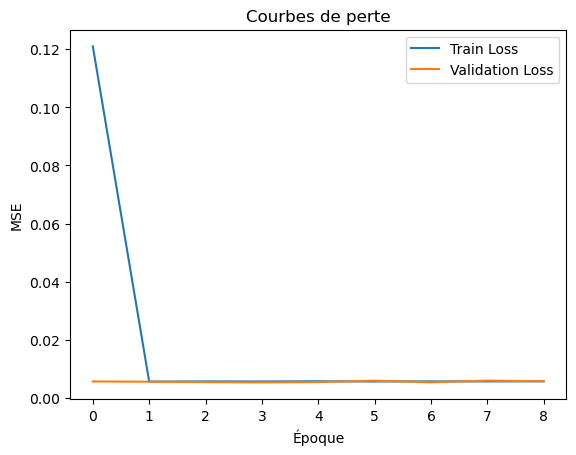

In [777]:
import matplotlib.pyplot as plt

plt.plot(model_1.history['loss'], label='Train Loss')
plt.plot(model_1.history['val_loss'], label='Validation Loss')
plt.title('Courbes de perte')
plt.xlabel('Époque')
plt.ylabel('MSE')
plt.legend()
plt.show()

In [778]:
y_pred = model.predict(X_test, verbose=0)

In [779]:
y_pred_rescaled = scaler.inverse_transform(y_pred)
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))

In [780]:

# Calcul des métriques principales
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Calcul du MAPE
mape = np.mean(np.abs((y_test - y_pred) / np.maximum(y_test, 1e-8))) * 100

# Affichage
print(f"Test MAE : {mae:.6f}")
print(f"Test R²  : {r2:.6f}")
print(f"Test MAPE: {mape:.2f}%")

Test MAE : 0.026687
Test R²  : 0.040800
Test MAPE: 4.15%


Evaluation du modèle

Visualisation des prédictions

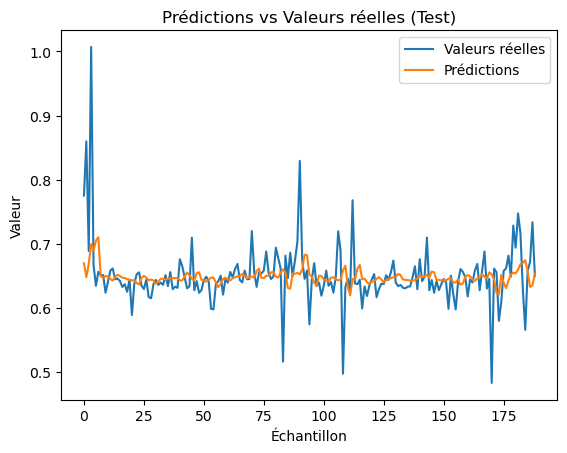

In [781]:
plt.plot(y_test, label='Valeurs réelles')
plt.plot(y_pred, label='Prédictions')
plt.title('Prédictions vs Valeurs réelles (Test)')
plt.xlabel('Échantillon')
plt.ylabel('Valeur')
plt.legend()
plt.show()

#### Arachide décortiqué

In [806]:
#Standardisation
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train_data[['decort_det_desais_diff']])
val_scaled   = scaler.transform(val_data[['decort_det_desais_diff']])
test_scaled  = scaler.transform(test_data[['decort_det_desais_diff']])

In [807]:
#Définition de T
T = 2
#Créer X et y pour train, valid, test
X_train, y_train = serie_GRU(train_scaled, T)
X_valid, y_valid = serie_GRU(val_scaled, T)
X_test, y_test   = serie_GRU(test_scaled, T)

# Vérification des shapes
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_valid: {X_valid.shape}, y_valid: {y_valid.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")

X_train: (1712, 2, 1), y_train: (1712,)
X_valid: (186, 2, 1), y_valid: (186,)
X_test: (189, 2, 1), y_test: (189,)


In [818]:
LATENT_DIM = 30
BATCH_SIZE = 32
EPOCHS = 200

In [819]:
# EarlyStopping pour éviter l'overfitting
GRU_earlystop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Définir le modèle GRU
model = Sequential()
model.add(GRU(LATENT_DIM, input_shape=(T, 1)))
model.add(Dense(1))  # Prédiction d'une seule valeur (y_t+1)

C:\Users\ombaye\AppData\Local\anaconda3\envs\tp1_env\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [820]:
model.compile(optimizer='RMSprop', loss='mse')
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_7 (GRU)                          │ (None, 30)                  │           2,970 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              31 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,001 (11.72 KB)

 Trainable params: 3,001 (11.72 KB)

 Non-trainable params: 0 (0.00 B)

In [821]:
# -----------------------------
model_2 = model.fit(
    X_train, y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(X_valid, y_valid),
    callbacks=[GRU_earlystop],
    verbose=1
)

Epoch 1/200
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0448 - val_loss: 0.0170
Epoch 2/200
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0090 - val_loss: 0.0165
Epoch 3/200
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0090 - val_loss: 0.0169
Epoch 4/200
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0090 - val_loss: 0.0172
Epoch 5/200
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0089 - val_loss: 0.0165
Epoch 6/200
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0090 - val_loss: 0.0170
Epoch 7/200
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0089 - val_loss: 0.0165
Epoch 8/200
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0089 - val_loss: 0.0174
Epoch 9/200
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0089 - val_loss: 0.0165
Epoch 10/200
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0089 - val_loss: 0.0169


In [822]:
# Évaluer sur le test
# -----------------------------
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f"Test MSE: {test_loss:.6f}")


Test MSE: 0.004244


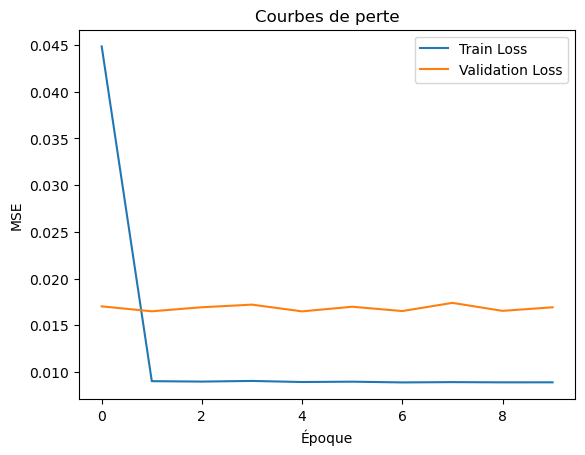

In [823]:
import matplotlib.pyplot as plt

plt.plot(model_2.history['loss'], label='Train Loss')
plt.plot(model_2.history['val_loss'], label='Validation Loss')
plt.title('Courbes de perte')
plt.xlabel('Époque')
plt.ylabel('MSE')
plt.legend()
plt.show()

In [824]:
y_pred = model.predict(X_test, verbose=0)

In [825]:
y_pred_rescaled = scaler.inverse_transform(y_pred)
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))

In [826]:
# Calcul des métriques principales
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Calcul du MAPE
mape = np.mean(np.abs((y_test - y_pred) / np.maximum(y_test, 1e-8))) * 100

# Affichage
print(f"Test MAE : {mae:.6f}")
print(f"Test R²  : {r2:.6f}")
print(f"Test MAPE: {mape:.2f}%")

Test MAE : 0.045149
Test R²  : 0.035444
Test MAPE: 8.95%


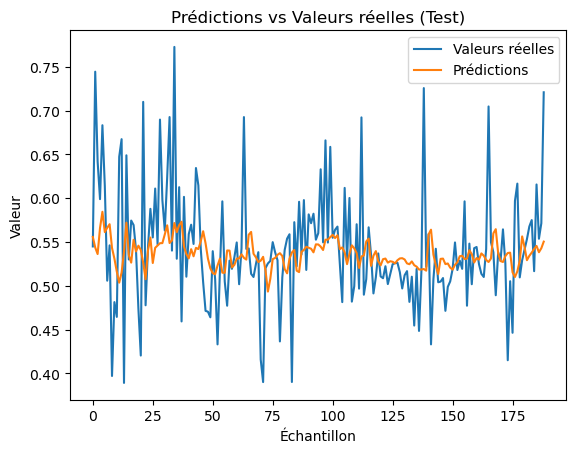

In [827]:
plt.plot(y_test, label='Valeurs réelles')
plt.plot(y_pred, label='Prédictions')
plt.title('Prédictions vs Valeurs réelles (Test)')
plt.xlabel('Échantillon')
plt.ylabel('Valeur')
plt.legend()
plt.show()